<a href="https://colab.research.google.com/github/soulsurfer0/AI/blob/main/Learner%2BNotebook%2B_%2BFull%2BCode%2BVersion%2B_%2BPotential%2BCustomers%2BPrediction_with_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

# **Importing Libraries, Connect to Google Drive and Load Data**

In [ ]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches # For creating plot independent legends

# Libraries for statistical analysis
from scipy import stats

# Library for label encoding (for 3D plotting functions)
from sklearn.preprocessing import LabelEncoder

# Collinearity checks
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
)

from sklearn.preprocessing import (
    MinMaxScaler,
    LabelEncoder,
    OneHotEncoder,
    StandardScaler,
)

from sklearn.impute import (
    SimpleImputer,
)

# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

#Importing PCA and TSNE
from sklearn.decomposition import PCA

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

# Comment formatting
from IPython.display import display, HTML

# Connect collab
from google.colab import drive
drive.mount('/content/drive')

# Load data from csv file
dataset = pd.read_csv('/content/drive/MyDrive/MIT - Data Sciences/Colab Notebooks/Week_Five_-_Classification_and_Hypothesis_Testing/Project_-_Classification_and_Hypothesis_Testing/ExtraaLearn.csv')

# Make a working copy of the data
data = dataset.copy()


from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

Mounted at /content/drive


# **Function Definitions**

In [ ]:
# Define histogram and boxplot plotting function

def histogram_boxplot(
                      data,
                      feature,
                      figsize=(12, 7),
                      kde=True,
                      bins=None,
                      box_color="violet",
                      mean_color="green",
                      median_color="black",
                      hist_palette="tab10",
                      show_title=True,
                      custom_title=None):
    """
    Boxplot and histogram combined

    Parameters:
    data (pd.DataFrame): Input dataframe
    feature (str): Column name of the dataframe to plot
    figsize (tuple): Size of figure (default (12,7))
    kde (bool): Whether to show the density curve (default True)
    bins (int): Number of bins for histogram (default None)
    box_color (str): Color of the boxplot (default "violet")
    mean_color (str): Color of the mean line (default "green")
    median_color (str): Color of the median line (default "black")
    hist_palette (str): Color palette for the histogram (default "winter")
    show_title (bool): Whether to show the plot title (default True)
    custom_title (str): Custom title for the plot (default None)
    """
    if not isinstance(data, pd.DataFrame):
        raise TypeError("data must be a pandas DataFrame")

    if feature not in data.columns:
        raise ValueError(f"Feature '{feature}' not found in the dataframe")

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color=box_color, palette='tab10')

    # Histogram
    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette=hist_palette)
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, palette=hist_palette)

    # Add mean and median lines
    mean = data[feature].mean()
    median = data[feature].median()
    ax_hist2.axvline(mean, color=mean_color, linestyle="--", label="Mean")
    ax_hist2.axvline(median, color=median_color, linestyle="-", label="Median")

    # Add legend
    ax_hist2.legend()

    # Add labels
    ax_hist2.set_xlabel(feature)
    ax_hist2.set_ylabel("Count")
    ax_box2.set_ylabel("")

    if show_title:
        if custom_title:
            title = f"{custom_title} Distribution"
        else:
            title = f"{feature} Distribution"
        plt.suptitle(title, fontsize=16)

    plt.tight_layout()
    plt.show()

In [ ]:
def enhanced_histogram_boxplot(
    data,
    feature,
    figsize=(12, 8),
    kde=True,
    bins=None,
    box_color="violet",
    mean_color="green",
    median_color="black",
    hist_palette="tab10",  # Updated palette to 'tab10'
    show_title=True,
    custom_title=None
):
    """
    Enhanced boxplot and histogram combined with outlier detection and statistical summary

    Parameters:
    data (pd.DataFrame): Input dataframe
    feature (str): Column name of the dataframe to plot
    figsize (tuple): Size of figure (default (12,8)) - Adjusted for removal of Q-Q plot
    kde (bool): Whether to show the density curve (default True)
    bins (int): Number of bins for histogram (default None)
    box_color (str): Color of the boxplot (default "violet")
    mean_color (str): Color of the mean line (default "green")
    median_color (str): Color of the median line (default "black")
    hist_palette (str): Color palette for the histogram (default "tab10")
    show_title (bool): Whether to show the plot title (default True)
    custom_title (str): Custom title for the plot (default None)
    """
    if not isinstance(data, pd.DataFrame):
        raise TypeError("data must be a pandas DataFrame")

    if feature not in data.columns:
        raise ValueError(f"Feature '{feature}' not found in the dataframe")

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=False,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Boxplot
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color=box_color)

    # Histogram
    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette=sns.color_palette(hist_palette))
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, palette=sns.color_palette(hist_palette))

    # Add mean and median lines
    mean = data[feature].mean()
    median = data[feature].median()
    ax_hist2.axvline(mean, color=mean_color, linestyle="--", label="Mean")
    ax_hist2.axvline(median, color=median_color, linestyle="-", label="Median")

    # Add legend
    ax_hist2.legend()

    # Add labels
    ax_hist2.set_xlabel(feature)
    ax_hist2.set_ylabel("Count")
    ax_box2.set_ylabel("")

    if show_title:
        if custom_title:
            title = f"{custom_title} Distribution"
        else:
            title = f"{feature} Distribution"
        plt.suptitle(title, fontsize=16)

    plt.tight_layout()

    # Calculate statistics
    std = data[feature].std()
    skew = data[feature].skew()
    kurtosis = data[feature].kurtosis()

    # Outlier detection
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)][feature]

    # Z-score outliers
    z_scores = np.abs(stats.zscore(data[feature]))
    z_score_outliers = data[feature][z_scores > 3]

    # Print statistical summary
    print(f"\nStatistical Summary for {feature}:")
    print(f"Mean: {mean:.2f}")
    print(f"Median: {median:.2f}")
    print(f"Standard Deviation: {std:.2f}")
    print(f"Skewness: {skew:.2f}")
    print(f"Kurtosis: {kurtosis:.2f}")
    print(f"\nOutlier Analysis:")
    print(f"IQR method - Number of outliers: {len(outliers)}")
    print(f"IQR method - Percentage of outliers: {(len(outliers) / len(data[feature])) * 100:.2f}%")
    print(f"IQR method - Outlier range: < {lower_bound:.2f} or > {upper_bound:.2f}")
    print(f"Z-score method - Number of outliers (|z| > 3): {len(z_score_outliers)}")
    print(f"Z-score method - Percentage of outliers: {(len(z_score_outliers) / len(data[feature])) * 100:.2f}%")

    plt.show()

# Usage example:
# enhanced_histogram_boxplot(data, 'age')


In [ ]:
# Define binary feature plotting function

def plot_binary_feature(
                            data,
                            feature,
                            figsize=(12, 7),
                            colors=['#0073a3', '#5e6d77'],
                            show_title=True,
                            custom_title=None):
    """
    Bar plot and pie chart for binary features

    Parameters:
    data (pd.DataFrame): Input dataframe
    feature (str): Column name of the dataframe to plot
    figsize (tuple): Size of figure (default (12,7))
    colors (list): List of two colors for the plots (default ['#FFA07A', '#98FB98'])
    show_title (bool): Whether to show the plot title (default True)
    custom_title (str): Custom title for the plot (default None)
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

    # Calculate the value counts and percentages
    value_counts = data[feature].value_counts().sort_index()
    percentages = value_counts / len(data) * 100

    # Bar plot
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax1, palette=colors)
    ax1.set_title('Bar Plot')
    ax1.set_xlabel(feature)
    ax1.set_ylabel('Count')

    # Add percentage labels on the bars
    for i, v in enumerate(value_counts.values):
        ax1.text(i, v, f'{percentages[i]:.1f}%', ha='center', va='bottom')

    # Pie chart
    ax2.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
    ax2.set_title('Pie Chart')

    if show_title:
        title = f"{custom_title} Distribution" if custom_title else f"{feature} Distribution"
        plt.suptitle(title, fontsize=16)

    plt.tight_layout()
    plt.show()

In [ ]:
# Define categorical feature plotting function

def plot_categorical(data, feature, figsize=(12, 6), show_title=True, custom_title=None, top_n=None):
    """
    Plot categorical variables with appropriate chart types based on the number of categories.
    Includes value counts and percentages as a "legend" on the right side.

    Parameters:
    data (pd.DataFrame): Input dataframe
    feature (str): Column name of the dataframe to plot
    figsize (tuple): Size of figure (default (12,6))
    show_title (bool): Whether to show the plot title (default True)
    custom_title (str): Custom title for the plot (default None)
    top_n (int): Number of top categories to show, others will be grouped as 'Other' (default None)
    """
    if not isinstance(data, pd.DataFrame):
        raise TypeError("data must be a pandas DataFrame")

    if feature not in data.columns:
        raise ValueError(f"Feature '{feature}' not found in the dataframe")

    value_counts = data[feature].value_counts()
    n_categories = len(value_counts)

    if top_n and n_categories > top_n:
        top_values = value_counts.nlargest(top_n)
        other = pd.Series({'Other': value_counts.nsmallest(n_categories - top_n).sum()})
        value_counts = pd.concat([top_values, other])
        n_categories = top_n + 1

    percentages = value_counts / len(data) * 100

    # Determine the title
    title = custom_title if custom_title else f"{feature} Distribution"

    if n_categories == 2:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize, gridspec_kw={'width_ratios': [2, 1]})

        # Bar plot
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax1)
        ax1.set_title('Bar Plot')
        ax1.set_ylabel('Count')

        # Add percentage labels on the bars
        for i, v in enumerate(value_counts.values):
            ax1.text(i, v, f'{percentages[i]:.1f}%', ha='center', va='bottom')

        # Pie chart
        ax2.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
        ax2.set_title('Pie Chart')

    else:
        fig, (ax, ax_legend) = plt.subplots(1, 2, figsize=figsize, gridspec_kw={'width_ratios': [3, 1]})

        # Horizontal bar plot
        bars = ax.barh(value_counts.index, value_counts.values)
        ax.set_title('Horizontal Bar Plot')
        ax.set_xlabel('Count')

        # Add percentage labels on the bars
        for i, (value, name) in enumerate(zip(value_counts.values, value_counts.index)):
            ax.text(value, i, f'{percentages[name]:.1f}%', va='center')

        # Add value counts as "legend"
        ax_legend.axis('off')
        legend_text = "Value Counts:\n\n"
        for index, value in value_counts.items():
            legend_text += f"{index}: {value} ({percentages[index]:.1f}%)\n"
        ax_legend.text(0, 0.9, legend_text, verticalalignment='top', wrap=True)

    if show_title:
        plt.suptitle(title, fontsize=16)

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_categorical(data, 'current_occupation', custom_title="Occupation Distribution")
# plot_categorical(data, 'print_media_type1', custom_title="Print Media Type 1 Usage")
# plot_categorical(data, 'educational_channels', top_n=5, custom_title="Top 5 Educational Channels")

In [ ]:
# Define scatter plot function

def plot_scatter(x_column, y_column, data, title=None, x_label=None, y_label=None, palette='tab10'):
    """
    Creates a scatter plot for the specified x and y columns from the given dataset.

    Parameters:
    x_column (str): The name of the column for the x-axis.
    y_column (str): The name of the column for the y-axis.
    data (DataFrame): The pandas DataFrame containing the data.
    title (str, optional): The title of the plot. Defaults to None.
    x_label (str, optional): Label for the x-axis. Defaults to None.
    y_label (str, optional): Label for the y-axis. Defaults to None.

    Returns:
    None: Displays the scatter plot.
    """
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_column, y=y_column, data=data, palette='palette')
    plt.title(title if title else f'Scatter Plot: {x_column} vs {y_column}')
    plt.xlabel(x_label if x_label else x_column)
    plt.ylabel(y_label if y_label else y_column)
    plt.grid(True)
    plt.show()

# Example of how to call the function
#plot_scatter('age', 'website_visits', data, title='Age vs Website Visits')

In [ ]:
# Defining an abstracted function for box plot visualization

def plot_boxplot(x_column, y_column, data, title=None, x_label=None, y_label=None, palette='tab10'):
    """
    Creates a box plot for the specified x and y columns from the given dataset.

    Parameters:
    x_column (str): The name of the column for the x-axis (typically categorical).
    y_column (str): The name of the column for the y-axis (typically continuous).
    data (DataFrame): The pandas DataFrame containing the data.
    title (str, optional): The title of the plot. Defaults to None.
    x_label (str, optional): Label for the x-axis. Defaults to None.
    y_label (str, optional): Label for the y-axis. Defaults to None.
    palette (str, optional): Color palette for the box plot. Defaults to 'tab10'.

    Returns:
    None: Displays the box plot.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x_column, y=y_column, data=data, palette=palette)
    plt.title(title if title else f'Box Plot: {x_column} vs {y_column}')
    plt.xlabel(x_label if x_label else x_column)
    plt.ylabel(y_label if y_label else y_column)
    plt.grid(True)
    plt.show()

# Example of how to call the function
#plot_boxplot(x_column='status', y_column='age', data=dataset, title='Status vs Age')


In [ ]:
# Defining a generic function for count plot visualization

def plot_countplot(x_column, hue_column, data, title=None, x_label=None, y_label=None, palette='tab10', hue_order=None):
    """
    Creates a count plot for the specified x and hue columns from the given dataset.

    Parameters:
    x_column (str): The name of the column for the x-axis (typically categorical).
    hue_column (str): The name of the column for hue (typically categorical).
    data (DataFrame): The pandas DataFrame containing the data.
    title (str, optional): The title of the plot. Defaults to None.
    x_label (str, optional): Label for the x-axis. Defaults to None.
    y_label (str, optional): Label for the y-axis. Defaults to None.
    palette (str, optional): Color palette for the count plot. Defaults to 'tab10'.
    hue_order (list, optional): The order of the hues to be plotted. Defaults to None.

    Returns:
    None: Displays the count plot.
    """
    plt.figure(figsize=(10, 6))
    sns.countplot(x=x_column, hue=hue_column, data=data, palette=palette, hue_order=hue_order)
    plt.title(title if title else f'Count Plot: {x_column} vs {hue_column}')
    plt.xlabel(x_label if x_label else x_column)
    plt.ylabel(y_label if y_label else 'Count')
    plt.grid(True)
    plt.show()

# Example usage
# plot_countplot(x_column='status', hue_column='current_occupation', data=dataset, title='Status vs Current Occupation', hue_order=['Employed', 'Unemployed', 'Student'])

In [ ]:
# Defining a generic function for creating 3D scatter plots

# Set Seaborn style to 'darkgrid'
sns.set(style="whitegrid")

# Function for 3D scatter plot
def plot_3d_scatter(x_column, y_column, z_column, data, title=None, x_label=None, y_label=None, z_label=None):
    """
    Creates a 3D scatter plot for the specified x, y, and z columns from the given dataset.
    Adjusts layout to avoid cutting off labels and rotates axes for better visibility.
    """
    fig = plt.figure(figsize=(10, 8))  # Increase figure size to avoid cutoff
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot
    ax.scatter(data[x_column], data[y_column], data[z_column], c='b', marker='o')

    # Setting labels
    ax.set_xlabel(x_label if x_label else x_column, labelpad=20)  # Add padding to the labels
    ax.set_ylabel(y_label if y_label else y_column, labelpad=20)
    ax.set_zlabel(z_label if z_label else z_column, labelpad=20)

    # Title
    ax.set_title(title if title else f'3D Scatter Plot: {x_column}, {y_column}, {z_column}')

    # Rotate axis labels if needed
    ax.tick_params(axis='x', labelrotation=45)
    ax.tick_params(axis='y', labelrotation=45)
    ax.tick_params(axis='z', labelrotation=45)

    # Adjust layout
    plt.tight_layout(pad=3)  # Increase padding in layout to avoid cutoffs
    plt.show()

# Call the function with your data
#plot_3d_scatter('age', 'website_visits', 'time_spent_on_website', data, title='Age, Website Visits, and Time Spent on Website')



In [ ]:
# Defining a generic function for creating 3D scatter plots

# Set Seaborn style to 'darkgrid'
sns.set(style="whitegrid")

def plot_3d_scatter_with_color(x_column, y_column, z_column, color_column, data, title=None, x_label=None, y_label=None, z_label=None, figsize=(10, 8)):
    """
    Creates a 3D scatter plot for the specified x, y, and z columns from the given dataset.
    Adds the 'color_column' to color the points based on a categorical variable.
    """
    fig = plt.figure(figsize=figsize)           # Pass figsize argument here
    ax = fig.add_subplot(111, projection='3d')

    # Scatter plot with color dimension based on the 'color_column'
    p = ax.scatter(data[x_column], data[y_column], data[z_column], c=data[color_column], cmap='coolwarm', marker='o')

    # Setting labels with padding
    ax.set_xlabel(x_label if x_label else x_column, labelpad=20)
    ax.set_ylabel(y_label if y_label else y_column, labelpad=20)
    ax.set_zlabel(z_label if z_label else z_column, labelpad=20)

    # Add color bar for reference
    cbar = fig.colorbar(p, ax=ax) # Assign color bar object to cbar
    cbar.set_label('Status') # Add this line

    # Title
    ax.set_title(title if title else f'3D Scatter Plot: {x_column}, {y_column}, {z_column}')

    plt.tight_layout()
    plt.show()

# Call the modified function with 'status' as the color dimension
#plot_3d_scatter_with_color('website_visits', 'time_spent_on_website', 'status', 'status', data, title='Website Visits, Time Spent on Website, and Status (with color dimension)')


In [ ]:
# Creating metric function for regresion model evaluation

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Converted', 'Converted'], yticklabels=['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# **Data Overview**

- Observations
- Sanity checks

### **First Five Rows**

In [ ]:
# returns the first 5 rows
data.head()

ID  age current_occupation first_interaction profile_completed  \
0  EXT001   57         Unemployed           Website              High   
1  EXT002   56       Professional        Mobile App            Medium   
2  EXT003   52       Professional           Website            Medium   
3  EXT004   53         Unemployed           Website              High   
4  EXT005   23            Student           Website              High   

   website_visits  time_spent_on_website  page_views_per_visit  \
0               7                   1639                 1.861   
1               2                     83                 0.320   
2               3                    330                 0.074   
3               4                    464                 2.057   
4               4                    600                16.914   

      last_activity print_media_type1 print_media_type2 digital_media  \
0  Website Activity               Yes                No           Yes   
1  Website Activity                No                No            No   
2  Website Activity                No                No           Yes   
3  Website Activity                No                No            No   
4    Email Activity                No                No            No   

  educational_channels referral  status  
0                   No       No       1  
1                  Yes       No       0  
2                   No       No       0  
3                   No       No       1  
4                   No       No       0

**Observation:**

* The **conversion** of lead to customer is **indicated by** the variable **status**, which  is the **target variable** and the rest of the variables are independent variables based on which we will predict the conversion based on several parameters.

### **Last Five Rows**

In [ ]:
# returns the last 5 rows
data.tail()

ID  age current_occupation first_interaction profile_completed  \
4607  EXT4608   35         Unemployed        Mobile App            Medium   
4608  EXT4609   55       Professional        Mobile App            Medium   
4609  EXT4610   58       Professional           Website              High   
4610  EXT4611   57       Professional        Mobile App            Medium   
4611  EXT4612   55       Professional           Website            Medium   

      website_visits  time_spent_on_website  page_views_per_visit  \
4607              15                    360                 2.170   
4608               8                   2327                 5.393   
4609               2                    212                 2.692   
4610               1                    154                 3.879   
4611               4                   2290                 2.075   

         last_activity print_media_type1 print_media_type2 digital_media  \
4607    Phone Activity                No                No            No   
4608    Email Activity                No                No            No   
4609    Email Activity                No                No            No   
4610  Website Activity               Yes                No            No   
4611    Phone Activity                No                No            No   

     educational_channels referral  status  
4607                  Yes       No       0  
4608                   No       No       0  
4609                   No       No       1  
4610                   No       No       0  
4611                   No       No       0

### **Shape**

In [ ]:
# Determine the number of rows and columns by calling data.shape
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 4612 rows and 15 columns.


**Observations**:
 *   The dataset consists of 4612 rows and 15 features.

### **Dataset Information Types**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

**Observations**:

* The dataset is composed of numeric, and categorical features

	* Continuous Features:
		* age,
		* website_visits,
		* time_spent_on_website,
		* page_views_per_visit,
		* status    
             
	* Categorical Features:
		* ID,
		* current_occupation,
		* first_interaction,
		* profile_completed,
		* last_activity,
		* print_media_type1,
		* print_media_type2,
		* digital_media,
		* educational_channels,
		* referral

# **Exploratory Data Analysis (EDA)**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## **Univariate and Outlier Analysis**

### **Statistical Information**

In [ ]:
data.describe(include = "all").T

count unique             top  freq        mean  \
ID                       4612   4612         EXT4612     1         NaN   
age                    4612.0    NaN             NaN   NaN   46.201214   
current_occupation       4612      3    Professional  2616         NaN   
first_interaction        4612      2         Website  2542         NaN   
profile_completed        4612      3            High  2264         NaN   
website_visits         4612.0    NaN             NaN   NaN    3.566782   
time_spent_on_website  4612.0    NaN             NaN   NaN  724.011275   
page_views_per_visit   4612.0    NaN             NaN   NaN    3.026126   
last_activity            4612      3  Email Activity  2278         NaN   
print_media_type1        4612      2              No  4115         NaN   
print_media_type2        4612      2              No  4379         NaN   
digital_media            4612      2              No  4085         NaN   
educational_channels     4612      2              No  3907         NaN   
referral                 4612      2              No  4519         NaN   
status                 4612.0    NaN             NaN   NaN    0.298569   

                              std   min      25%    50%      75%     max  
ID                            NaN   NaN      NaN    NaN      NaN     NaN  
age                     13.161454  18.0     36.0   51.0     57.0    63.0  
current_occupation            NaN   NaN      NaN    NaN      NaN     NaN  
first_interaction             NaN   NaN      NaN    NaN      NaN     NaN  
profile_completed             NaN   NaN      NaN    NaN      NaN     NaN  
website_visits           2.829134   0.0      2.0    3.0      5.0    30.0  
time_spent_on_website  743.828683   0.0   148.75  376.0  1336.75  2537.0  
page_views_per_visit     1.968125   0.0  2.07775  2.792  3.75625  18.434  
last_activity                 NaN   NaN      NaN    NaN      NaN     NaN  
print_media_type1             NaN   NaN      NaN    NaN      NaN     NaN  
print_media_type2             NaN   NaN      NaN    NaN      NaN     NaN  
digital_media                 NaN   NaN      NaN    NaN      NaN     NaN  
educational_channels          NaN   NaN      NaN    NaN      NaN     NaN  
referral                      NaN   NaN      NaN    NaN      NaN     NaN  
status                    0.45768   0.0      0.0    0.0      1.0     1.0

**Observations**:

Age:
   - **Mean age** is **46.2 years**, with a standard deviation of **13.16** years, suggesting that the lead population has a moderately wide age distribution.
   - The **minimum age** is **18**, and the **maximum age** is **63**.
   - Half of the leads are aged between 36 and 57 years.
   
Current Occupation:
   - There are 3 unique occupation types: **Professional**, **Unemployed**, and **Student**.
   - The most frequent occupation is **Professional**, with **2616** leads (56.7% of the total).
   
First Interaction:
   - There are 2 interaction types: **Website** and **Mobile App**.
   - **Website** is the most common first interaction method, accounting for **2542** leads (around 55% of leads).

Profile Completion:
   - There are 3 unique levels: **High**, **Medium**, and **Low**.
   - The most common profile completion level is **High** (75-100%), with **2264** leads having completed their profile to this level.

Website Visits:
   - The **mean** number of visits is **3.57**, with a standard deviation of **2.83**.
   - The number of visits ranges from **0 to 30**, with the **median** being **3** visits.
   - The majority of leads visit the website 2-5 times.

Time Spent on Website: (**Assumption** - this time is given in seconds)
   - The average time spent on the website is **724 seconds** (around 12 minutes), with a wide standard deviation of **743.83 seconds**.
   - The time spent on the website ranges from **0 to 2537 seconds**.
   - The **25th percentile** is **148 seconds**, the **median** (50th percentile) is **376 seconds**, and the **75th percentile** is **1336 seconds**, showing that user engagement varies greatly.

Page Views per Visit:
   - On average, leads view about **3.03 pages** per visit, with a standard deviation of **1.97** pages.
   - The number of page views ranges from **0 to 18.43 pages**.
   - The majority of leads view around 2-4 pages per visit.

Last Activity:
   - There are 3 unique types of last activities: **Email Activity**, **Phone Activity**, and **Website Activity**.
   - The most common activity is **Email Activity**, representing **2278** leads (about 49%).

Media & Referral Channels:
   - For **print_media_type1**, **print_media_type2**, **digital_media**, and **educational_channels**, the most common value is "No", indicating that most leads were not exposed to these media channels.
   - Similarly, **referral** is mostly "No", meaning that the majority of leads were not referred.

Status (Target Variable):
   - The target variable **status** is a binary variable, with the mean of **0.298569**, indicating that around **29.9%** of leads converted (status = 1).
   - The remaining **70.1%** did not convert (status = 0).

### **Unique Values**

In [ ]:
# Get nunique values for each column
nunique_df = data.nunique().reset_index()
nunique_df.columns = ['Feature', 'Unique_Count']

# Features to find unique values for (categorical only)
categorical_features = ['current_occupation', 'first_interaction', 'profile_completed', 'last_activity',
                        'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels',
                        'referral', 'status']

# Create an empty list to store unique value strings
unique_value_list = []

# Loop over the categorical list to get all unique values and store them as formatted strings
for feature in categorical_features:
    unique_values = data[feature].unique()
    # Convert each unique value to a string and join them with commas
    formatted_list = ', '.join([str(value) for value in unique_values.tolist()])
    unique_value_list.append(formatted_list)

# Create a DataFrame with the features and their corresponding unique values
unique_values_df = pd.DataFrame({
    'Feature': categorical_features,
    'Unique_Values': unique_value_list
})

# Merge nunique_df with unique_values_df
merged_df = pd.merge(nunique_df, unique_values_df, on='Feature', how='left')

# Display the combined DataFrame in the notebook
display(merged_df)



Feature  Unique_Count  \
0                      ID          4612   
1                     age            46   
2      current_occupation             3   
3       first_interaction             2   
4       profile_completed             3   
5          website_visits            27   
6   time_spent_on_website          1623   
7    page_views_per_visit          2414   
8           last_activity             3   
9       print_media_type1             2   
10      print_media_type2             2   
11          digital_media             2   
12   educational_channels             2   
13               referral             2   
14                 status             2   

                                       Unique_Values  
0                                                NaN  
1                                                NaN  
2                  Unemployed, Professional, Student  
3                                Website, Mobile App  
4                                  High, Medium, Low  
5                                                NaN  
6                                                NaN  
7                                                NaN  
8   Website Activity, Email Activity, Phone Activity  
9                                            Yes, No  
10                                           No, Yes  
11                                           Yes, No  
12                                           No, Yes  
13                                           No, Yes  
14                                              1, 0

**Observations**:

**High Cardinality Features**:
   - **ID** has 4612 unique values, indicating that each lead has a unique identifier. This is a typical feature for unique identification and will likely not contribute to predictive modeling.
   - **age** has 46 unique values, meaning there’s a moderate variety in ages across leads.

**Categorical Features with Few Categories**:
   - **current_occupation** has only 3 unique values: "Unemployed," "Professional," and "Student." This suggests that most leads fall into one of these categories.
   - **first_interaction** has 2 unique values: "Website" and "Mobile App," meaning leads only interact through these two channels.
   - **profile_completed** has 3 levels: "High," "Medium," and "Low," showing how complete users' profiles are.
   - **last_activity** has 3 distinct categories: "Website Activity," "Email Activity," and "Phone Activity," describing the lead's last interaction type.
   - **print_media_type1**, **print_media_type2**, **digital_media**, **educational_channels**, and **referral** all have binary values ("Yes" or "No"), showing whether leads were exposed to different media or referral channels.

**Continuous Features**:
   - **website_visits** has 27 unique values, which suggests that users exhibit a wide range of engagement levels in terms of site visits.
   - **time_spent_on_website** has 1623 unique values, showing a high degree of variation in how much time users spend on the site.
   - **page_views_per_visit** has 2414 unique values, further indicating that user behavior varies significantly in terms of page views per session.

**Target Variable (status)**:
   - The **status** column has 2 unique values (0 and 1), indicating that this is a binary classification problem where the target variable is whether a lead converts or not.

### **Missing Values Check**

In [ ]:
# Missing value check
pd.DataFrame(data={'% of Missing Values':round(data.isna().sum()/data.isna().count()*100,2)})

% of Missing Values
ID                                     0.0
age                                    0.0
current_occupation                     0.0
first_interaction                      0.0
profile_completed                      0.0
website_visits                         0.0
time_spent_on_website                  0.0
page_views_per_visit                   0.0
last_activity                          0.0
print_media_type1                      0.0
print_media_type2                      0.0
digital_media                          0.0
educational_channels                   0.0
referral                               0.0
status                                 0.0

**Observations**:

 - There are no missing values in the dataset.

###**Question 1**:

**Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.**

**Lead Status**

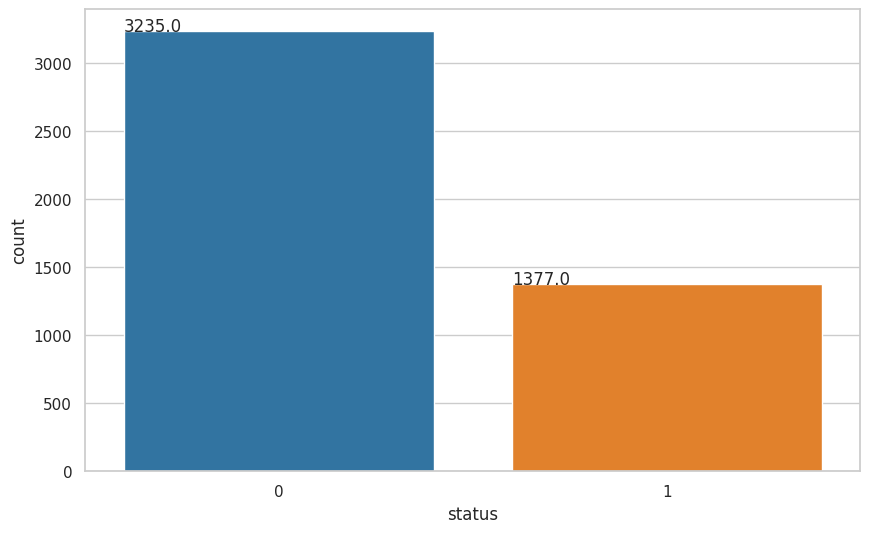

In [ ]:
plt.figure(figsize = (10, 6))

ax = sns.countplot(x = 'status', data = data, palette='tab10')

# Annotating the exact count on the top of the bar for each category
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+ 0.35))

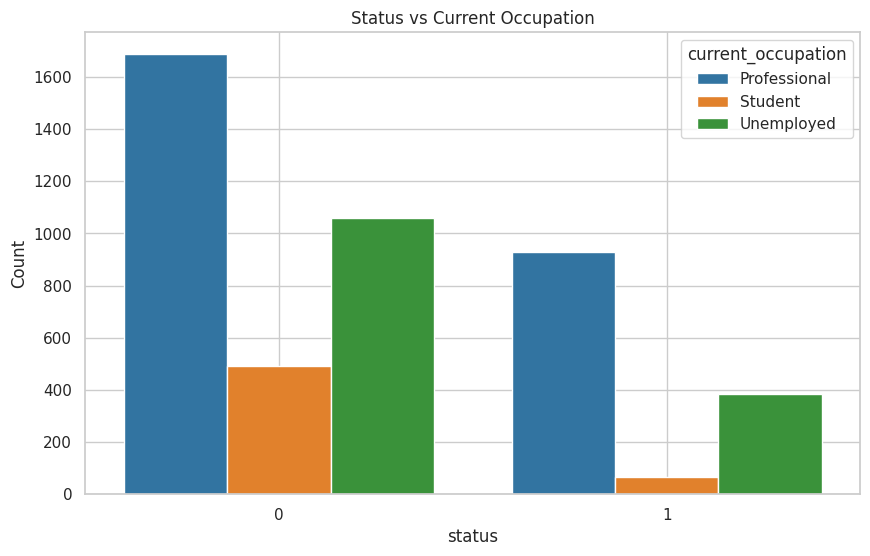

In [ ]:
plot_countplot(x_column='status', hue_column='current_occupation', data=dataset, title='Status vs Current Occupation')

**Observations**:
 - The number of leads converted are significantly less than number of leads not converted which can be expected.
 - Only 29.85% of leads have been converted, there is a big opportunity for improvement here.
 - Professionals dominate both unconverted and converted leads, followed by unemployes with students making up the minority,

### **Distribution of Continuous Features**

The dataset contains the following continuous variables:

*   age
*   website_visits
*   time_spent_on_website
*   page_views_per_visit
*   status

#### Feature: **Age**


Statistical Summary for age:
Mean: 46.20
Median: 51.00
Standard Deviation: 13.16
Skewness: -0.72
Kurtosis: -0.80

Outlier Analysis:
IQR method - Number of outliers: 0
IQR method - Percentage of outliers: 0.00%
IQR method - Outlier range: < 4.50 or > 88.50
Z-score method - Number of outliers (|z| > 3): 0
Z-score method - Percentage of outliers: 0.00%


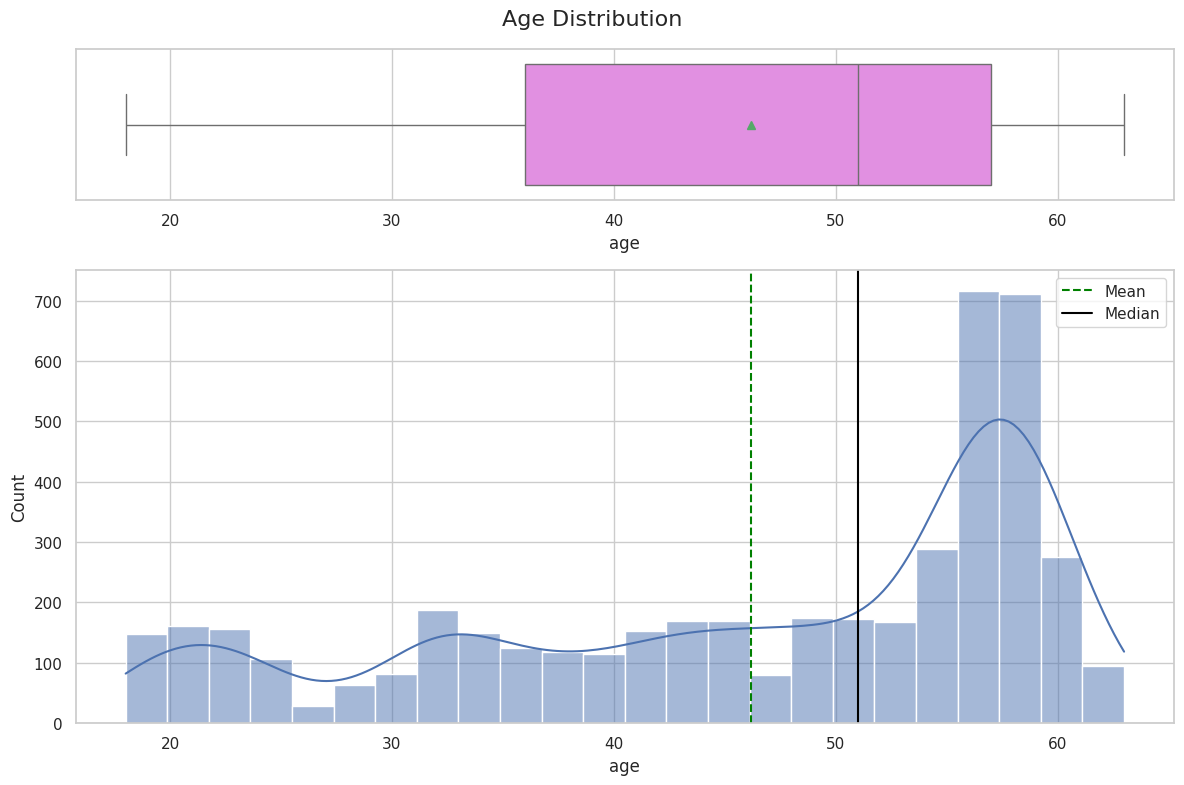

In [ ]:
# plot the distribution of the age feature
enhanced_histogram_boxplot(data, 'age', kde = True, bins = 24, custom_title = "Age")

**Observations:**

* Left-Skewed Distribution:
   - The distribution is **left-skewed** (negatively skewed), the majority of the leads are older, specifically concentrated in the **50-60 year** age range.
   - The **tail on the left** indicates that there are fewer younger leads (18-30 years old) compared to older leads.

* Mean vs. Median:
   - The **mean** age (green dashed line) is around **46 years**, while the **median** (black solid line) is around **51 years**.
   - The **median is higher than the mean**, which is characteristic of a left-skewed distribution. This indicates that a larger portion of the dataset is made up of older individuals, with a few younger leads pulling the mean down.

* Boxplot Insights
   - The boxplot reflects that the **middle 50%** of the data (interquartile range, or IQR) is roughly between **36** and **57** years, with the median at **51** years.
   - There are **no significant outliers** in the data, as the whiskers extend close to the minimum (around 18) and maximum (around 63), and there are no individual points marked as outliers.

* Concentration of Older Leads:
   - There is a significant concentration of leads in the **50-60 year** range. This demographic dominates the dataset, which may suggest that this age group is the primary audience.
   
* Smaller Younger Population:
   - The tail of the distribution shows a smaller number of younger leads, particularly between **18-30 years** old.
   - If the business goal is to attract more younger leads, this age group may require targeted strategies to increase their presence in the dataset.

* Age Variability:
   - There is a moderate spread in the data, with ages ranging from **18 to 63 years**.
   - The **25th percentile** is at **36 years**, indicating that 25% of the leads are younger than this, while the **75th percentile** is at **57 years**, meaning that the majority of leads are above this age.

* Outliers:
 - There are no outliers in this feature set.

#### Feature: **Website Visits**


Statistical Summary for website_visits:
Mean: 3.57
Median: 3.00
Standard Deviation: 2.83
Skewness: 2.16
Kurtosis: 9.35

Outlier Analysis:
IQR method - Number of outliers: 154
IQR method - Percentage of outliers: 3.34%
IQR method - Outlier range: < -2.50 or > 9.50
Z-score method - Number of outliers (|z| > 3): 66
Z-score method - Percentage of outliers: 1.43%


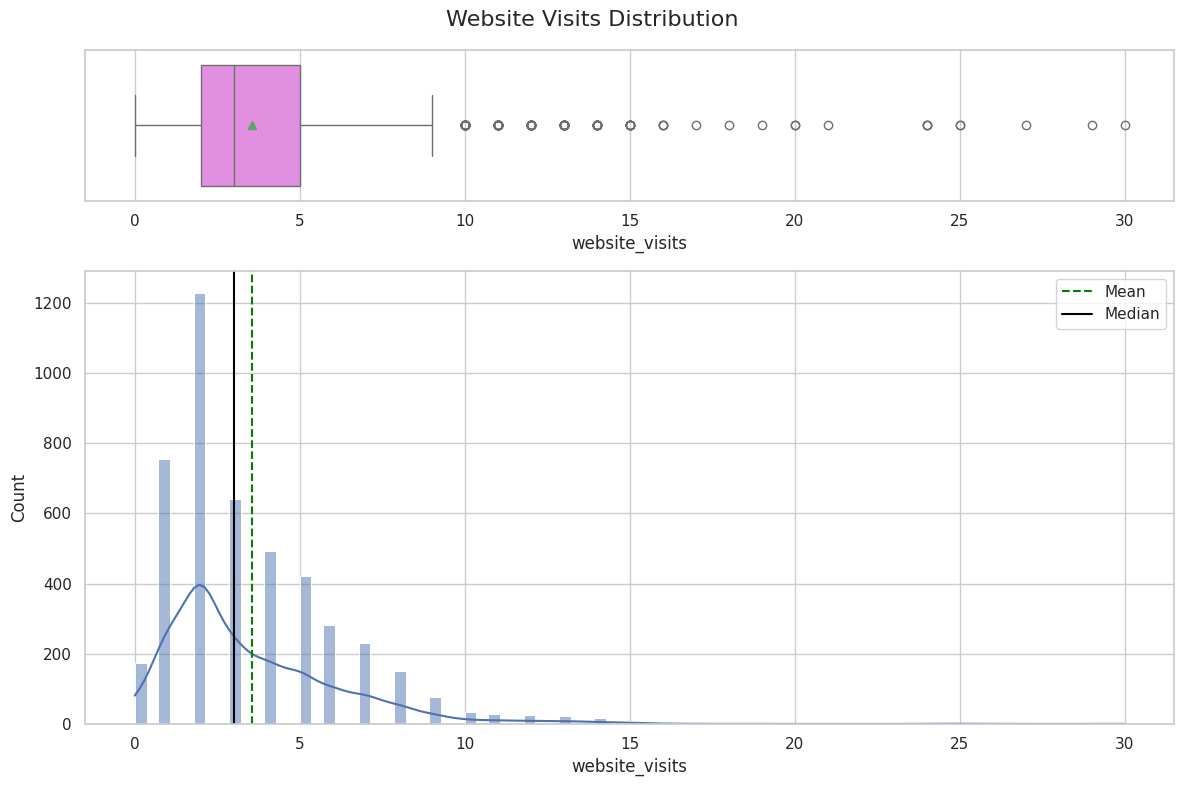

In [ ]:
# plot the distribution of the website_visits feature
enhanced_histogram_boxplot(data, "website_visits", kde = True, custom_title = "Website Visits")


**Observations:**

* Right-Skewed Distribution:
   - The distribution of **website_visits** is **right-skewed** (positively skewed), meaning that most users have **fewer website visits**, but a small number of users have significantly more visits.
   - The majority of users have between **0 and 5 visits**, with the count sharply decreasing as the number of visits increases.

* Mean vs. Median:
   - The **mean** number of visits (green dashed line) is slightly greater than the **median** (black solid line).
   - This difference suggests that the skew in the data (due to users with a high number of visits) is pulling the mean upwards, whereas the median remains a better representation of the central tendency for most users.

* Boxplot Insights:
   - The **middle 50%** of the data (interquartile range, or IQR) is relatively tight, with most users having between **2 to 5 website visits**.
   - There are **many outliers** present beyond the upper whisker, with users having between **10 to 30 visits**. These outliers likely correspond to highly engaged users who visit the website frequently.

* Common Visit Patterns:
   - The highest frequency of users have **0 to 1 visit**. This group dominates the data, with a significant drop in the number of users as visits increase beyond 2-3 visits.
   - There is a small secondary peak at **3 visits**, indicating that some users visit the website multiple times, though the number drops off quickly after that.

* Outliers and Heavy Users:
   - The boxplot reveals a significant number of **outliers** in the higher range of website visits (above 10). These users are considered outliers because they visit the website significantly more than the majority of users.
   - While most users visit the website only a few times, these outliers likely represent a small group of highly engaged users who visit the site often.

#### Feature: **Page Views per Visit**


Statistical Summary for page_views_per_visit:
Mean: 3.03
Median: 2.79
Standard Deviation: 1.97
Skewness: 1.27
Kurtosis: 4.22

Outlier Analysis:
IQR method - Number of outliers: 257
IQR method - Percentage of outliers: 5.57%
IQR method - Outlier range: < -0.44 or > 6.27
Z-score method - Number of outliers (|z| > 3): 40
Z-score method - Percentage of outliers: 0.87%


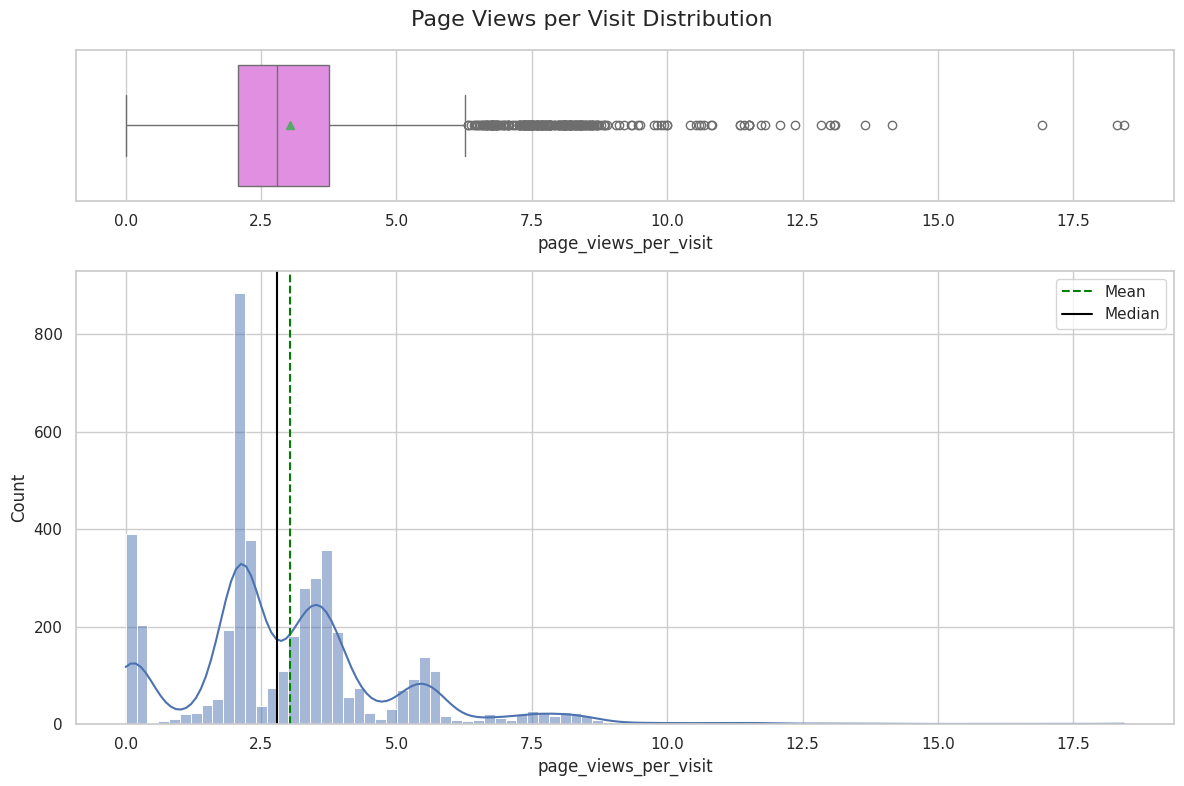

In [ ]:
# plot the distribution of the website_visits feature
enhanced_histogram_boxplot(data, "page_views_per_visit", kde = True, custom_title = "Page Views per Visit")

**Observations:**

* Right-Skewed Distribution:
   - The distribution of **page_views_per_visit** is **right-skewed** (positively skewed). This means that most users view a small number of pages during their visits, but a few users view significantly more pages, creating a tail on the right side.
   - The majority of users view around **2 to 4 pages** per visit.

* Mean vs. Median
   - The **mean** (green dashed line) is slightly higher than the **median** (black solid line), which is typical in right-skewed distributions. The outliers with very high page views are pulling the mean higher.
   - The **median** is just below 3 page views per visit, indicating that half of the users view fewer than 3 pages per visit.

* Boxplot Insights:
   - The boxplot shows that the **middle 50%** of the data (the interquartile range, or IQR) is between **2 and 4 page views per visit**.
   - There is a significant number of **outliers** on the right side, with users viewing as many as **12 to 17 pages per visit**. These outliers indicate that some users are highly engaged and view many more pages than average.

* Common Page View Patterns:
   - Most users view between **2 to 3 pages** per visit, as shown by the peak in the histogram. After that, the number of users viewing more pages decreases sharply.
   - A secondary small peak is observed around **4-5 pages**, indicating that there are some users who view a few more pages, but the overall frequency is lower.

* Outliers and Heavy Page Viewers:
   - The presence of numerous outliers indicates that there are some **highly engaged users** who view significantly more pages per visit (more than 7).
   - These outliers may represent power users or highly interested leads who are exploring a lot of content during their visits.



#### Feature: **Time Spent on Website**


Statistical Summary for time_spent_on_website:
Mean: 724.01
Median: 376.00
Standard Deviation: 743.83
Skewness: 0.95
Kurtosis: -0.58

Outlier Analysis:
IQR method - Number of outliers: 0
IQR method - Percentage of outliers: 0.00%
IQR method - Outlier range: < -1633.25 or > 3118.75
Z-score method - Number of outliers (|z| > 3): 0
Z-score method - Percentage of outliers: 0.00%


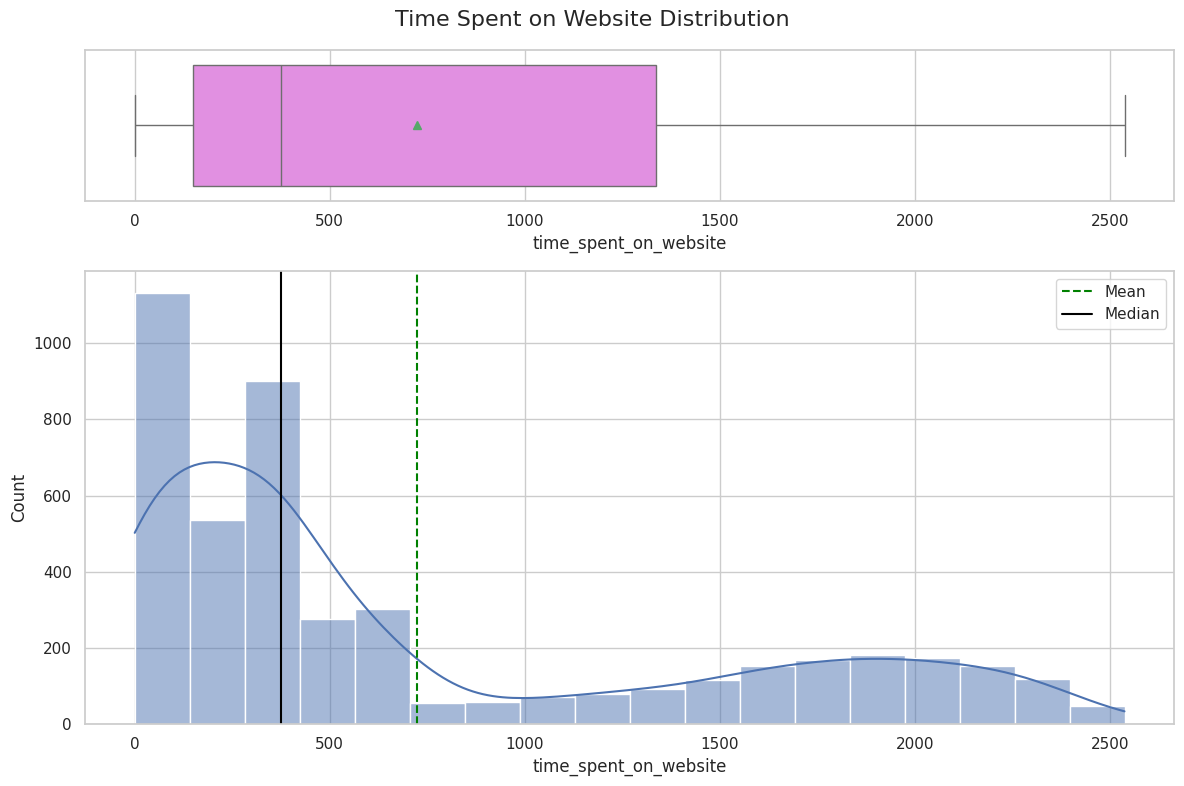

In [ ]:
# plot the distribution of the website_visits feature
enhanced_histogram_boxplot(data, "time_spent_on_website", kde = True, custom_title = "Time Spent on Website")

**Observations:**

* Right-Skewed Distribution:
   - The distribution of **time_spent_on_website** is **right-skewed** (positively skewed), meaning most users spend a relatively short amount of time on the website, with a small number of users spending significantly more time, creating the long right tail.
   - The majority of users spend less than **500 seconds** (around 8.5 minutes) on the website, while a smaller group of users spends much more time.

* Mean vs. Median:
   - The **mean** time spent on the website (green dashed line) is greater than the **median** (black solid line), which is typical in **right-skewed distributions** where a few high values (users spending a lot of time on the website) pull the mean upwards.
   - The **median** is around **376 seconds** (just over 6 minutes), indicating that 50% of users spend less than 6 minutes on the website.

* Boxplot Insights:
   - The **middle 50%** of the data (interquartile range, or IQR) shows that most users spend between **148 and 1336 seconds** on the website.
   - There are **no clear outliers** beyond the whiskers, although a small percentage of users spend upwards of **2000 seconds** (over 30 minutes) on the website, as seen in the histogram's tail.

* Common Time Spent Patterns:
   - The highest concentration of users spends **less than 500 seconds** on the website, which accounts for the bulk of the distribution.
   - There is a noticeable dip in users who spend between **500 and 1000 seconds**, but some users pick up again, showing a smaller peak toward the higher end of the time range (around **1500 seconds**).

Engaged Users:
   - A small subset of users spends significantly more time on the website (up to 2500 seconds or about 40 minutes). This group of highly engaged users may represent potential leads who are deeply interested in the content.



#### Feature: **Status**

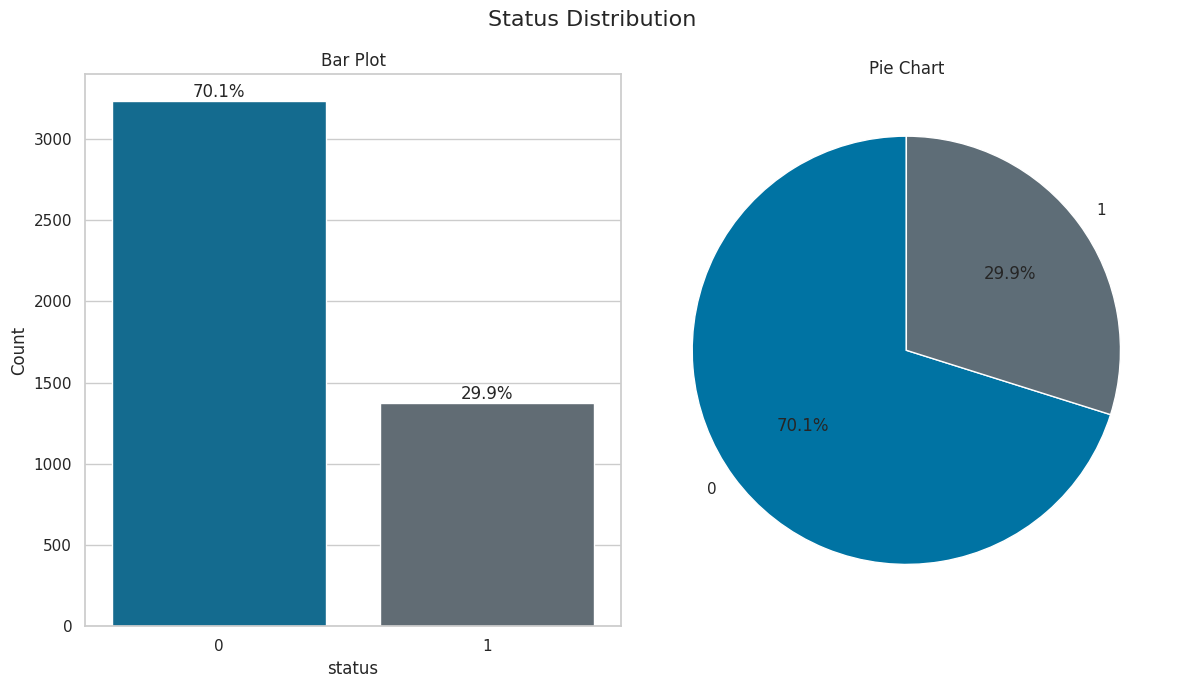

In [ ]:
# plot the distribution of the status feature
plot_binary_feature(data, "status", colors=['#0073a3', '#5e6d77'], show_title=True, custom_title="Status")

**Observations:**

* Imbalanced Target Variable (Status):
   - The **target variable** (status) is imbalanced.
   - **70.1%** of the data points belong to the **0** category, indicating that these leads **did not convert**.
   - **29.9%** of the data points belong to the **1** category, indicating that these leads **converted** to paying customers.
   
* Class Imbalance:
   - The dataset is **imbalanced**, with more leads **not converting (70.1%)** compared to those who **converted (29.9%)**.
   - While a conversion rate of approximately **30%** is not extremely low, the imbalance could still pose a challenge for machine learning models, as models tend to favor the majority class unless steps like **class balancing** or **resampling** are taken.
   



### **Distribution of Categorical Features**

The dataset contains the following categorical variables:

*   current_occupation
*   first_interaction
*   profile_completed
*   last_activity
*   print_media_type1
*   print_media_type2
*   digital_media
*   educational_channels
*   referral

#### Feature: **Current Occupation**

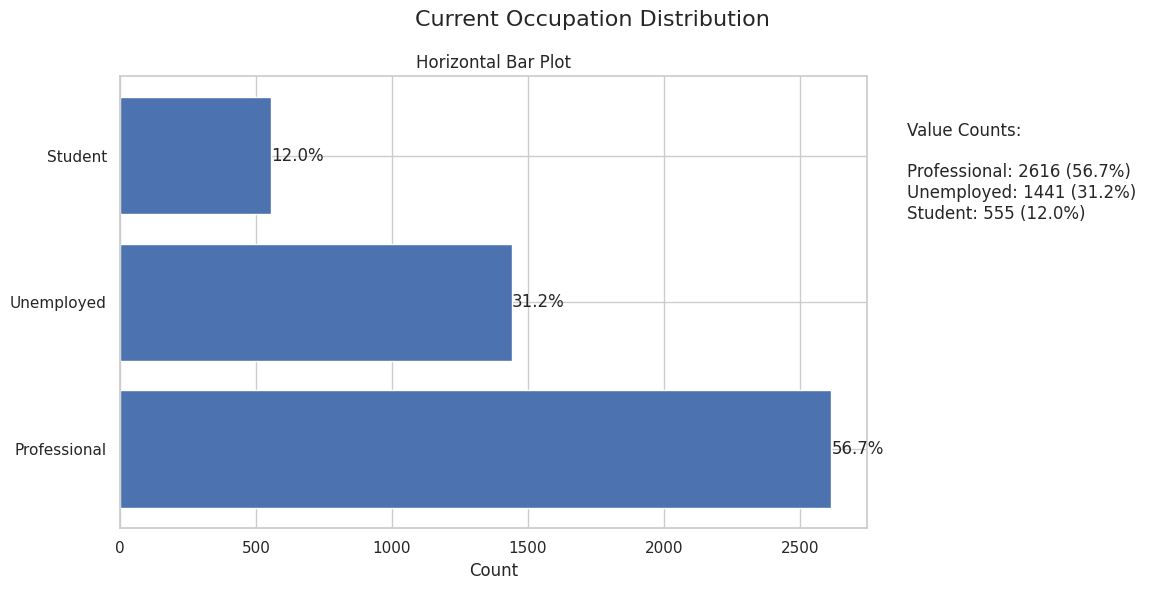

In [ ]:
plot_categorical(data, 'current_occupation', custom_title = 'Current Occupation Distribution')

**Observations**:

* Distribution of Occupations:
   - The **majority** of the leads (56.7%) are **Professionals**, indicating that over half of the leads come from this category.
   - **Unemployed** leads account for **31.2%** of the total, making it the second-largest group.
   - **Students** represent the smallest group, accounting for **12.0%** of the leads.

* Imbalance in Occupation Groups:
   - There is a clear **imbalance** in the distribution of occupations, with **Professionals** dominating the dataset.
   - **Unemployed** and **Student** categories are significantly smaller compared to the **Professional** group, which may affect how different occupations contribute to conversion rates or engagement metrics.




#### Feature **First Interaction**

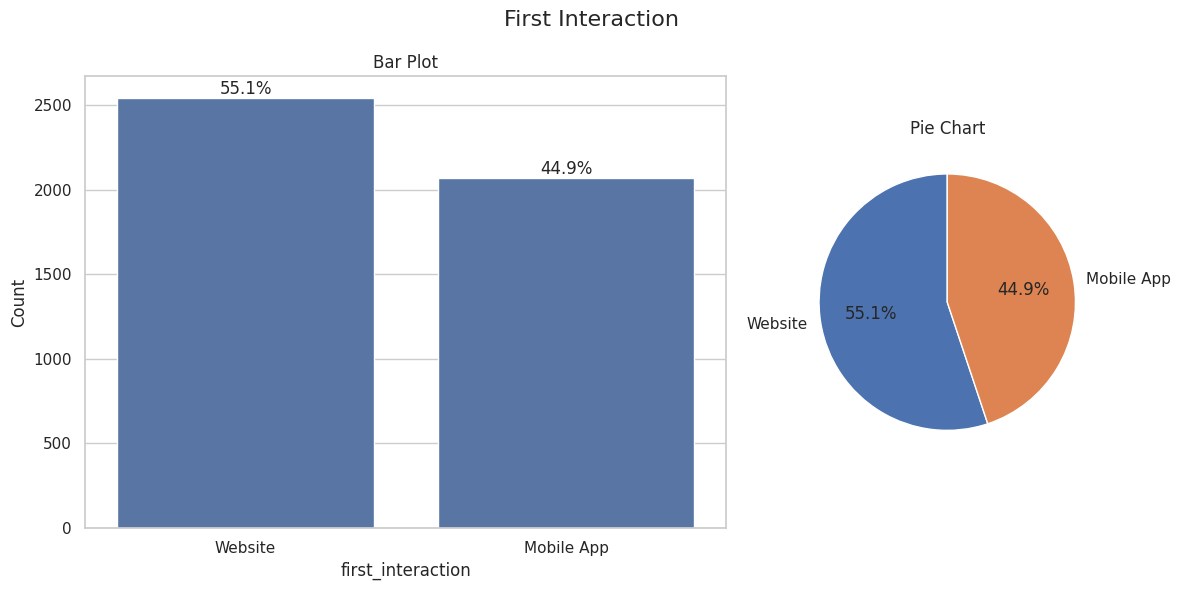

In [ ]:
plot_categorical(data, 'first_interaction', custom_title = 'First Interaction')

**Observations:**

* Distribution of First Interaction Channels:
   - **55.1%** of leads first interacted with the platform through the **Website**, making it the most common channel.
   - **44.9%** of leads first interacted through the **Mobile App**, which also represents a significant portion of the leads.

* Balanced Split Between Website and Mobile App:
   - While the **Website** is the more common first interaction channel, the split between the **Website (55.1%)** and **Mobile App (44.9%)** is relatively balanced.
   - This suggests that both channels are important for engaging leads and may require equal attention in terms of optimization and content delivery.



#### Feature: **Profile Completed**

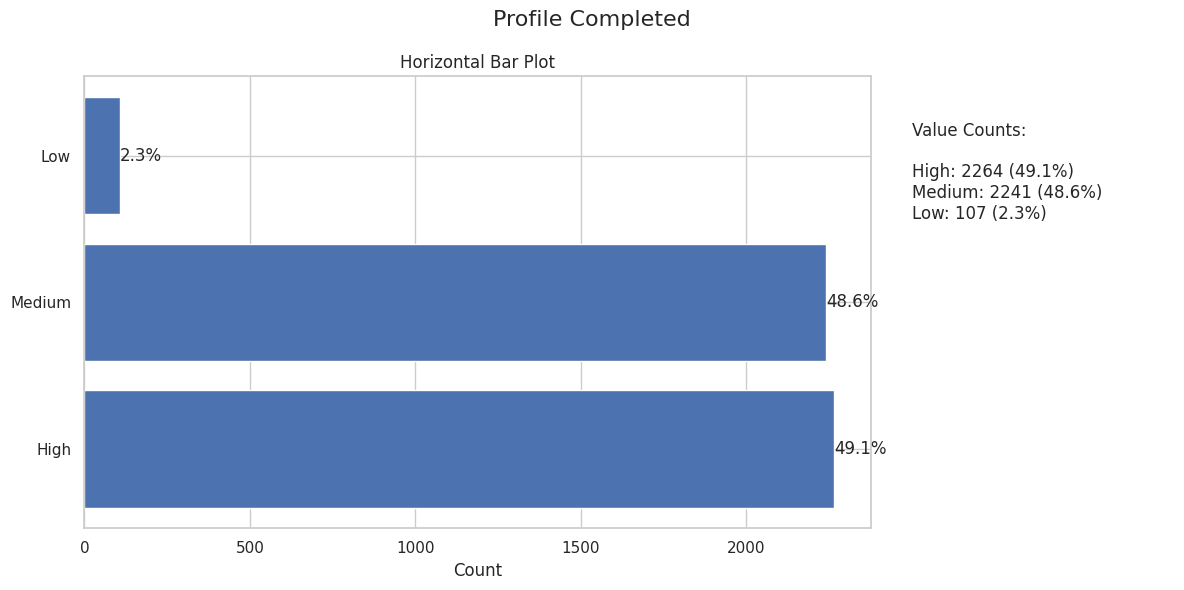

In [ ]:
plot_categorical(data, 'profile_completed', custom_title = 'Profile Completed')

**Observations:**

* Distribution of Profile Completion Levels:
   - **49.1%** of leads have a **High** profile completion level, meaning nearly half of the users have completed 75-100% of their profiles.
   - **48.6%** of leads have a **Medium** profile completion level (50-75% profile completion).
   - Only **2.3%** of leads have a **Low** profile completion level (0-50% profile completion).

* High Completion Rates:
   - The vast majority of leads have completed either **Medium** or **High** levels of their profiles, which is a positive sign of engagement. Around **97.7%** of users have at least 50% of their profile completed.
   - The **Low** completion group represents only a small portion (2.3%) of leads, suggesting that only a small minority of users fail to engage enough to complete even 50% of their profile.



#### Feature: **Last Activity**

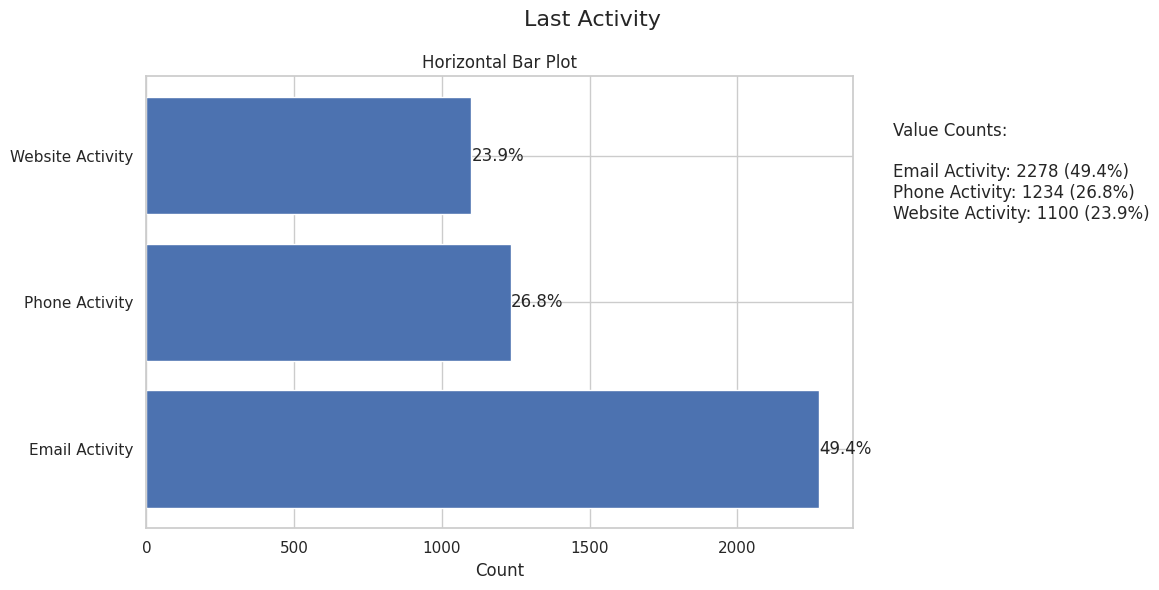

In [ ]:
plot_categorical(data, 'last_activity', custom_title = 'Last Activity')

**Observations:**

* Distribution of Last Activity Types:
   - **49.4%** of leads had their last activity through **Email Activity**, making it the most common last interaction type.
   - **26.8%** of leads had their last interaction through a **Phone Activity**.
   - **23.9%** of leads had their last interaction via **Website Activity**.

* Dominance of Email Activity:
   - The fact that **Email Activity** accounts for almost **half of all last activities** suggests that email is the most frequent communication channel for this lead population.
   - **Phone Activity** and **Website Activity** are also significant, though they are less frequent compared to email.




#### Feature: **Print Media Type 1**

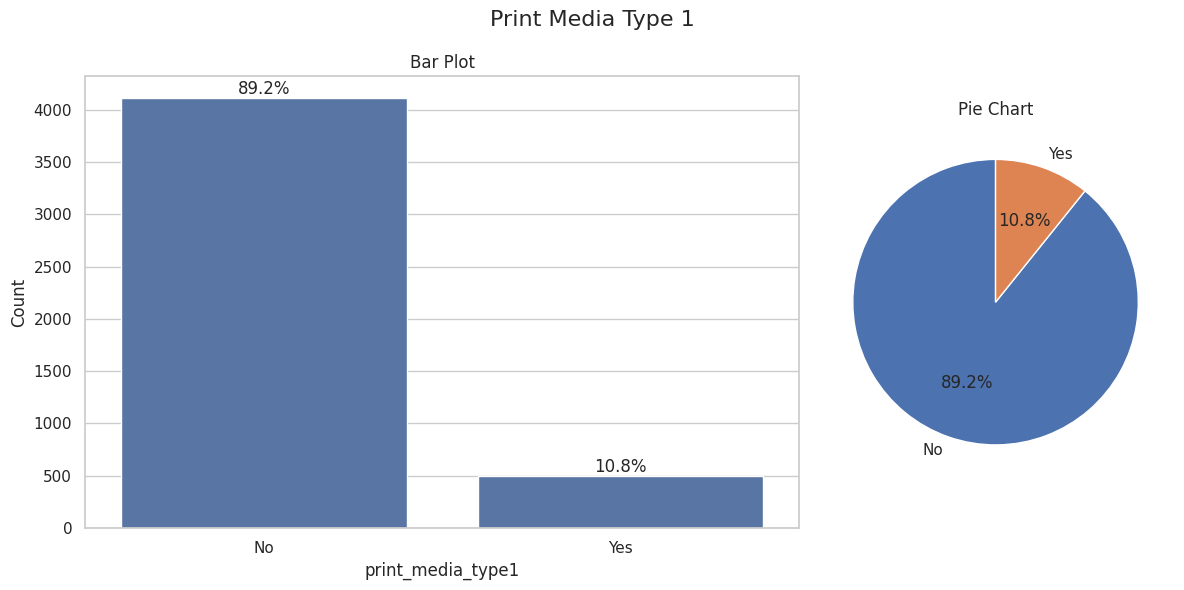

In [ ]:
plot_categorical(data, 'print_media_type1', custom_title = 'Print Media Type 1')

**Observations:**

* Dominance of 'No' for Print Media Type 1:
   - A large majority, **89.2%** of leads, did **not** interact with or see Print Media Type 1, ads in newspapers.
   - Only **10.8%** of leads interacted with or saw Print Media Type 1.

* Print Media Type 1 Underutilization:
   - Since most leads have not interacted with Print Media Type 1, it appears that this channel is underutilized or may not be as effective in reaching the target audience.



#### Feature: **Print Media Type 2**

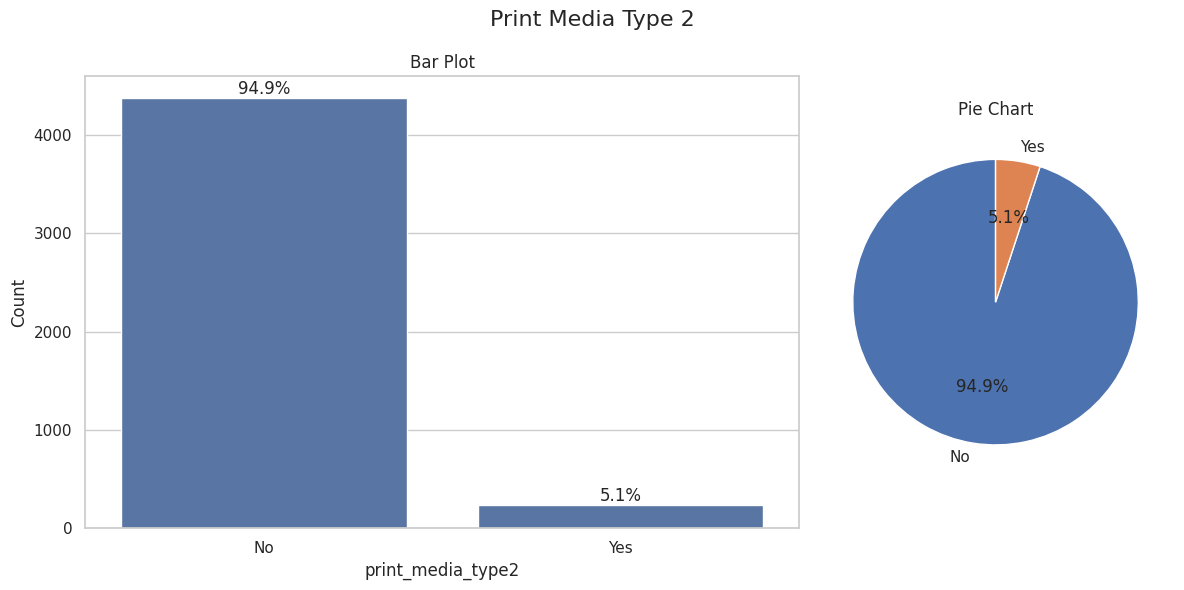

In [ ]:
plot_categorical(data, 'print_media_type2', custom_title = 'Print Media Type 2')

**Observations:**

* Very Limited Use of Print Media Type 2:
   - An overwhelming **94.9%** of leads were not exposed to Print Media Type 2, ads in magazines.
   - Only **5.1%** of leads were exposed to Print Media Type 2, indicating that this channel has very limited reach in the dataset.

* Underutilization of Print Media Type 2:
   - With only **5.1%** exposure, Print Media Type 2 seems to have been used sparingly or has not effectively reached a large portion of the leads.


#### Feature: **Digital Media**

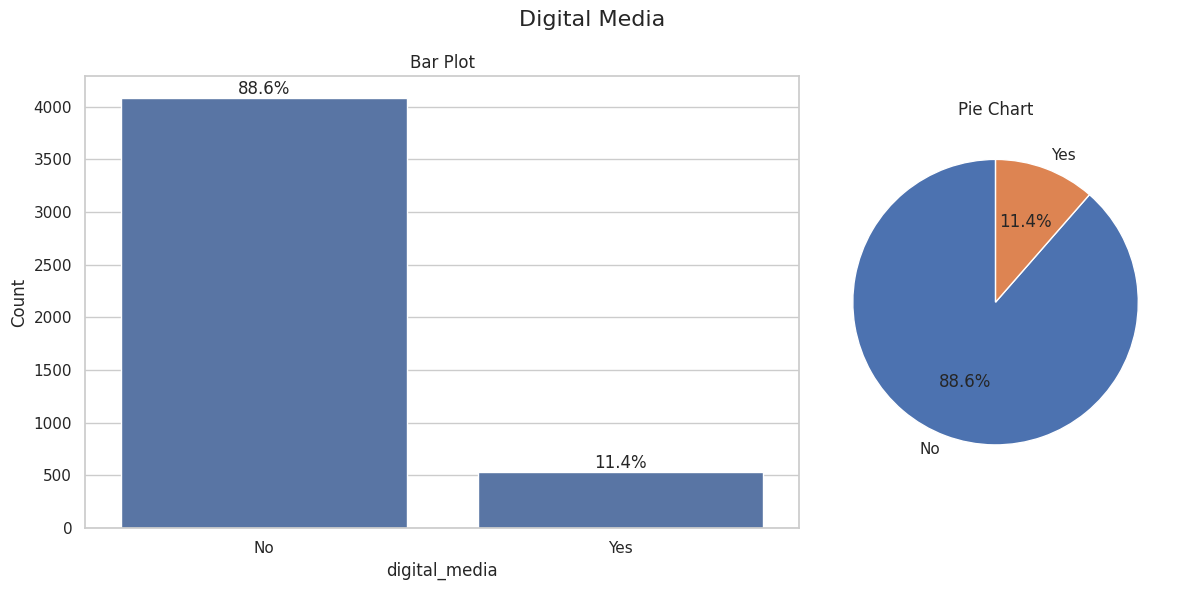

In [ ]:
plot_categorical(data, 'digital_media', custom_title = 'Digital Media')

**Observations:**

* Limited Exposure to Digital Media:
   - **88.6%** of leads were not exposed to **Digital Media** (e.g., ads on social media, online platforms, etc.).
   - Only **11.4%** of leads were exposed to **Digital Media**, suggesting that this channel has limited reach among the leads.

* Underutilization of Digital Media:
   - Despite the prominence of digital marketing in modern campaigns, it appears that **Digital Media** exposure is relatively low in this dataset. Only a small portion of leads interacted with digital channels.

#### Feature: **Educational Channels**

In [ ]:
plot_categorical(data, 'educational_channels', custom_title = 'Educational Channels')

NameError: name 'plot_categorical' is not defined

**Observations:**

* Limited Exposure to Educational Channels:
   - **84.7%** of leads were not exposed to **Educational Channels** (e.g., online forums, discussion threads, educational websites, etc.).
   - Only **15.3%** of leads were exposed to **Educational Channels**.

* Underutilization of Educational Channels*:
   - With only **15.3%** of leads exposed to these channels, it appears that educational platforms have been underutilized as a lead generation tool. Educational channels could be an opportunity for growth, given that they are often considered trusted sources of information for users looking to learn.

#### Feature: **Referral**

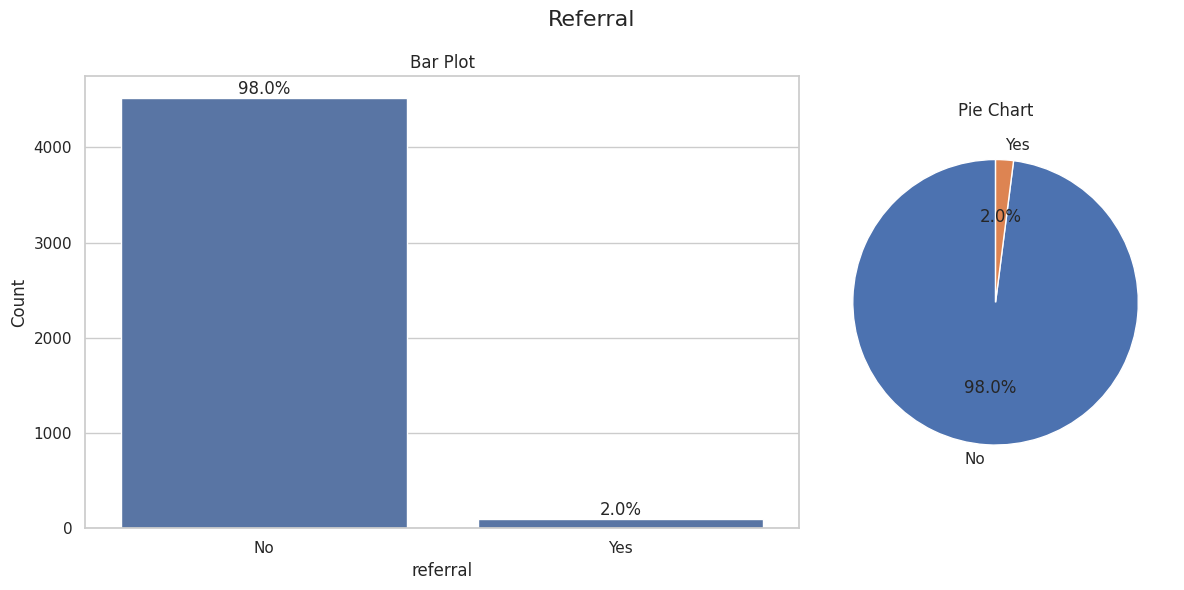

In [ ]:
plot_categorical(data, 'referral', custom_title = 'Referral')

**Observations:**

* Very Limited Use of Referral Channel:
   - A vast majority, **98.0%** of leads, did **not** come through referrals.
   - Only **2.0%** of leads were referred by others, indicating that referrals play a very small role in lead generation in this dataset.

* Underutilization of Referrals:
   - The **referral channel** is heavily underutilized, with only a small fraction of leads coming through this method. Given that referrals can often bring high-quality, engaged leads, this represents a potential area for growth.

## **Bivariate Analysis**

### Correlation **Heatmap**

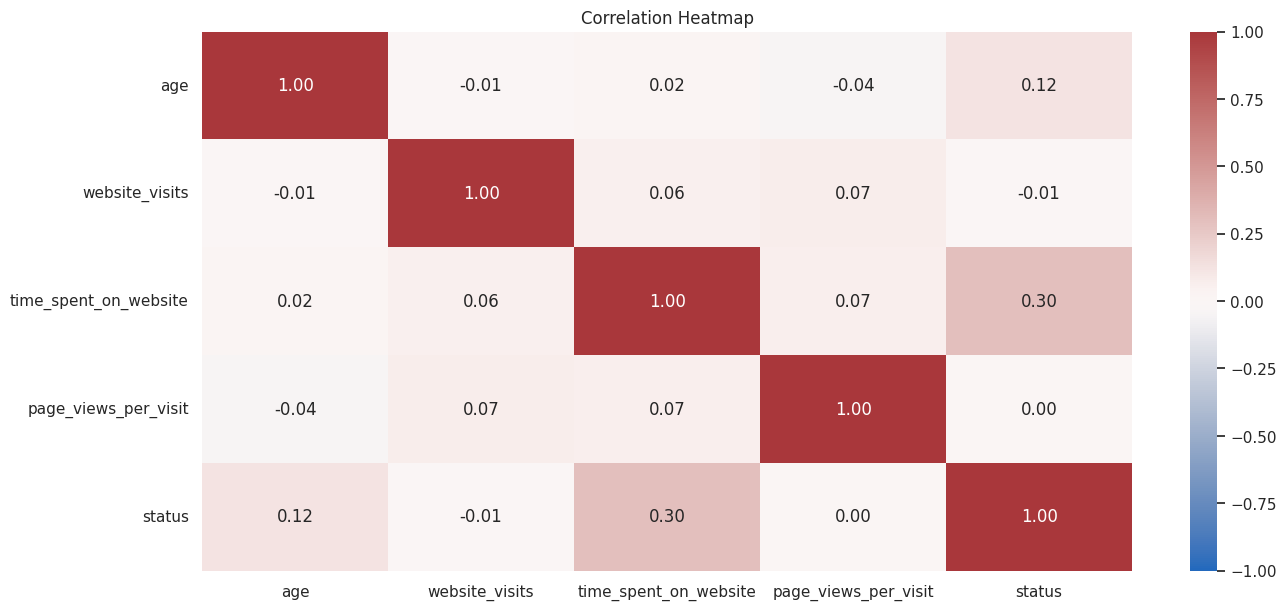

In [ ]:
# Create a correlation matrix (numerical vlaues only)

# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=np.number)

# Create heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="vlag")
plt.title("Correlation Heatmap")
plt.show()

**Observations**:

Target feature correlations:

- **Correlation between status and age**: 0.12
   - There is a weak positive correlation between age and status. As age increases, status may slightly increase as well, but the relationship is not strong.

- **Correlation between status and website_visits**: -0.01
   - There is a near-zero negative correlation between website visits and status, indicating that there's virtually no relationship between the number of website visits and status.

- **Correlation between status and time_spent_on_website**: 0.30
   - There is a moderate positive correlation between time spent on the website and status, suggesting that users who spend more time on the website are more likely to have a higher status.

- **Correlation between status and page_views_per_visit**: 0.00
   - There is no correlation between page views per visit and status, meaning that the number of pages viewed per visit does not relate to the user's status.

Other feature correlations:

- **age** has almost no correlation with **website_visits** (-0.01), **time_spent_on_website** (0.02), and **page_views_per_visit** (-0.04). These relationships are very weak and do not show any meaningful patterns.

- **website_visits** has weak positive correlations with **time_spent_on_website** (0.06) and **page_views_per_visit** (0.07). Both relationships are minimal, showing only slight increases in time spent and page views as website visits increase.

- **time_spent_on_website** has a weak positive correlation with **page_views_per_visit** (0.07), indicating a minimal relationship between the time spent on the website and the number of pages viewed per visit.

- **page_views_per_visit** has very weak positive correlations with both **website_visits** (0.07) and **time_spent_on_website** (0.07), indicating minimal relationships.

### Feature: **Status vs Age**

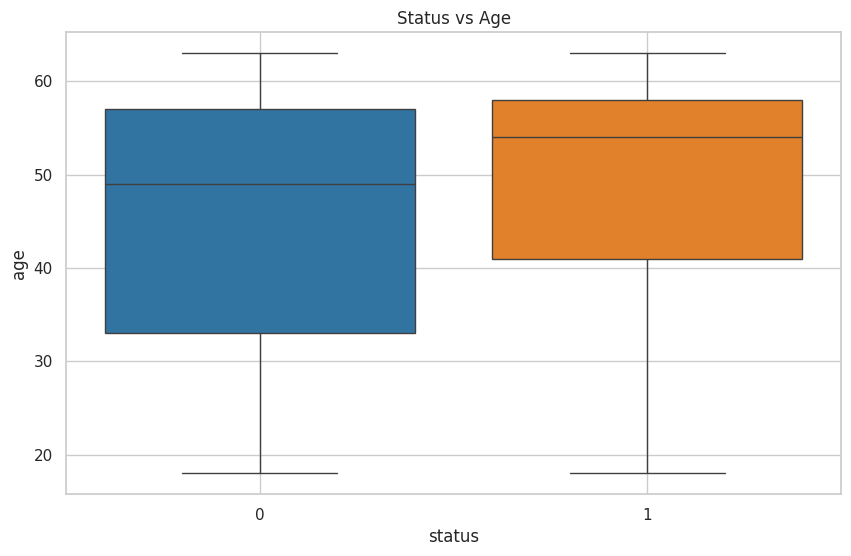

In [ ]:
# Generate the correct boxplot with 'status' on the x-axis and 'age' on the y-axis
plot_boxplot(x_column='status', y_column='age', data=dataset, title='Status vs Age')

**Observations**:

- **Median Age**:
   - For status 0 (left box), the median age appears to be around 50.
   - For status 1 (right box), the median age is slightly higher, perhaps around 53-54.
   
- **Interquartile Range (IQR)**:
   - The age distribution for status 0 spans a wider range, with the middle 50% of values (IQR) ranging from around 35 to 57.
   - The IQR for status 1 is narrower, ranging from approximately 45 to 58.

- **Whiskers (Range of Ages)**:
   - The whiskers (which show the range of data excluding outliers) extend from about 20 to 63 for both statuses, though there might be slight differences in the specific upper and lower bounds.
   
- **Outliers**:
   - There do not appear to be any extreme outliers for either group in this plot.

Interpretation:

- **Age Differences by Status**: The median age for status 1 is slightly higher than for status 0. However, the IQRs for both groups are quite close, indicating that the age distributions between the two groups aren't drastically different.
  
- **Potential Age Concentration**: Individuals with status 1 (right box) have a tighter distribution of ages, suggesting that there may be a more concentrated age range for that group, while status 0 (left box) has a wider distribution of ages, indicating more variability.

### Feature: **Status vs Current Occupation**

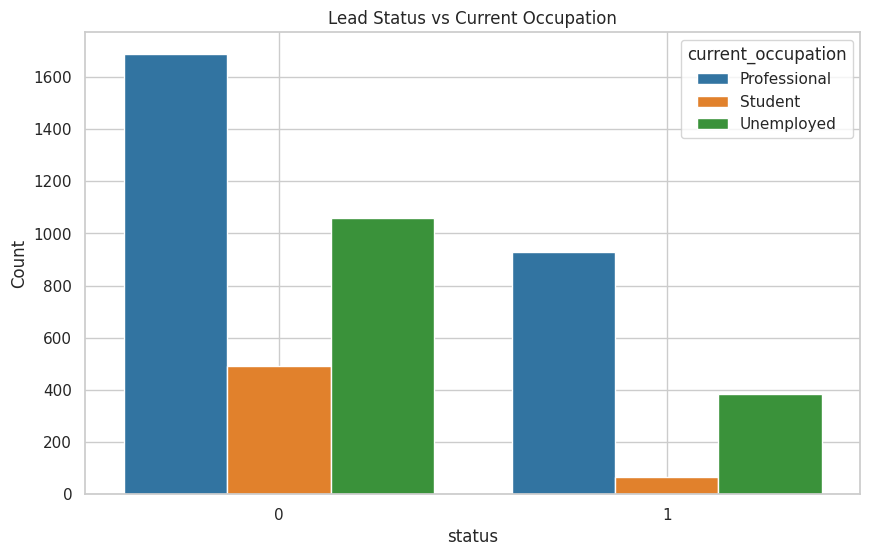

In [ ]:
# Generate count plot of 'status' vs 'current_occupation'
plot_countplot(x_column='status', hue_column='current_occupation', data=dataset, title='Lead Status vs Current Occupation')

**Observations**:

- **Professional**:
   - **Professionals** are the largest group in both **status 0** and **status 1** categories.

- **Unemployed**:
   - The **unemployed** group is more frequently associated with **status 1**.
   - There are more unemployed users in the **status 1** group compared to the status 0 group, suggesting that unemployed individuals may have a higher likelihood of achieving status 1.

- **Students**:
   - **Students** are more commonly found in the **status 0** group.
   - Very few students achieve **status 1**, indicating that students might face more difficulty in reaching this status.

Interpretation:

- **Professionals** are distributed across both status groups, while the **unemployed** are more represented in the **status 1** group, suggesting a possible higher engagement for unemployed users.
- **Students** are predominantly associated with **status 0**, indicating they may need more engagement or resources to reach **status 1**.

### Feature: **Status vs. First Interaction**

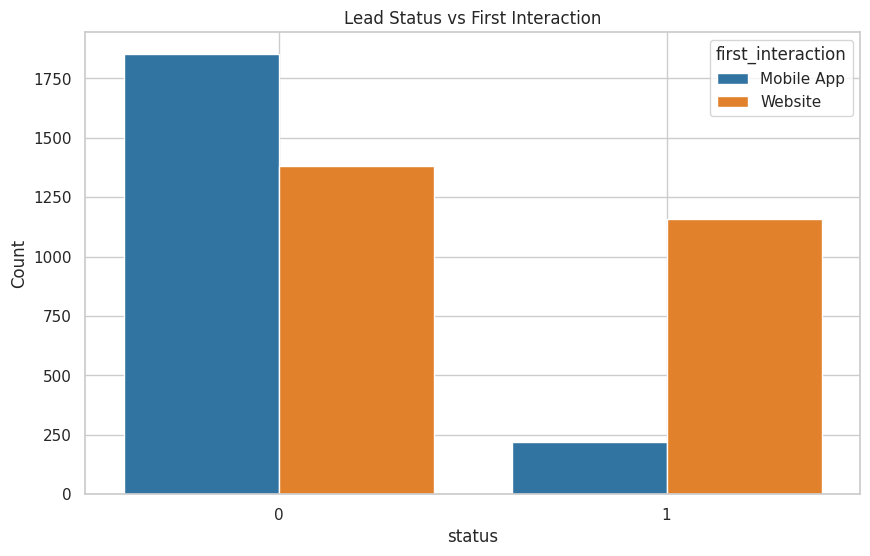

In [ ]:
# Generate count plot of 'status' vs 'first_interaction'
plot_countplot(x_column='status', hue_column='first_interaction', data=dataset, title='Lead Status vs First Interaction')

**Observations**:

- **Website Interaction**:
   - The **website** is the dominant first interaction method for both **status 0** and **status 1** users.
   - However, **status 1** users have a noticeably higher proportion of website interactions compared to status 0 users, indicating that website interaction is more common among users who achieve status 1.

- **Mobile App Interaction**:
   - **Mobile app interaction** is much less common overall but is more frequently associated with **status 0** users.
   - Very few users with **status 1** first interacted through the mobile app, suggesting that this interaction method is less likely to lead to achieving status 1.

Interpretation:

- **Website interaction** is more strongly associated with users who achieve **status 1**, while **mobile app interaction** is more prevalent among **status 0** users.
- This suggests that users who first interact via the website may have a higher chance of reaching **status 1**, while those who use the mobile app may need additional engagement strategies to improve their outcomes.


### Feature: **Status vs. Profile Completed**

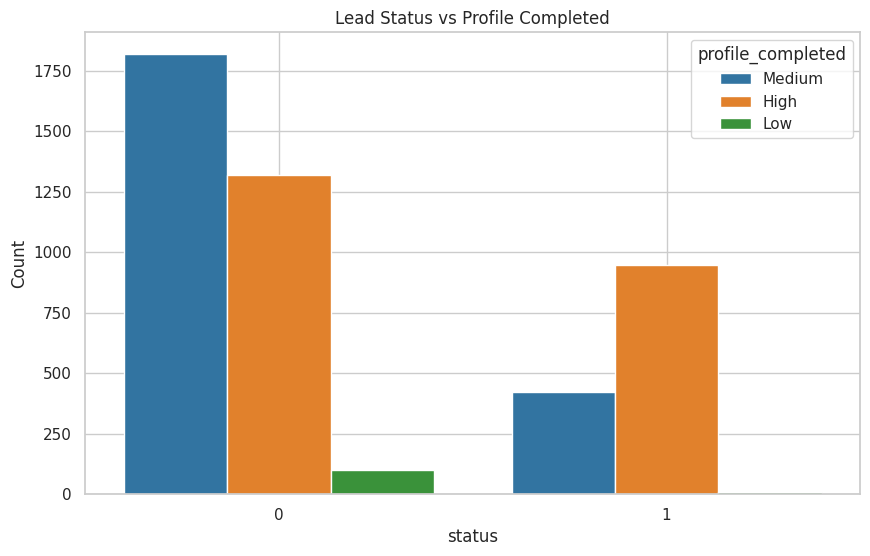

In [ ]:
# Generate count plot of 'status' vs 'profile_completed'
plot_countplot(x_column='status', hue_column='profile_completed', data=dataset, title='Lead Status vs Profile Completed')

**Observations**:

- **High Profile Completion**:
   - Users with **high profile completion** are found in both **status 0** and **status 1** groups.
   - There is a relatively even distribution between the two groups, indicating that high profile completion is not strongly biased toward either status.

- **Medium Profile Completion**:
   - **Medium profile completion** is more frequently associated with **status 0** users.
   - There are significantly fewer users with medium profile completion in the **status 1** group, suggesting that users with medium completion are less likely to achieve status 1.

- **Low Profile Completion**:
   - **Low profile completion** is almost entirely associated with **status 0**.
   - There are no users with low profile completion in the **status 1** group, indicating that achieving status 1 is highly unlikely for users with low profile completion.

Interpretation:

- **High profile completion** is common across both status groups, but **medium and low profile completion** are more heavily associated with **status 0**.
- Users with **low profile completion** are almost exclusively in the **status 0** group, suggesting that improving profile completion may be a key factor in achieving **status 1**.


### Feature: **Status vs. Website Visits**

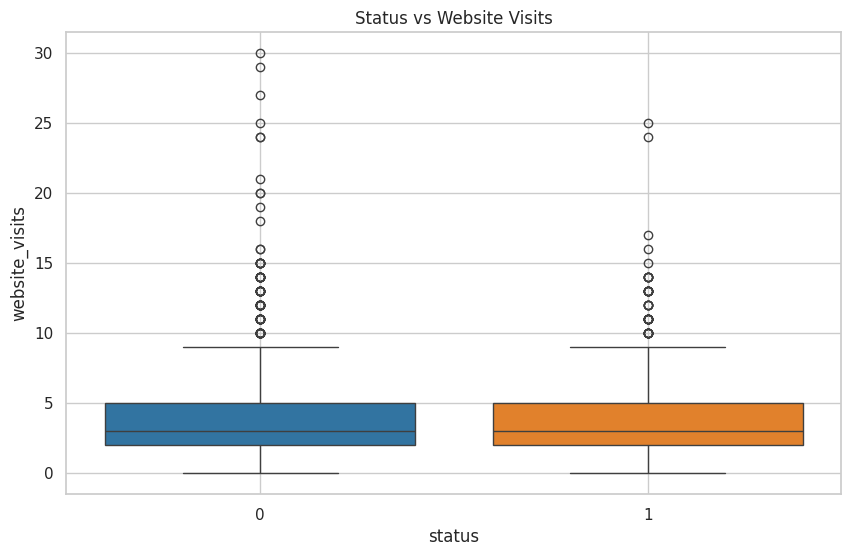

In [ ]:
# Generate the correct boxplot with 'status' on the x-axis and 'website_visits' on the y-axis
plot_boxplot(x_column='status', y_column='website_visits', data=dataset, title='Status vs Website Visits')

**Observations**:

- **Median Website Visits**:
   - Both **status 0** and **status 1** groups have a similar median number of website visits, which appears to be around 4 to 5 visits.

- **Interquartile Range (IQR)**:
   - The middle 50% (IQR) of users in both status categories have between 2 and 6 website visits, indicating a similar range of website engagement for both groups.

- **Outliers**:
   - There are **multiple outliers** in both status 0 and status 1 groups. These outliers represent users who have visited the website many more times (as high as 30 visits), which is significantly higher than the typical range.
   - The number of outliers is more pronounced in the **status 0** group, suggesting that some users in this category have visited the website more frequently compared to status 1 users.

Interpretation:

- Both **status 0** and **status 1** groups exhibit similar behavior in terms of typical website visits.
- The presence of numerous outliers, particularly in the status 0 group, indicates that some users visit the website much more frequently, although this behavior is less common in the status 1 group.


### Feature: **Status vs. Time Spent on Website**

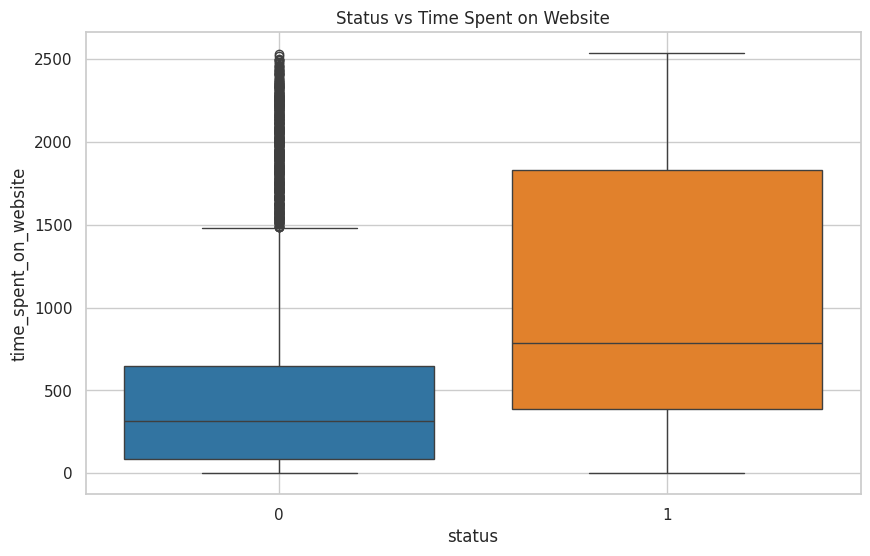

In [ ]:
# Generate the correct boxplot with 'status' on the x-axis and 'time_spent_on_website' on the y-axis
plot_boxplot(x_column='status', y_column='time_spent_on_website', data=dataset, title='Status vs Time Spent on Website')

**Observations**:

- **Median Time Spent**:
   - Users with **status 0** spend a median of approximately **300 minutes** on the website.
   - Users with **status 1** spend significantly more time on the website, with a median of approximately **800 minutes**. This indicates that users with status 1 tend to spend more time on the website on average.

2. **Interquartile Range (IQR)**:
   - For **status 0** users, the IQR (middle 50% of the data) is between approximately **100 minutes** and **600 minutes**. This shows that most users with status 0 have a fairly concentrated time spent.
   - For **status 1** users, the IQR is much wider, between approximately **400 minutes** and **1800 minutes**. This indicates that time spent on the website for status 1 users is far more spread out, suggesting diverse usage patterns among this group.

3. **Outliers**:
   - Both groups have outliers. Users with **status 0** have extreme cases where some individuals have spent up to approximatley **2500 minutes** on the website.
   - For **status 1**, also has outliers but they are less frequent compared to status 0.

Interpretation:

- **Status 1** users spend more time on the website than **status 0** users on average, with a higher median and a much wider range of time spent.
- **Status 0** users tend to have a more concentrated range of time spent on the website, but they exhibit more frequent extreme outliers.

These insights suggest that time spent on the website may be a strong indicator of achieving **status 1**. Let me know if you'd like to explore further or analyze additional variables!

### Feature: **Status vs. Page Views per Visit**

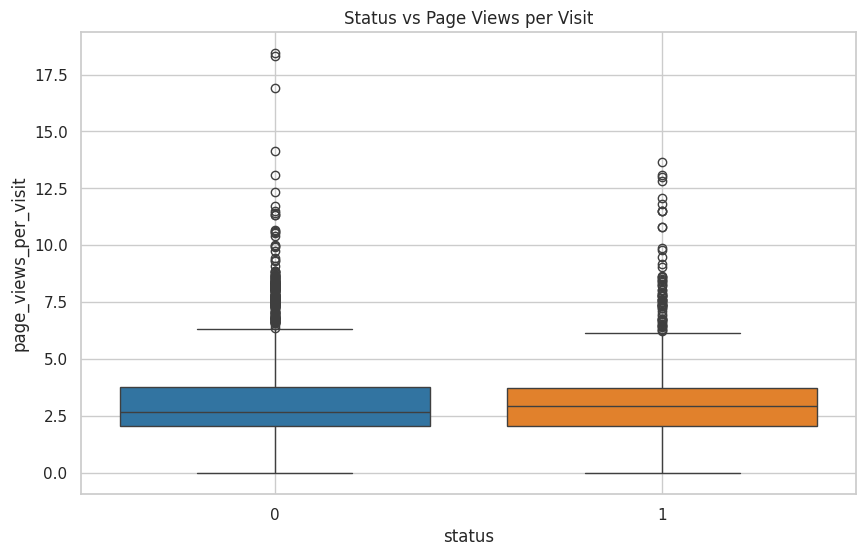

In [ ]:
# Generate the correct boxplot with 'status' on the x-axis and 'page_views_per_visit' on the y-axis
plot_boxplot(x_column='status', y_column='page_views_per_visit', data=dataset, title='Status vs Page Views per Visit')

**Observations**:

- **Median Page Views per Visit**:
   - **Status 1** users have a **lower median** page views per visit, meaning that, on average, users with status 1 tend to view **fewer pages** per visit.
   - **Status 0** users have a **higher median** page views per visit, suggesting that these users tend to view more pages on each visit compared to status 1 users.

- **Interquartile Range (IQR)**:
   - The **IQR for status 1** is narrower, indicating that most users in this group have a more consistent and limited range of page views per visit.
   - The **IQR for status 0** is wider, showing greater variability in page views per visit for this group, with some users viewing significantly more pages during their visits.

- **Outliers**:
   - **Status 0** users show **many more outliers**, with a few individuals viewing a very high number of pages per visit, suggesting that some users engage very deeply with the content, or have more questions or concerns about converting to a paid customer.
   - **Status 1** users have fewer outliers, meaning that this group tends to show more consistent behavior in terms of page views per visit.

Interpretation:

- **Status 0** users view more pages per visit on average, and their behavior is more variable, with some users viewing a very high number of pages.
- **Status 1** users view fewer pages per visit on average and show more consistent behavior with fewer outliers.

This suggests that viewing more pages per visit is associated with **status 0**, while users with **status 1** tend to view fewer pages per visit.

### Feature: **Status vs. Last Activity**

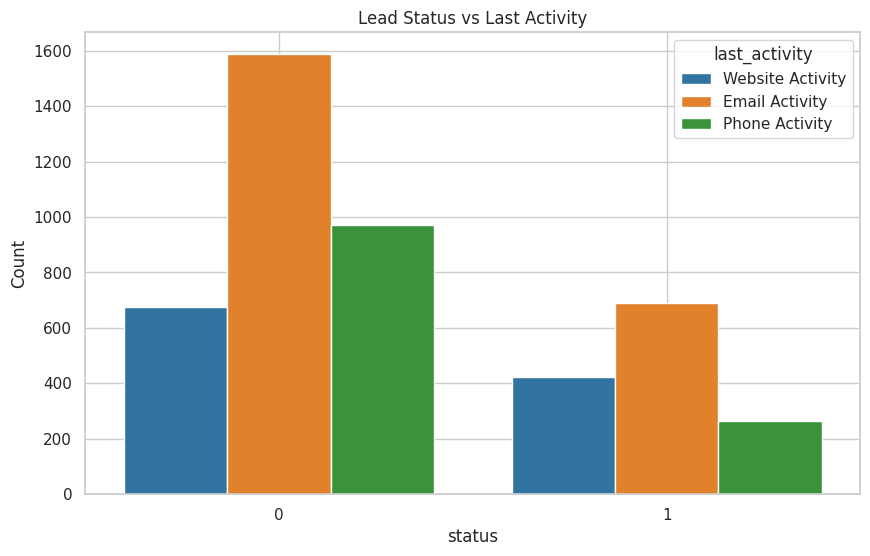

In [ ]:
# Generate count plot of 'status' vs 'last_activity'
plot_countplot(x_column='status', hue_column='last_activity', data=dataset, title='Lead Status vs Last Activity')

**Observations**:

- **Website Activity**:
   - **Website Activity** is the most common last activity for both **status 0** and **status 1** users.
   - **Status 1** users have a significantly larger proportion of **Website Activity** compared to **status 0** users, indicating that this activity is more commonly associated with users who achieve status 1.

- **Email Activity**:
   - **Email Activity** appears more frequently as the last activity for **status 0** users compared to **status 1** users, suggesting that email engagement might be less common among those achieving status 1.

- **Other Activities (e.g., SMS, Phone Call)**:
   - Activities like **Phone Call** and **SMS Activity** are much less frequent in both groups, with no clear trend favoring either status group.

Interpretation:

- **Website Activity** appears to be more strongly associated with users who achieve **status 1**.
- **Email Activity** is more prevalent among **status 0** users, suggesting different engagement patterns between the two groups.


### Feature: **Status vs. Print Media Type 1**

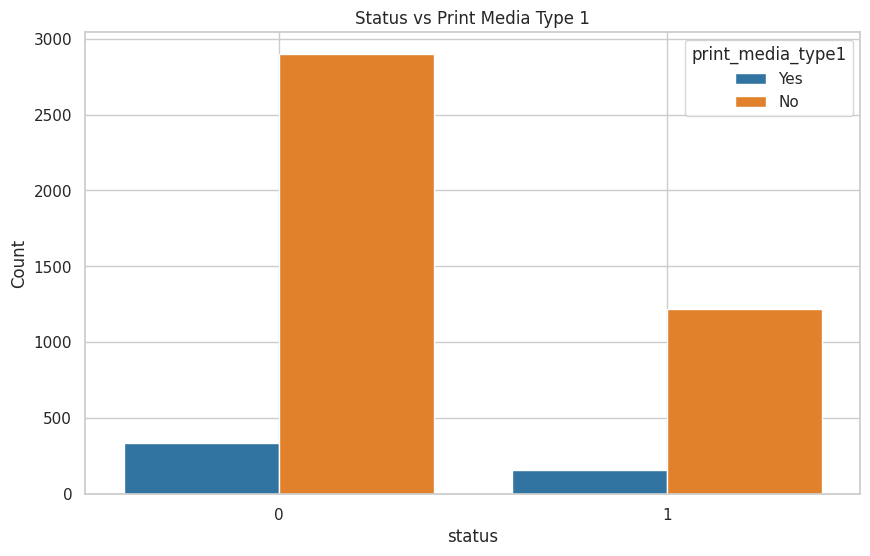

In [ ]:
# Generate count plot of 'status' vs 'print_media_type1'
plot_countplot(
              x_column='status',
              hue_column='print_media_type1',
              data=dataset,
              title='Status vs Print Media Type 1',
              hue_order=['Yes', 'No']
              )

**Observations**:

- **Print Media Type 1 - Yes**:
   - A **smaller number** of users in both **status 0** and **status 1** engaged with print media type 1.
   - The proportion of users who engaged with print media type 1 is low in both statuses, though it is slightly more prominent in **status 0**.

- **Print Media Type 1 - No**:
   - The **majority** of users in **status 0** did **not** engage with print media type 1.
   - A significant portion of users in **status 1** also did not engage with print media type 1, although there is a noticeable drop compared to status 0.

Interpretation:

- The majority of users in both **status 0** and **status 1** did not engage with print media type 1.
- While print media engagement is minimal, a slightly higher proportion of **status 0** users engaged with print media type 1 compared to **status 1** users, indicating that print media type 1 is not a strong indicator of achieving status 1.

### Feature: **Status vs. Print Media Type 2**

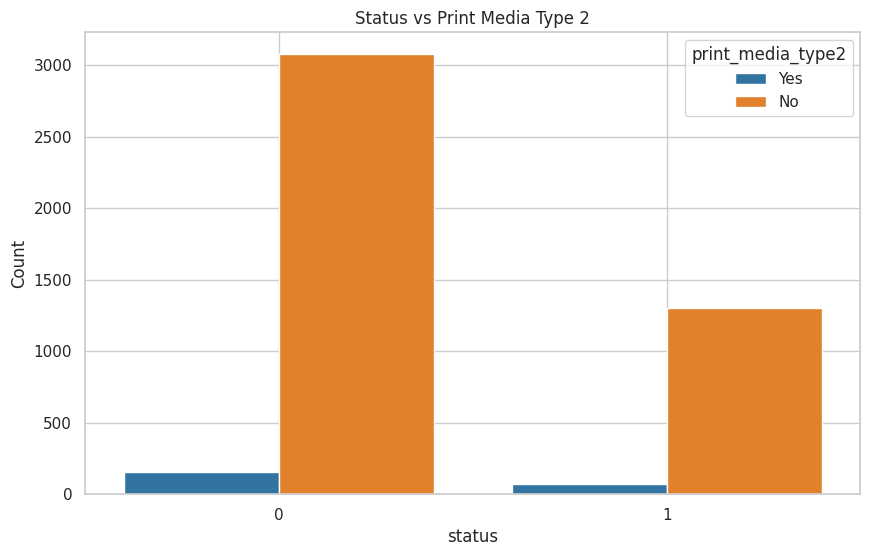

In [ ]:
# Generate count plot of 'status' vs 'print_media_type2'
plot_countplot(
              x_column='status',
              hue_column='print_media_type2',
              data=dataset,
              title='Status vs Print Media Type 2',
              hue_order=['Yes', 'No']
              )

**Observations**:

- **Print Media Type 2 - Yes**:
   - A **small number** of users in both **status 0** and **status 1** groups engaged with print media type 2.
   - The proportion of users who engaged with print media type 2 is low in both statuses, though it is slightly more common in **status 0**.

- **Print Media Type 2 - No**:
   - The **majority** of users in both **status 0** and **status 1** groups did **not** engage with print media type 2.
   - There is a significant number of users in both groups who did not interact with print media type 2, with **status 0** having a larger count.

Interpretation:

- Most users in both **status 0** and **status 1** groups did **not** engage with print media type 2.
- Engagement with print media type 2 does not seem to be a strong indicator of achieving **status 1**, as only a small fraction of users in both groups engaged with it.

### Feature: **Status vs. Digital Media**

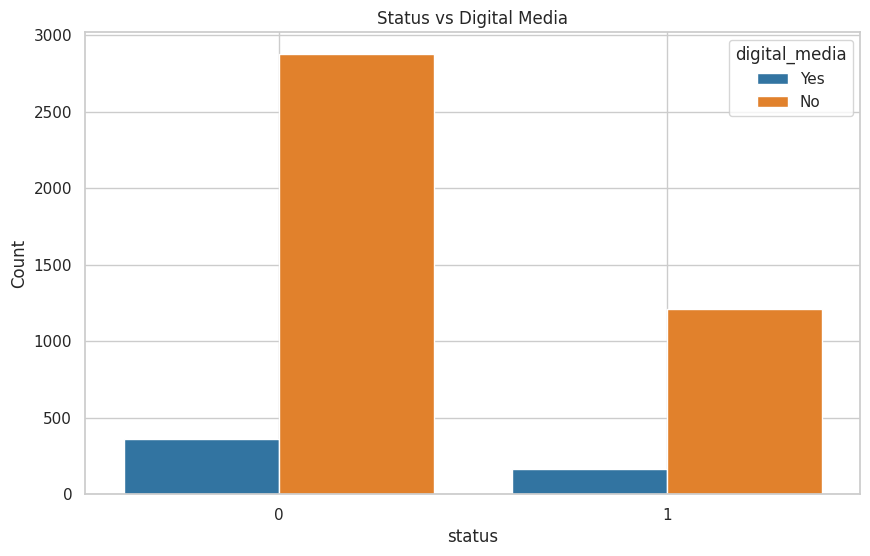

In [ ]:
# Generate count plot of 'status' vs 'digital_media'
plot_countplot(
              x_column='status',
              hue_column='digital_media',
              data=dataset,
              title='Status vs Digital Media',
              hue_order=['Yes', 'No']
              )

**Observations**:

- **Digital Media - Yes**:
   - A **small proportion** of users in both **status 0** and **status 1** groups engaged with digital media.
   - Engagement with digital media is **more common in the status 0 group** than in the status 1 group.

- **Digital Media - No**:
   - The **majority** of users in both **status 0** and **status 1** groups did **not** engage with digital media.
   - **Status 0** has a higher count of users who did not engage with digital media compared to **status 1** .

Interpretation:

- **Digital media engagement** is **more prevalent among status 0** users than status 1 users.
- Users who did not engage with digital media form the **majority** in both **status 0** and **status 1** groups, but a slightly **larger proportion** of **status 0** users have not been exposed to digital media compared to **status 1**.

### Feature: **Status vs. Educational Channels**

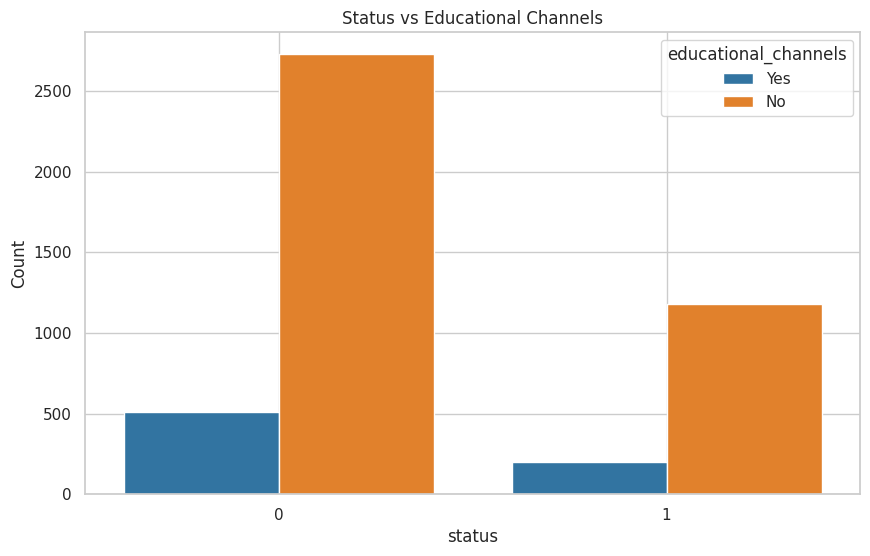

In [ ]:
# Generate count plot of 'status' vs 'educational_channels'
plot_countplot(
              x_column='status',
              hue_column='educational_channels',
              data=dataset,
              title='Status vs Educational Channels',
              hue_order=['Yes', 'No']
              )

**Observations**:

- **Educational Channels - Yes**:
   - A smaller proportion of users in both **status 0** and **status 1** engaged with educational channels (represented by the blue bars).
   - Engagement with educational channels is slightly more common among **status 0** users (a small number of blue bars in the status 0 group compared to the status 1 group).

- **Educational Channels - No**:
   - The **majority** of users in both **status 0** and **status 1** groups did **not** engage with educational channels (represented by the orange bars).
   - **Status 0** has a larger number of users who did not engage with educational channels compared to **status 1**.

Interpretation:

- **Educational channel engagement** is low for both status groups, with most users not engaging with educational channels.
- A slightly higher number of **status 0** users engaged with educational channels than **status 1** users, but overall, educational channels don't appear to be a strong differentiator between the two statuses.

### Feature: **Status vs. Referral**

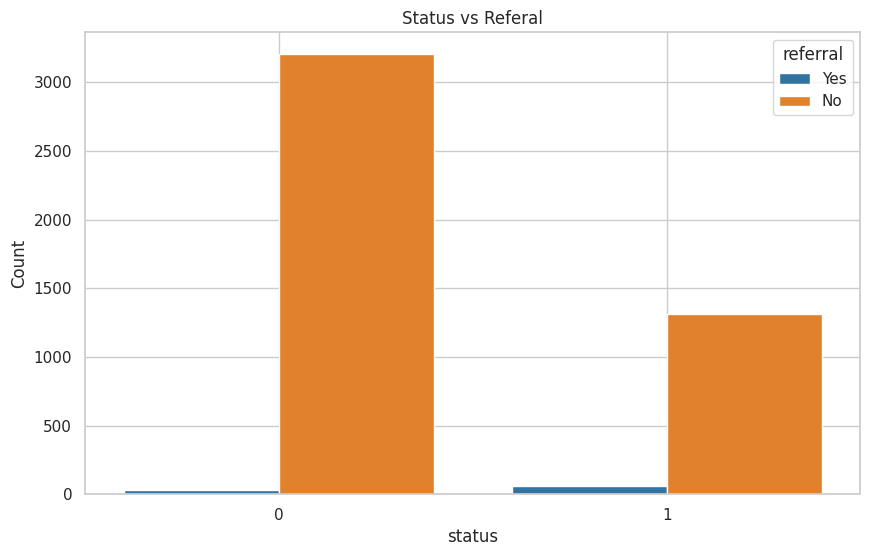

In [ ]:
# Generate count plot of 'status' vs 'referral'
plot_countplot(
              x_column='status',
              hue_column='referral',
              data=dataset,
              title='Status vs Referal',
              hue_order=['Yes', 'No']
              )

**Observations**:

- **Referral - Yes**:
   - Only a **small proportion** of users in both **status 0** and **status 1** came through a referral (represented by the blue bars).
   - Referrals are slightly more common in the **status 1** group compared to **status 0**, but overall, the referral numbers are very low in both groups.

- **Referral - No**:
   - The **majority** of users in both **status 0** and **status 1** did **not** come through a referral (represented by the orange bars).
   - **Status 0** has a larger number of users who did not come through a referral compared to **status 1**.

Interpretation:

- **Referrals are rare** in both groups, and most users did not come through a referral.
- Although **status 1** users show a slightly higher referral rate than **status 0** users, the impact of referrals seems minimal overall.

### Feature: **Age vs Website Visits**

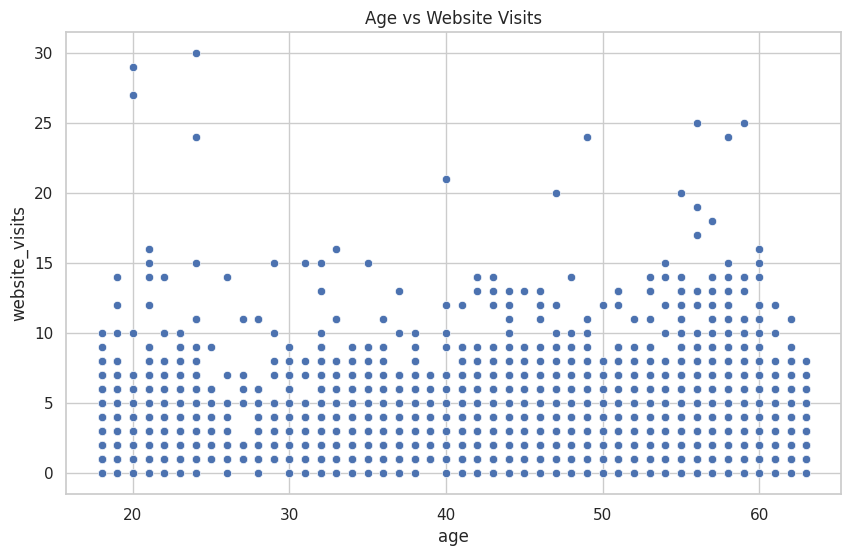

In [ ]:
# Generate the scatter plot using the function call for 'age' vs 'website_visits'
plot_scatter('age', 'website_visits', data, title='Age vs Website Visits')

**Observations:**

- **Age** and **website visits** have a **negligible correlation** (-0.01). The scatter plot confirms that there is no significant relationship between these two variables.

- Website visits are evenly distributed across different ages with no noticeable trend, indicating that age does not play a meaningful role in determining how many times a user visits the website.

### Feature: **Age vs Time Spent on Website**

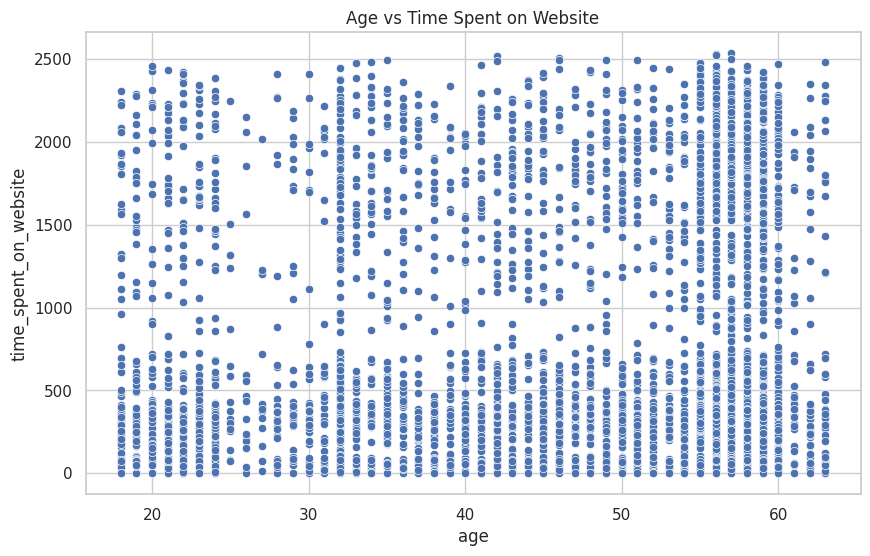

In [ ]:
# Generate the scatter for 'age' vs 'time_spent_on_website'
plot_scatter('age', 'time_spent_on_website', data, title='Age vs Time Spent on Website')

**Observations**:

- **Age** and **time spent on the website** show a **moderate positive correlation** (0.30), suggesting that older individuals tend to spend more time on the website.

- This correlation indicates that as age increases, so does the time spent on the website, making this a meaningful relationship in the dataset.

- Despite some variability, older users generally have longer website sessions than younger users.

### Feature: **Age vs Page Views per Visit**

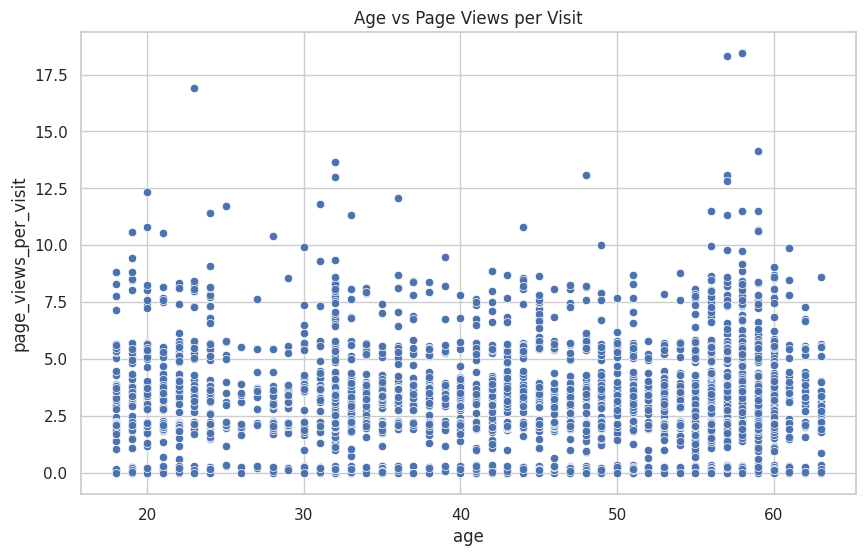

In [ ]:
# Generate the scatter plot for 'age' vs 'page_views_per_visit'
plot_scatter('age', 'page_views_per_visit', data, title='Age vs Page Views per Visit')

**Observations**:

- **Age** and **page views per visit** show a **weak negative correlation** (-0.04), indicating there is no meaningful relationship between these two variables.

- The scatter plot reveals no distinct pattern between age and page views per visit. The number of pages viewed per visit does not significantly vary across different age groups.

### Feature: **Age vs Status**

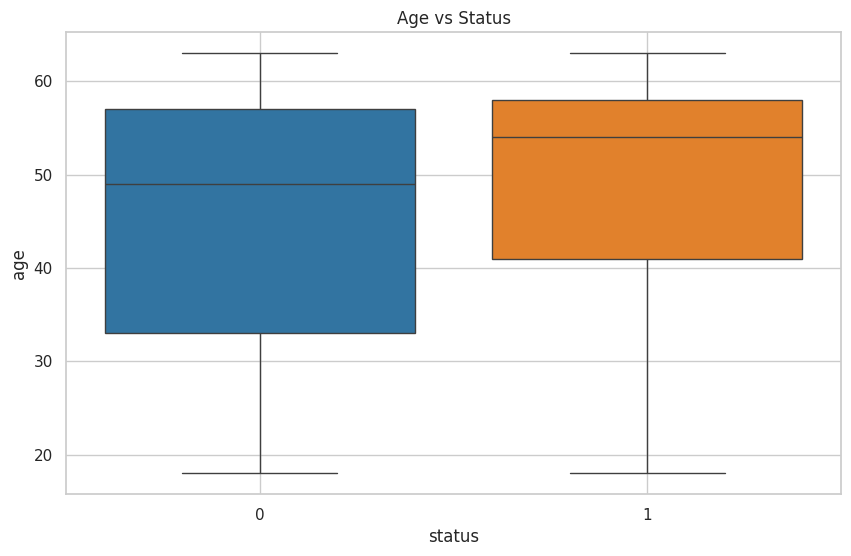

In [ ]:
# Generate the correct boxplot with 'status' on the x-axis and 'age' on the y-axis
plot_boxplot(x_column='status', y_column='age', data=dataset, title='Age vs Status')

**Observations**:

- **Age** and **status** show a **weak positive correlation** (0.12), indicating that older individuals are *slightly* more likely to have a status of 1.

- The boxplot reveals a minor difference in the median age between status 0 and status 1, with older individuals more likely to fall into the status 1 category.

- This weak correlation is still meaningful when combined with the moderate correlation between **age** and **time spent on the website**.

### Feature: **Website Visits vs Time Spent on Website**

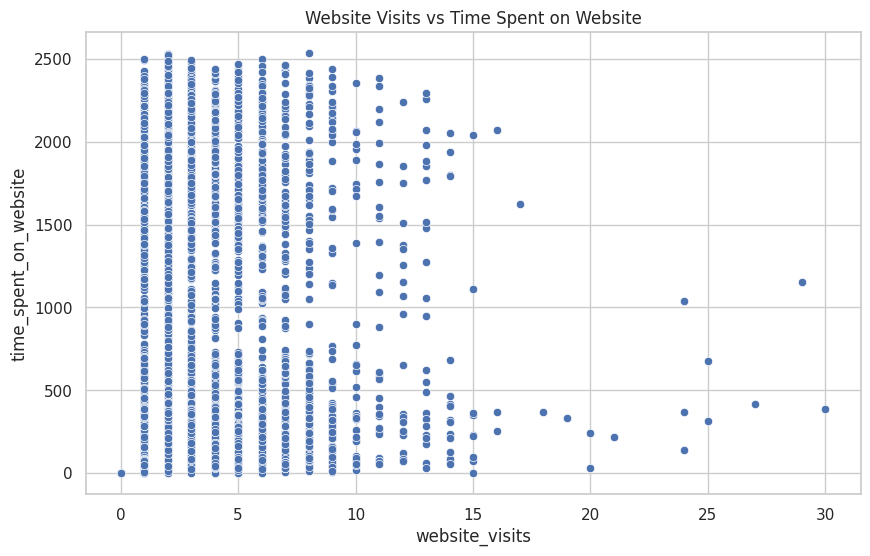

In [ ]:
# Generate the scatter plot for 'website_visits' vs 'time_spent_on_website'
plot_scatter('website_visits', 'time_spent_on_website', data, title='Website Visits vs Time Spent on Website')

**Observations**:

- **Website visits** and **time spent on the website** have a **weak positive correlation** (0.06).

- The scatter plot shows a slight upward trend, suggesting that users who visit the website more frequently tend to spend more time overall, but the relationship is not strong.

- Most users fall within a moderate range of time spent on the website, regardless of how many visits they make.

### Feature: **Website Visits vs Page Views per Visit**

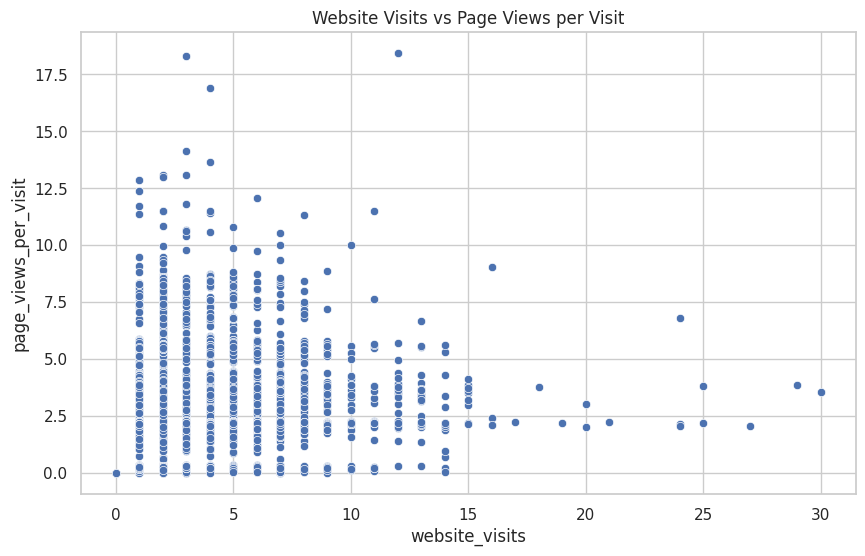

In [ ]:
# Generate the scatter plot for 'website_visits' vs 'page_views_per_visit'
plot_scatter('website_visits', 'page_views_per_visit', data, title='Website Visits vs Page Views per Visit')

**Observations**:

- **Website visits** and **page views per visit** show a **weak positive correlation** (0.07).

- The scatter plot indicates that users who visit the website more frequently tend to view slightly more pages per visit, but the relationship is minimal.

- Most users exhibit a stable range of page views per visit, regardless of how often they visit the website. There are a few outliers with much higher page views per visit.

### Feature: **Website Visits vs Status**

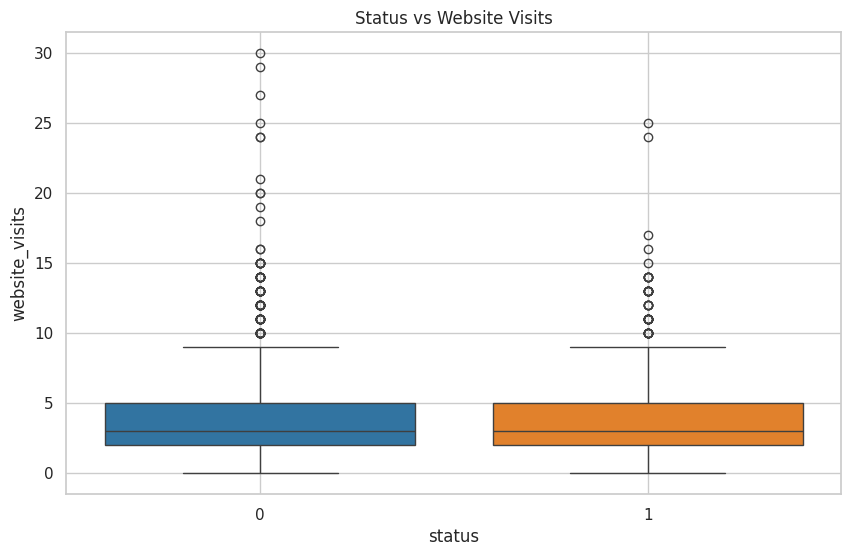

In [ ]:
# Generate the box plot for 'status' vs 'website_visits'
plot_boxplot('status', 'website_visits', data, title='Status vs Website Visits')

**Observations**:

- **Website visits** and **status** have a **negligible correlation** (-0.006), indicating no meaningful relationship between the number of website visits and status.

- The boxplot shows that the median number of **website visits** is almost the same for both **status 0** and **status 1**.

- The distribution of website visits is similar between the two groups, with no significant difference in variability or spread.

### Feature: **Time Spent on Website vs Page Views per Visit**

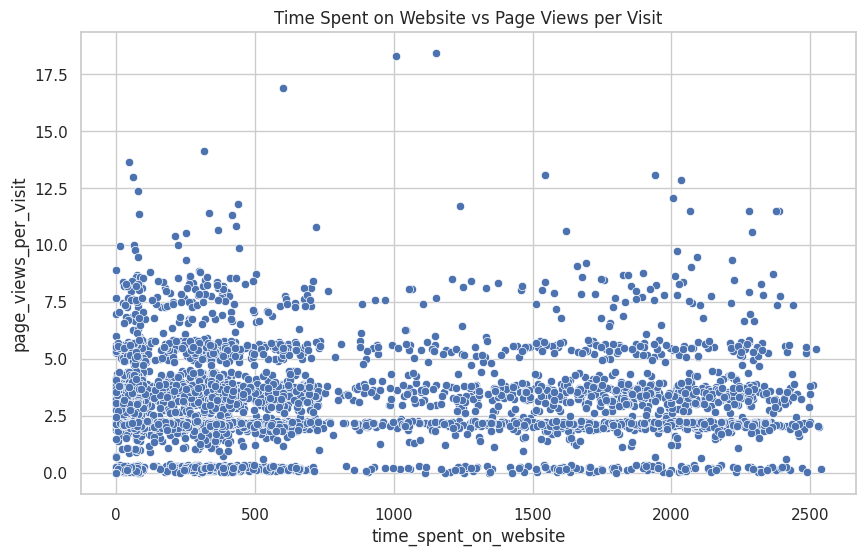

In [ ]:
# Generate the scatter plot for 'time_spent_on_website' vs 'page_views_per_visit'
plot_scatter('time_spent_on_website', 'page_views_per_visit', data, title='Time Spent on Website vs Page Views per Visit')

**Observations**:

- **Time spent on the website** and **page views per visit** have a **weak positive correlation** (0.07), indicating a slight relationship between the time spent and the number of pages viewed per visit.

- The scatter plot shows that users who spend more time on the website tend to view slightly more pages per visit, but the relationship is not strong.

- Most users fall within a moderate range of page views, regardless of how long they spend on the website. Some outliers show much higher or lower page views compared to the time spent.

### Feature: **Time Spent on Website vs Status**

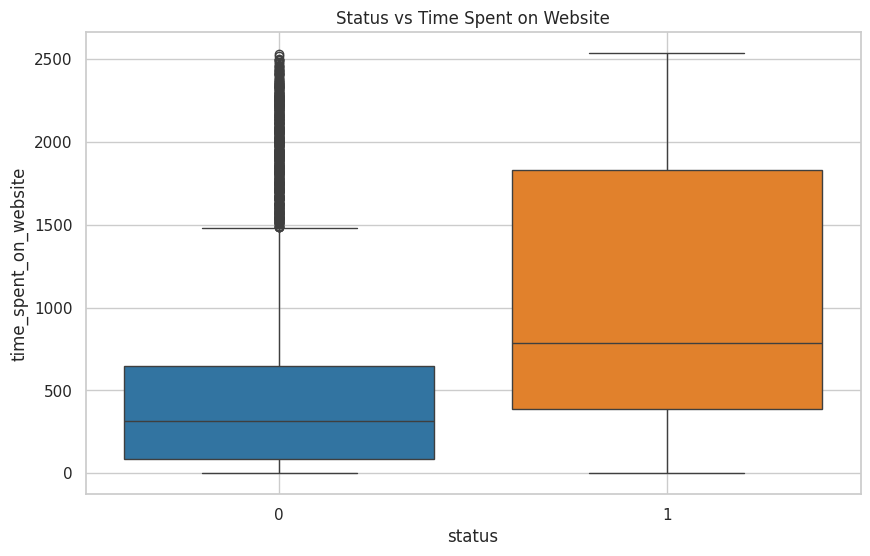

In [ ]:
# Generate the box plot for 'status' vs 'time_spent_on_website'
plot_boxplot('status', 'time_spent_on_website', data, title='Status vs Time Spent on Website')

**Observations**:

- **Time spent on the website** and **status** show a **moderate positive correlation** (0.30), indicating that users who spend more time on the website are more likely to have a status of 1.

- The boxplot shows that the median time spent on the website is higher for users with **status 1** compared to **status 0**.

- The spread of time spent on the website is broader for **status 1** users, suggesting a more varied range of activity for those with status 1.

### Feature: **Page Views per Visit vs Status**

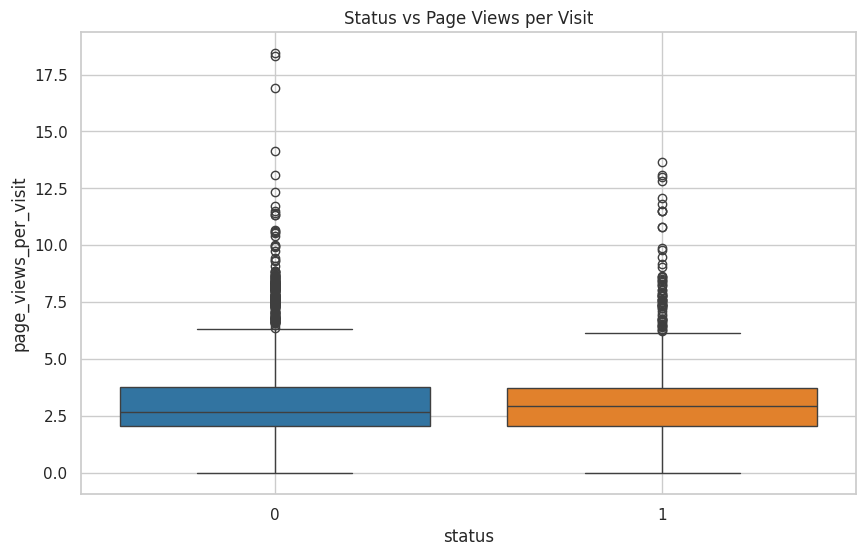

In [ ]:
# Generate the box plot for 'status' vs 'page_views_per_visit'
plot_boxplot('status', 'page_views_per_visit', data, title='Status vs Page Views per Visit')

**Observations**:

- **Page views per visit** and **status** have a **negligible correlation** (0.0003), indicating no meaningful relationship between these variables.

- The boxplot shows that the median number of **page views per visit** is nearly identical for both **status 0** and **status 1** users.

- The variability and distribution of page views per visit are similar across both status groups, with no significant difference in behavior between the two.

## **Multivariate Analysis**

### Features: **status vs. (age, current_occupation)**

Lets get an idea of the age ranges of each Occupation type

In [ ]:
# Grouping by current_occupation and getting the min and max age for each occupation
age_ranges = dataset.groupby('current_occupation')['age'].agg(['min', 'max'])

# Displaying the results
age_ranges

min  max
current_occupation          
Professional         25   60
Student              18   25
Unemployed           32   63

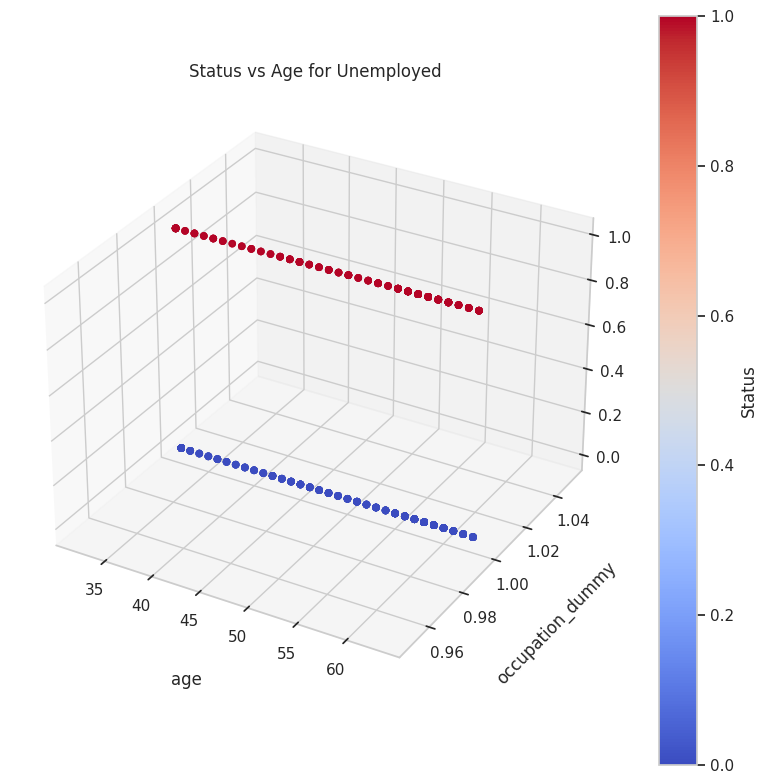

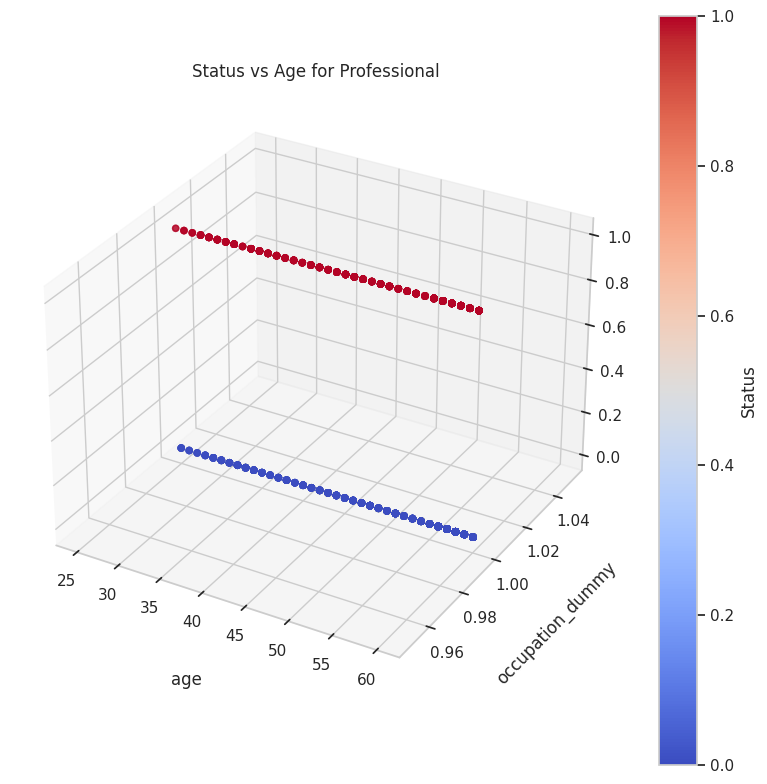

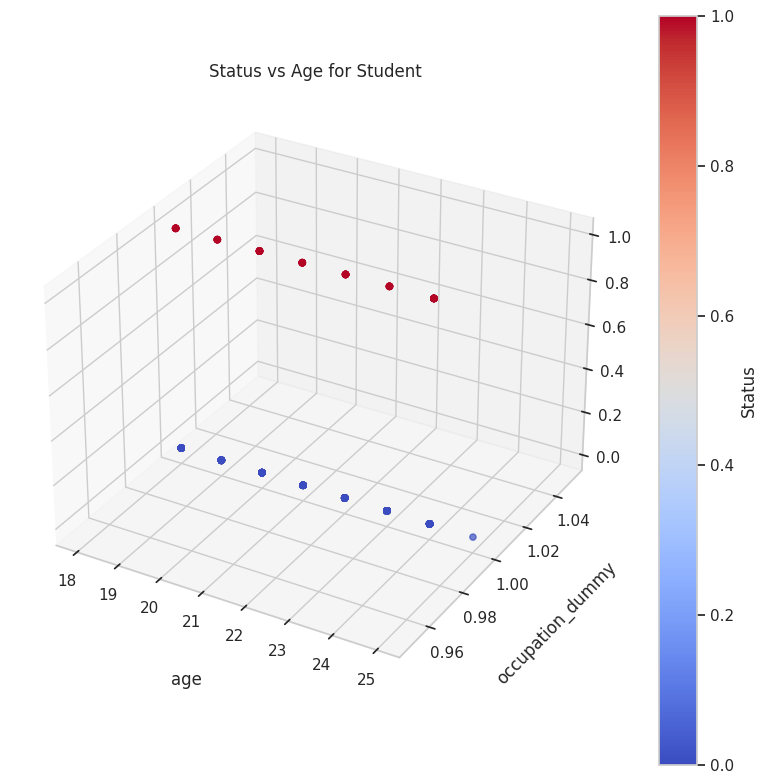

In [ ]:
# Get unique values for current occupation
occupations = data['current_occupation'].unique()

# Create separate plots for each occupation
for occupation in occupations:
    subset = data[data['current_occupation'] == occupation]
    # Use a dummy y-value for visualization purposes
    subset['occupation_dummy'] = 1

    plot_3d_scatter_with_color(
        x_column='age',
        y_column='occupation_dummy',  # Use dummy y-value
        z_column='status',
        color_column='status',
        data=subset,
        title=f'Status vs Age for {occupation}',
        figsize=(8, 8)
    )


**These are not very interpretable so let us employ a different approach.**

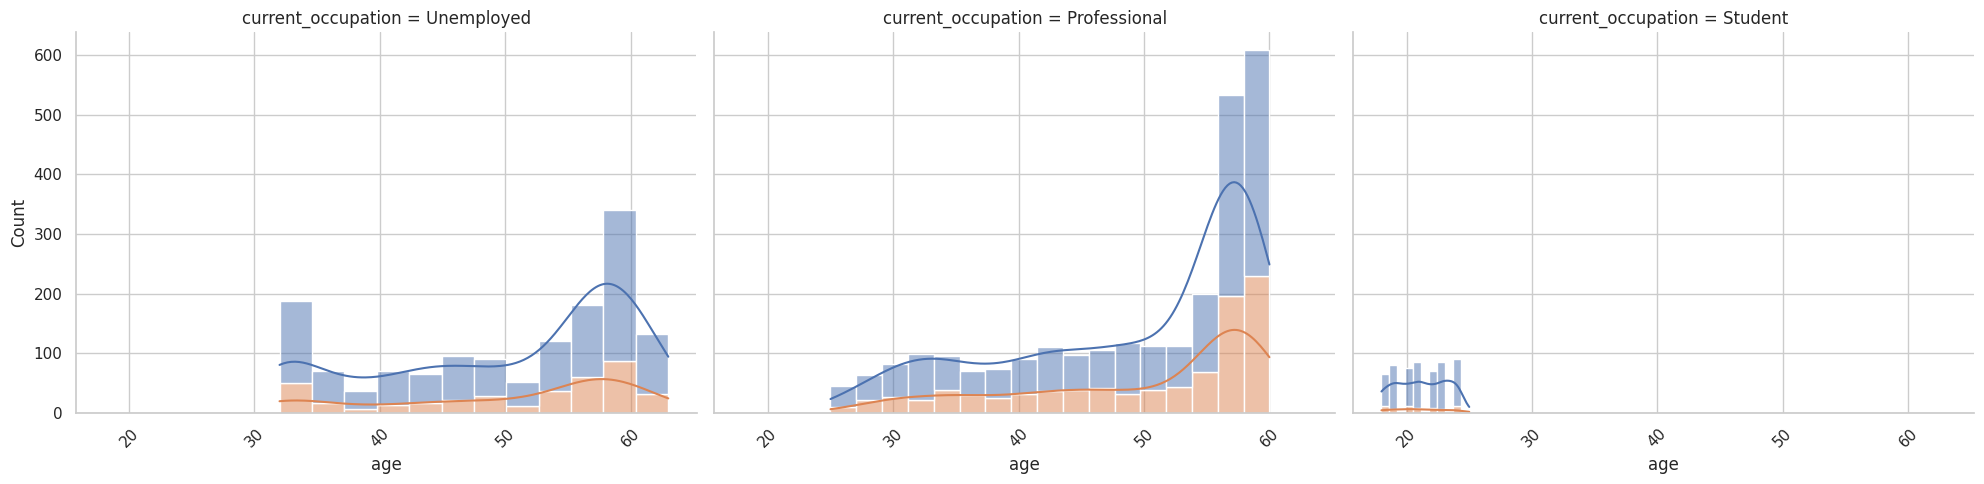

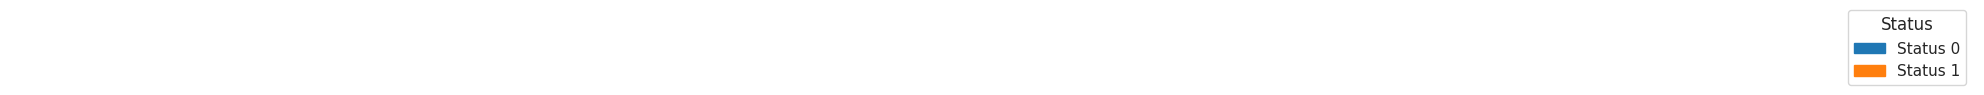

In [ ]:
# Set the background to be lighter
sns.set_style("whitegrid")  # Light background with gridlines

# Increase aspect ratio for wider plots in the FacetGrid
g = sns.FacetGrid(data, col="current_occupation", height=5, aspect=3)  # Aspect 3 to make the plots wider

# Add histplot with KDE line for proper visualization of age vs status
g.map(sns.histplot, "age", hue="status", data=data, kde=True, multiple="stack")

# Rotate the x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Create patches for the legend manually
legend_labels = ['Status 0', 'Status 1']
legend_colors = ['#1f77b4', '#ff7f0e']  # Blue for Status 0, Orange for Status 1
handles = [mpatches.Patch(color=color, label=label) for label, color in zip(legend_labels, legend_colors)]

# Create the main figure with subplots: one for the graph, one for the legend
# Adjust the figure size to fit the desired dimensions
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [5, 0.5]}, figsize=(20, 6))  # Increased width to 20, decreased height

# Place the graph in the first subplot
g.fig.set_figwidth(20)  # Set to 20 units wide to match the size
g.fig.set_figheight(5)
g.fig.tight_layout()
ax1.remove()  # Use the existing FacetGrid plot in the top part

# Place the legend in the second subplot, right-justified
ax2.legend(handles=handles, loc='center right', title="Status")
ax2.axis('off')  # Remove axes from the legend part

# Adjust the layout to make everything fit well
plt.tight_layout()
plt.show()

**Observations**:

- **Unemployed Group**:
   - **Status 0 (Orange)**: There is a noticeable spread of **status 0** users across multiple age groups, from the mid-30s to early 60s, with relatively low counts of status 0 individuals at older ages.
   - **Status 1 (Blue)**: A significant portion of **status 1** users are clustered in the 55 to 65 age range. The **status 1** group dominates this older age segment, suggesting that among the unemployed, older individuals are more likely to achieve status 1.
   - **KDE Trend**: The density curve shows a clear peak around the 60s for **status 1**, while **status 0** is spread more evenly across younger age groups.

- **Professional Group**:
   - **Status 0 (Orange)**: The **status 0** group in this occupation is concentrated in the **middle-aged group (30 to 40)**, with a gradual decrease in counts as age increases.
   - **Status 1 (Blue)**: There’s a sharp increase in **status 1** individuals as age progresses, with a significant spike among those aged **55 to 65**.
   - **KDE Trend**: The KDE curve for **status 1** rises steeply as age increases, indicating that **older professionals** tend to achieve status 1 more frequently than younger professionals.
   
- **Student Group**:
   - **Status 0 (Orange)**: The **student category** shows an almost exclusive dominance of **status 0** individuals. The students are mostly aged **18 to 24**, with a slight overlap into the older age group for status 1.
   - **Status 1 (Blue)**: There are very few **status 1** individuals among students, suggesting that achieving status 1 is quite rare for this group.
   - **KDE Trend**: The KDE for **status 0** is higher than for **status 1**, showing that students are predominantly not achieving status 1.

**Key Insights**:

- **Older Individuals (55+ years)**:
   - For both **Unemployed** and **Professional** groups, **status 1** is predominantly achieved by older individuals. This suggests that age may be positively correlated with achieving status 1 in these categories.
   
- **Middle-Aged Professionals (30–40)**:
   - Middle-aged professionals (around 30–40 years old) are more likely to be **status 0**, suggesting that younger professionals are less likely to achieve status 1 compared to their older counterparts.

- **Students**:
   - **Status 0** is the overwhelming majority for the **student group**, indicating that students (likely due to their younger age) are less likely to achieve status 1.

- **Age-Related Patterns**:
   - For both the **unemployed** and **professional** groups, there is a clear **age-related pattern** where **older individuals** (especially 55+) are more likely to achieve **status 1**, while **younger individuals** are more likely to remain at **status 0**.
   
**Potential Hypotheses**:

- **Career Maturity**: The tendency for older individuals, especially in the **Professional** and **Unemployed** groups, to achieve **status 1** could be due to career maturity, accumulated experience, or longer-term engagement with the platform or criteria for achieving status 1.
- **Barriers for Students**: The low percentage of **status 1** among **students** could suggest barriers such as lack of work experience or other factors hindering their ability to achieve **status 1**.

These insights **suggest a strong age-related trend across** different **occupations** that affects the likelihood of achieving **status 1**.

### Features: **status vs. (age, current_occupation, first_interaction)**

In [ ]:
# get unique values
data['first_interaction'].unique()

array(['Website', 'Mobile App'], dtype=object)

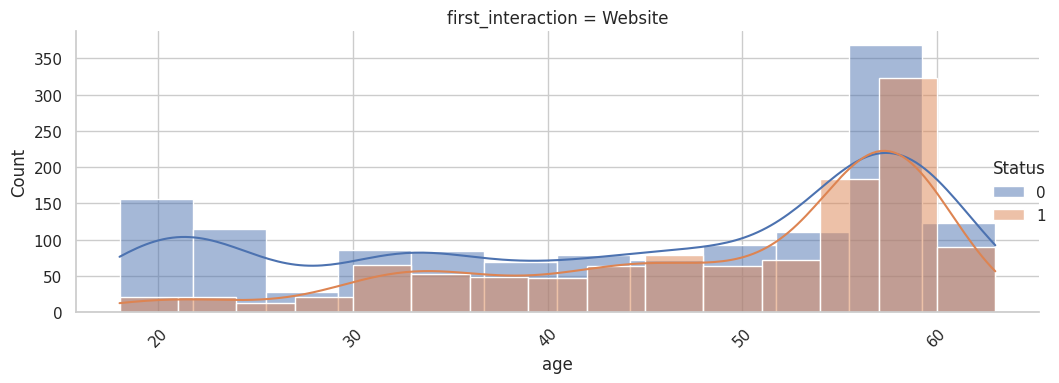

In [ ]:
# Filter the data to include only rows where first_interaction is 'Website'
website_data = data[data['first_interaction'] == 'Website']

# Set the background to be lighter
sns.set_style("whitegrid")  # Light background with gridlines

# Create a FacetGrid with current_occupation as columns and hue by status
g = sns.FacetGrid(website_data, col="first_interaction", hue="status", height=4, aspect=2.5)  # Aspect 2.5 to make plots wider

# Add histplot with KDE line for visualization of age vs status for 'Website' first interaction
g.map(sns.histplot, "age", kde=True, multiple="stack")

# Rotate the x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Add a legend for status
g.add_legend(title="Status")

# Adjust the layout for better readability
plt.tight_layout()
plt.show()





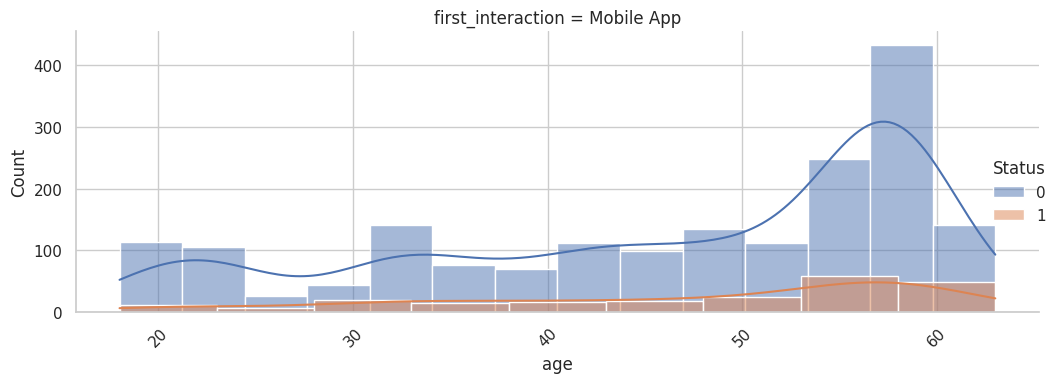

In [ ]:
# Filter the data to include only rows where first_interaction is 'Website'
website_data = data[data['first_interaction'] == 'Mobile App']

# Set the background to be lighter
sns.set_style("whitegrid")  # Light background with gridlines

# Create a FacetGrid with current_occupation as columns and hue by status
g = sns.FacetGrid(website_data, col="first_interaction", hue="status", height=4, aspect=2.5)  # Aspect 2.5 to make plots wider

# Add histplot with KDE line for visualization of age vs status for 'Website' first interaction
g.map(sns.histplot, "age", kde=True, multiple="stack")

# Rotate the x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Add a legend for status
g.add_legend(title="Status")

# Adjust the layout for better readability
plt.tight_layout()
plt.show()

In [ ]:
# create subplots for each plot


### Features: **status vs. (profile_completed, last_activity, referral)**

### Features: **status vs. (first_interaction, profile_completed, website_visits)**

### Features: **status vs. (time_spent_on_website, page_views_per_visit, last_activity)**

### Features: **status vs. (print_media_type1, print_media_type2, digital_media, educational_channels, referral)**

### Features: **status vs. (website_visits, time_spent_on_website, page_views_per_visit)**

### Features: **status vs. (current_occupation, first_interaction, last_activity)**


### Features: **status vs. (age, website_visits, time_spent_on_website, page_views_per_visit)**


### Features: **status vs. (current_occupation, profile_completed, digital_media, educational_channels)**

### Features: **Age, Website Visits, Time spent on Website**

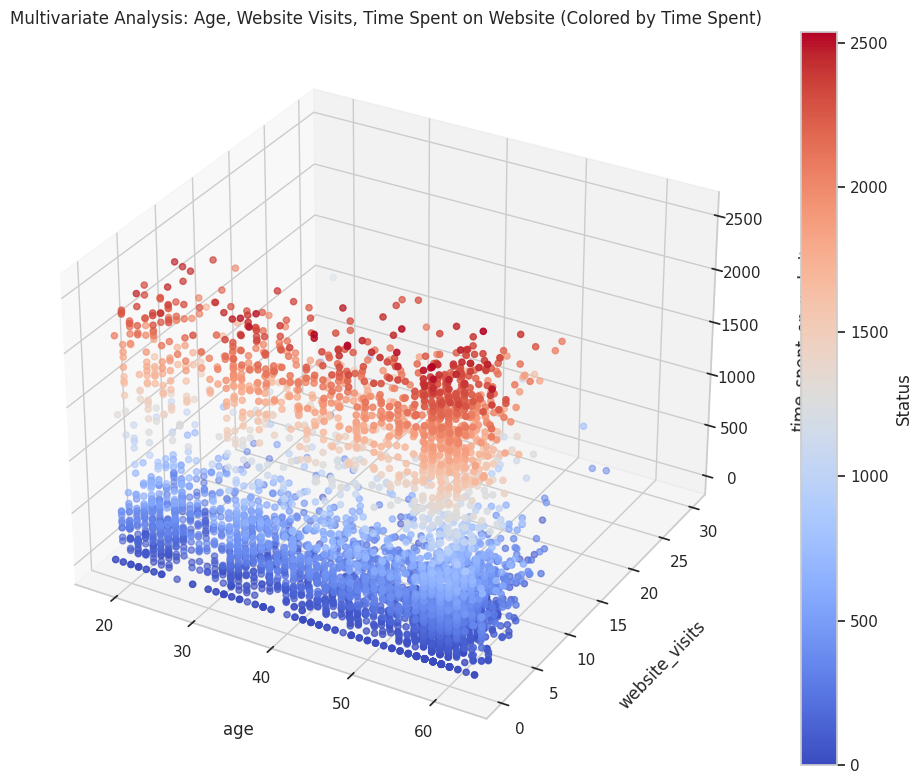

In [ ]:
# Generate the 3D scatter plot with color for 'age', 'website_visits', and 'time_spent_on_website'
plot_3d_scatter_with_color(
    x_column='age',
    y_column='website_visits',
    z_column='time_spent_on_website',
    color_column='time_spent_on_website',
    data=dataset,
    title='Multivariate Analysis: Age, Website Visits, Time Spent on Website (Colored by Time Spent)'
)

**Observations**:

- The 3D scatter plot shows that **age** has a **moderate positive correlation** with **time spent on the website** (0.30), meaning that older users tend to spend more time on the website.

- The color gradient in the plot highlights that users who spend more time on the website are scattered across different **website visit** frequencies.

- **Website visits** do not show a meaningful correlation with **age** or **time spent on the website**, confirming that frequent visits do not necessarily mean longer time spent on the site.

### Features: **Age, Website Visits, Page Views per Visit**

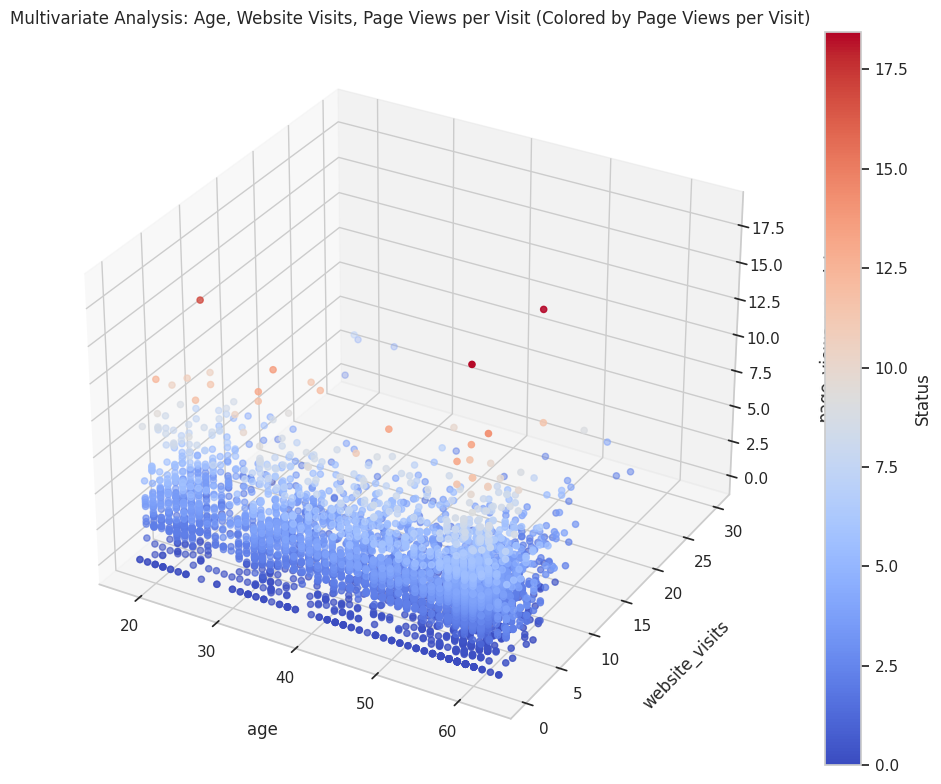

In [ ]:
# Generate the 3D scatter plot with color for 'age', 'website_visits', and 'page_views_per_visit'
plot_3d_scatter_with_color(
    x_column='age',
    y_column='website_visits',
    z_column='page_views_per_visit',
    color_column='page_views_per_visit',
    data=dataset,
    title='Multivariate Analysis: Age, Website Visits, Page Views per Visit (Colored by Page Views per Visit)'
)

**Observations**:

- The 3D scatter plot shows no strong relationship among **age**, **website visits**, and **page views per visit**. The correlations between these variables are weak.

- **Age** and **page views per visit** have a weak negative correlation (-0.04), confirming no meaningful relationship.

- **Website visits** show a weak positive correlation with **page views per visit** (0.07), but this relationship is minimal. The color gradient reflects slight variations in page views per visit, scattered across different website visit frequencies.

### Features: **Age, Website Visits, Status**

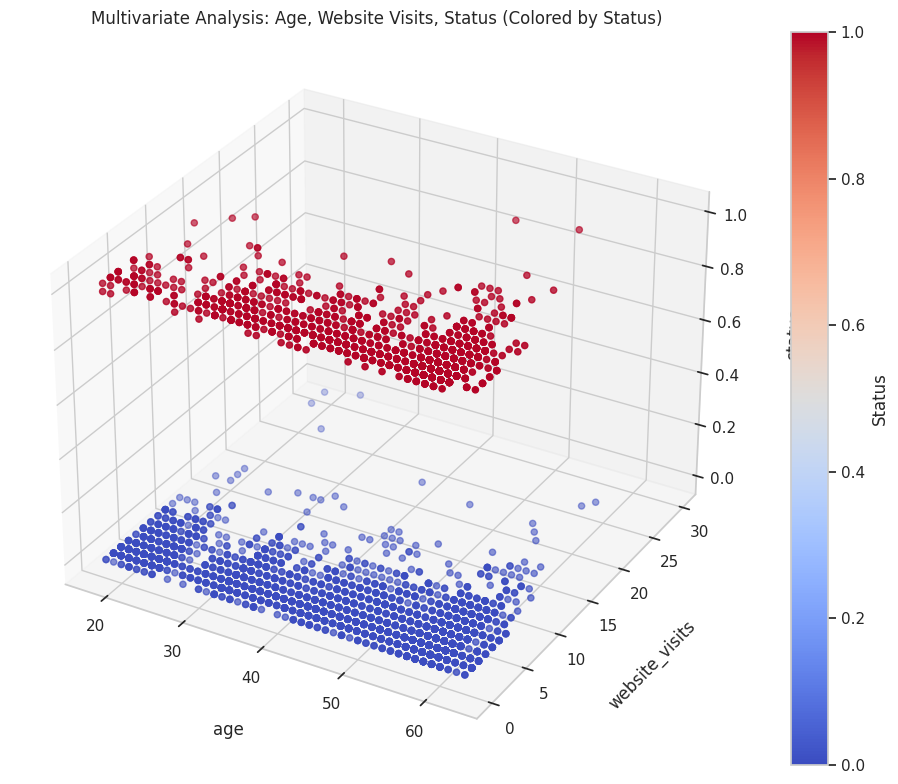

In [ ]:
# Generate the 3D scatter plot with color for 'age', 'website_visits', and 'status'
plot_3d_scatter_with_color(
    x_column='age',
    y_column='website_visits',
    z_column='status',
    color_column='status',
    data=dataset,
    title='Multivariate Analysis: Age, Website Visits, Status (Colored by Status)'
)

**Observations**:

- **Age** and **status** have a **weak positive correlation** (0.12), suggesting that older individuals are slightly more likely to have a status of 1.

- **Website visits** and **status** show a **negligible correlation** (-0.006), confirming that the frequency of website visits does not significantly affect a user's status.

- The plot shows no clear clustering or trends, indicating that neither age nor website visits is a strong predictor of status. Both **status 0** and **status 1** are spread evenly across the age and website visit ranges.

### Features: **Age, Time Spent on Website, Page Views per Visit**

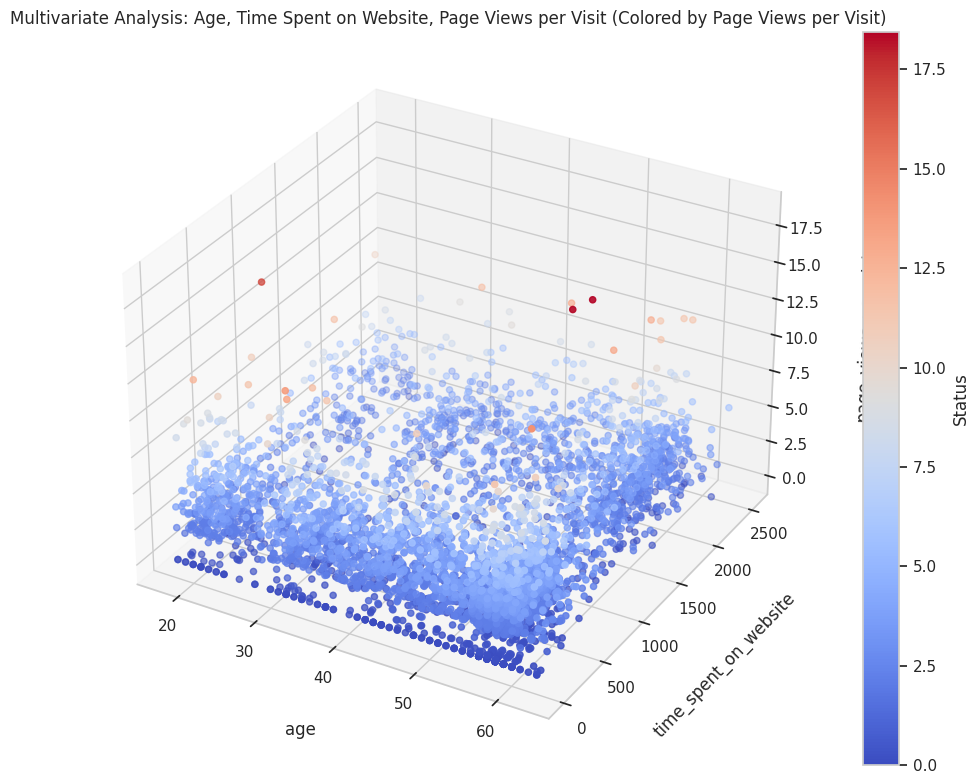

In [ ]:
# Generate the 3D scatter plot with color for 'age', 'time_spent_on_website', and 'page_views_per_visit'
plot_3d_scatter_with_color(
    x_column='age',
    y_column='time_spent_on_website',
    z_column='page_views_per_visit',
    color_column='page_views_per_visit',
    data=dataset,
    title='Multivariate Analysis: Age, Time Spent on Website, Page Views per Visit (Colored by Page Views per Visit)'
)

**Observations**:

- **Age** and **time spent on the website** show a **moderate positive correlation** (0.30), indicating that older users tend to spend more time on the website.

- **Age** and **page views per visit** have a **weak negative correlation** (-0.04), indicating no meaningful relationship.

- **Time spent on the website** and **page views per visit** have a **weak positive correlation** (0.07), suggesting a slight tendency for users who spend more time on the website to view more pages per visit, but the relationship is minimal.

### Features: **Age, Time Spent on Website, Status**

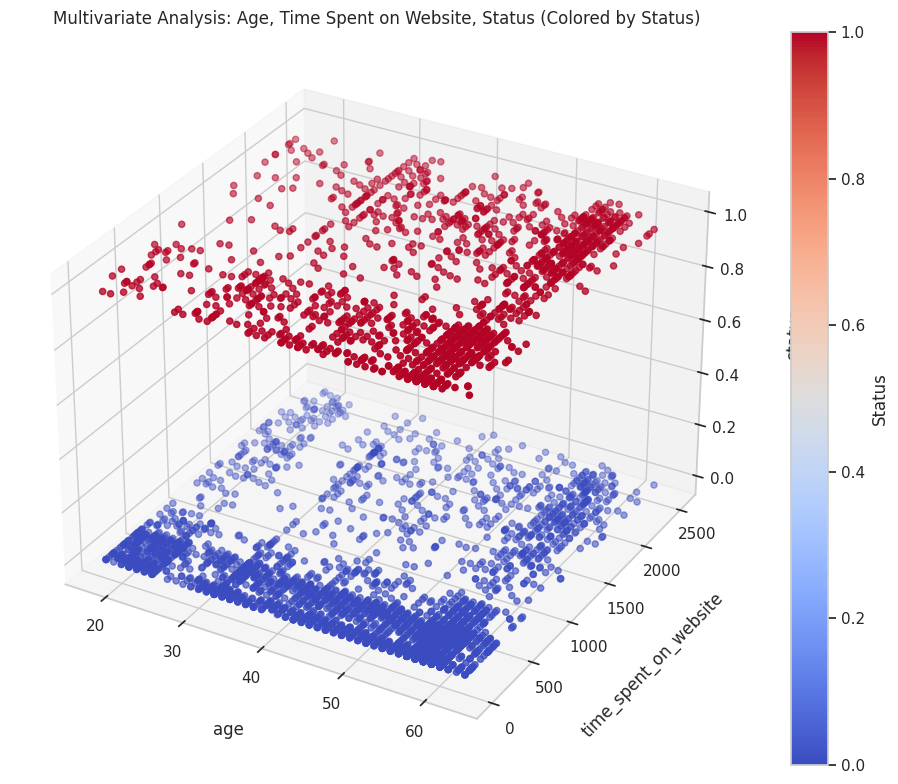

In [ ]:
# Generate the 3D scatter plot with color for 'age', 'time_spent_on_website', and 'status'
plot_3d_scatter_with_color(
    x_column='age',
    y_column='time_spent_on_website',
    z_column='status',
    color_column='status',
    data=dataset,
    title='Multivariate Analysis: Age, Time Spent on Website, Status (Colored by Status)'
)

**Observations**:

- **Age** and **status** have a **weak positive correlation** (0.12), indicating that older users are slightly more likely to have a status of 1.

- **Time spent on the website** and **status** have a **moderate positive correlation** (0.30), suggesting that users who spend more time on the website are more likely to have a status of 1.

- The plot shows that users with **status 1** tend to have spent more time on the website compared to **status 0**, with age also contributing slightly to the likelihood of status 1.

### Features: **Age, Page Views per Visit, Status**

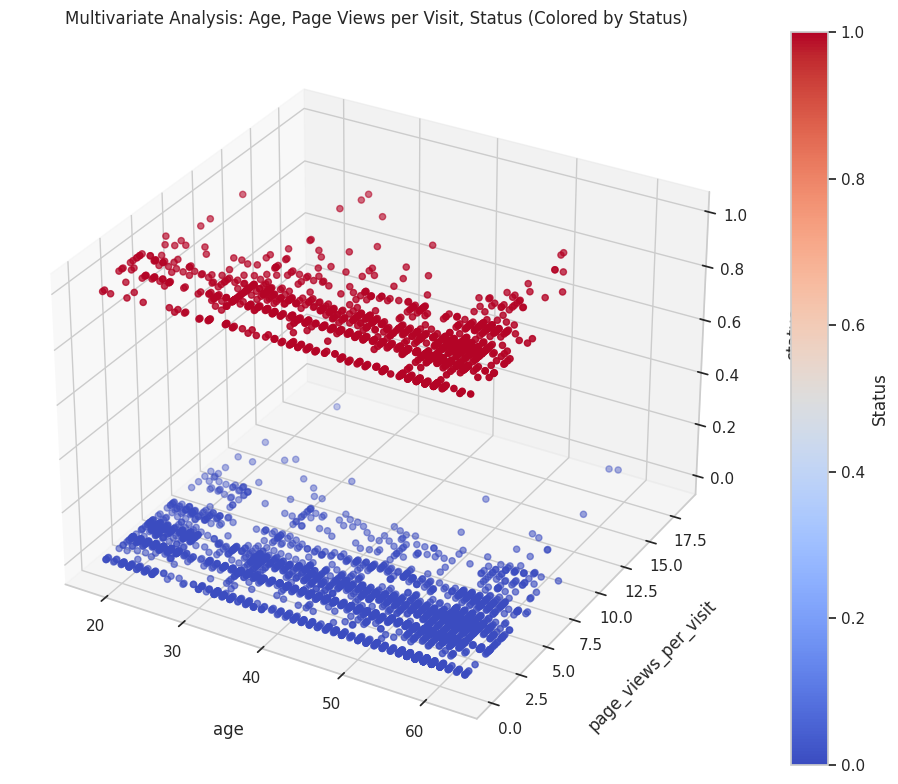

In [ ]:
# Generate the 3D scatter plot with color for 'age', 'page_views_per_visit', and 'status'
plot_3d_scatter_with_color(
    x_column='age',
    y_column='page_views_per_visit',
    z_column='status',
    color_column='status',
    data=dataset,
    title='Multivariate Analysis: Age, Page Views per Visit, Status (Colored by Status)'
)

**Observations**:

- **Age** and **status** show a **weak positive correlation** (0.12), indicating that older individuals are slightly more likely to have a status of 1.

- **Page views per visit** and **status** have a **negligible correlation** (0.0003), suggesting no meaningful relationship between the number of page views per visit and the status.

- The plot confirms that neither **age** nor **page views per visit** is a strong predictor of **status**, with users in both status groups having similar page viewing behavior across different age ranges.

### Features: **Website Visits, Time Spent on Website, Page Views per Visit**

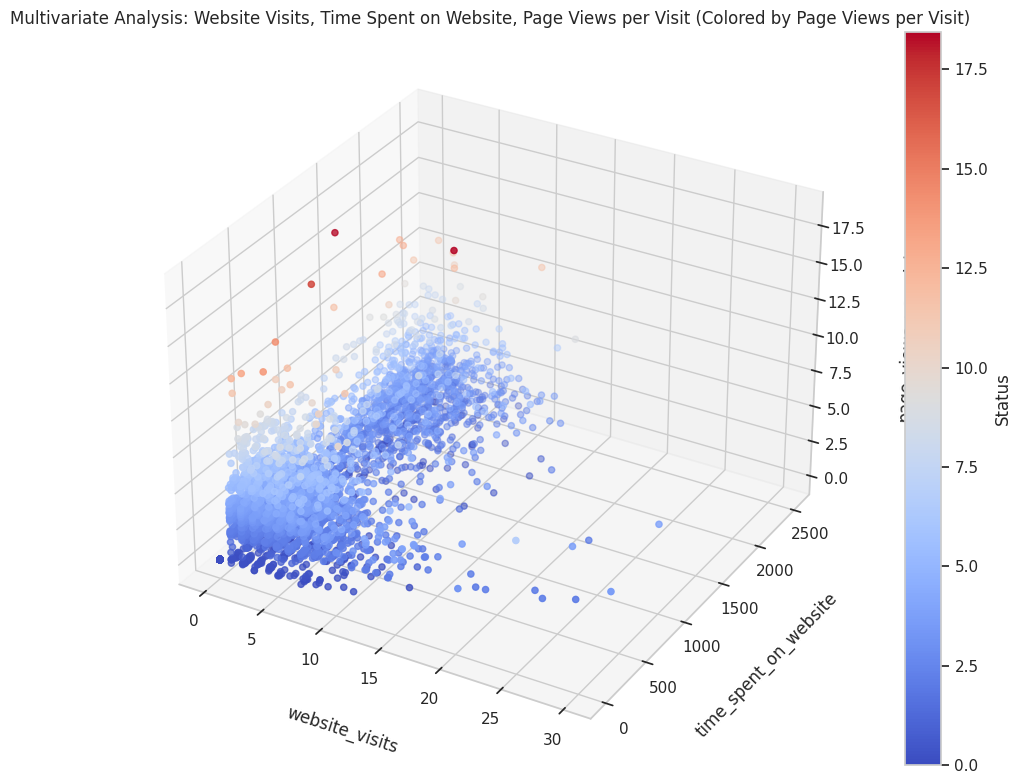

In [ ]:
# Generate the 3D scatter plot with color for 'website_visits', 'time_spent_on_website', and 'page_views_per_visit'
plot_3d_scatter_with_color(
    x_column='website_visits',
    y_column='time_spent_on_website',
    z_column='page_views_per_visit',
    color_column='page_views_per_visit',
    data=dataset,
    title='Multivariate Analysis: Website Visits, Time Spent on Website, Page Views per Visit (Colored by Page Views per Visit)'
)

**Observations**:

- **Website visits** and **page views per visit** show a **weak positive correlation** (0.07), suggesting a slight relationship between the number of visits and the average pages viewed, though the effect is minimal.

- **Time spent on the website** and **page views per visit** have a **weak positive correlation** (0.07), indicating that users who spend more time on the website tend to view slightly more pages per visit.

- **Website visits** and **time spent on the website** have a **weak correlation** (0.06), meaning users who visit more frequently do not necessarily spend much more time overall. The color gradient reveals some outliers with significantly higher page views per visit.

### Features: **Website Visits, Time Spent on Website, Status**

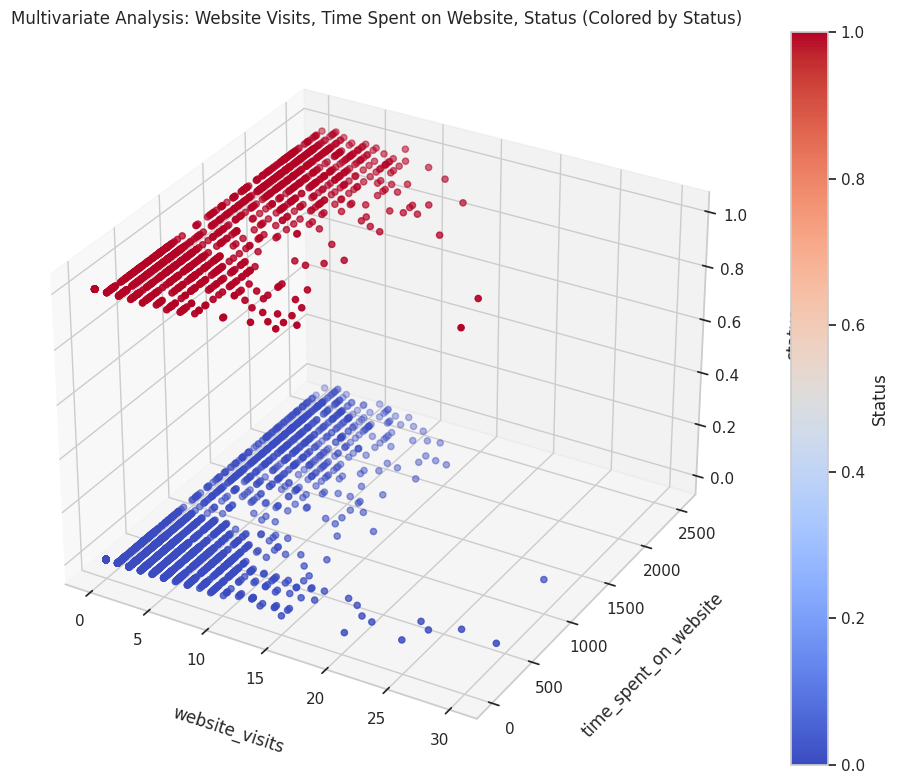

In [ ]:
# Generate the 3D scatter plot with color for 'website_visits', 'time_spent_on_website', and 'status'
plot_3d_scatter_with_color(
    x_column='website_visits',
    y_column='time_spent_on_website',
    z_column='status',
    color_column='status',
    data=dataset,
    title='Multivariate Analysis: Website Visits, Time Spent on Website, Status (Colored by Status)'
)

**Observations**:

- **Website visits** and **status** have a **negligible correlation** (-0.006), indicating no meaningful relationship between the number of visits and a user's status.

- **Time spent on the website** and **status** have a **moderate positive correlation** (0.30), meaning users who spend more time on the website are more likely to have a status of 1.

- The plot confirms that **time spent on the website** is a more significant predictor of **status** compared to **website visits**, as status 1 users tend to spend more time on the website, regardless of the number of visits.

### Features: **Website Visits, Page Views per Visit, Status**

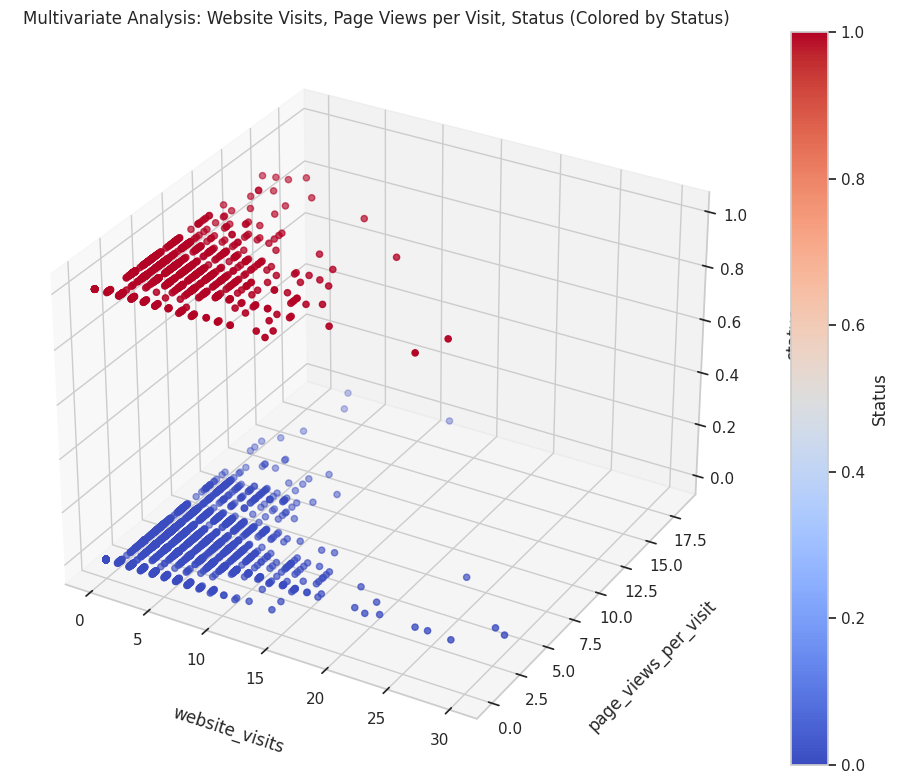

In [ ]:
# Generate the 3D scatter plot with color for 'website_visits', 'page_views_per_visit', and 'status'
plot_3d_scatter_with_color(
    x_column='website_visits',
    y_column='page_views_per_visit',
    z_column='status',
    color_column='status',
    data=dataset,
    title='Multivariate Analysis: Website Visits, Page Views per Visit, Status (Colored by Status)'
)

**Observations**:

- **Website visits** and **status** have a **negligible correlation** (-0.006), indicating no significant relationship between the number of website visits and the user's status.

- **Page views per visit** and **status** have a **negligible correlation** (0.0003), showing no meaningful relationship between how many pages are viewed per visit and the user's status.

- The plot confirms that neither **website visits** nor **page views per visit** is a strong predictor of **status**, as both **status 0** and **status 1** users have similar behaviors across these variables.

### Features: **Time Spent on Website, Page Views per Visit, Status**

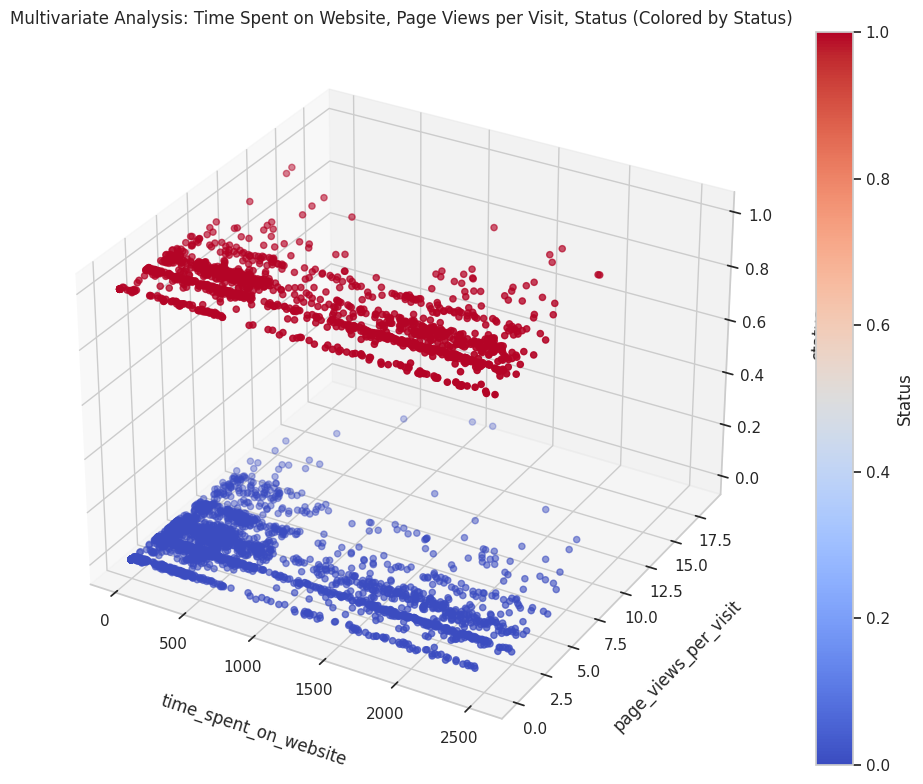

In [ ]:
# Generate the 3D scatter plot with color for 'time_spent_on_website', 'page_views_per_visit', and 'status'
plot_3d_scatter_with_color(
    x_column='time_spent_on_website',
    y_column='page_views_per_visit',
    z_column='status',
    color_column='status',
    data=dataset,
    title='Multivariate Analysis: Time Spent on Website, Page Views per Visit, Status (Colored by Status)'
)

**Observations**:

- **Time spent on the website** and **status** have a **moderate positive correlation** (0.30), indicating that users who spend more time on the website are more likely to have a status of 1.

- **Page views per visit** and **status** have a **negligible correlation** (0.0003), showing no meaningful relationship between the number of page views per visit and the user's status.

- The plot confirms that **time spent on the website** is a stronger predictor of **status** compared to **page views per visit**, as status 1 users tend to spend more time on the website regardless of the number of pages viewed.

### Features: **Age, Website Visits, Time Spent on Website, Page Views per Visit**

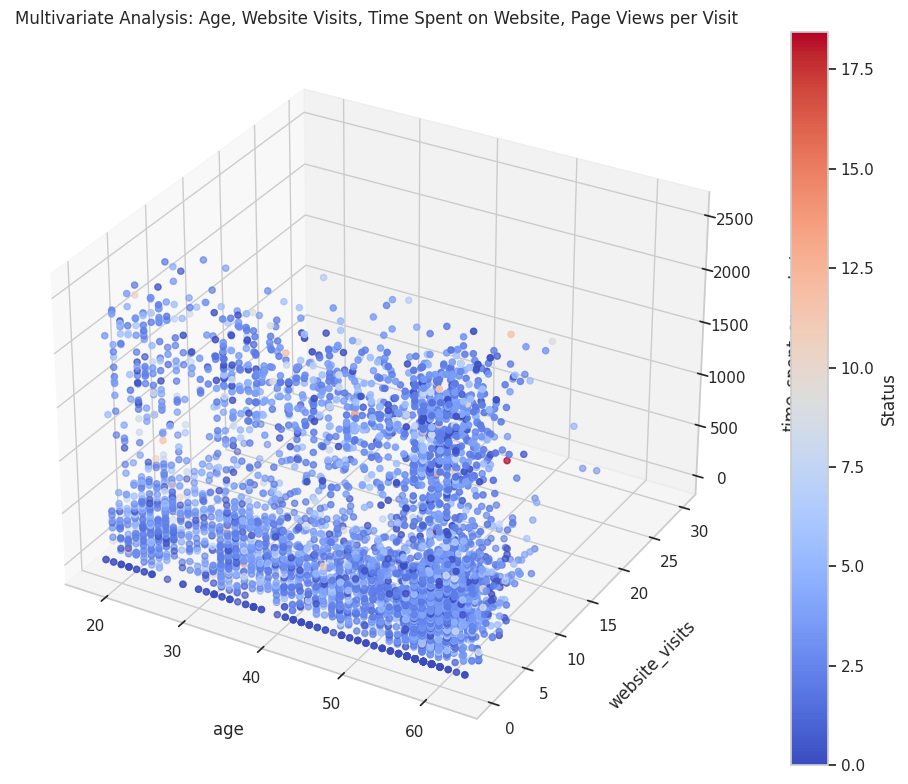

In [ ]:
# Generate the 3D scatter plot with color for 'age', 'website_visits', 'time_spent_on_website', and 'page_views_per_visit'
plot_3d_scatter_with_color(
    x_column='age',
    y_column='website_visits',
    z_column='time_spent_on_website',
    color_column='page_views_per_visit',
    data=dataset,
    title='Multivariate Analysis: Age, Website Visits, Time Spent on Website, Page Views per Visit'
)

**Observations**:

- **Age** has a **moderate positive correlation** with **time spent on the website** (0.30), indicating that older users tend to spend more time on the website.

- **Website visits** and **time spent on the website** show a **weak positive correlation** (0.06), suggesting that users who visit the website more frequently spend slightly more time overall.

- **Page views per visit** have weak correlations with both **age** and **website visits**, confirming that the number of pages viewed per visit does not significantly vary across age groups or visit frequency.

### Features: **Age, Website Visits, Page Views per Visit, Status**

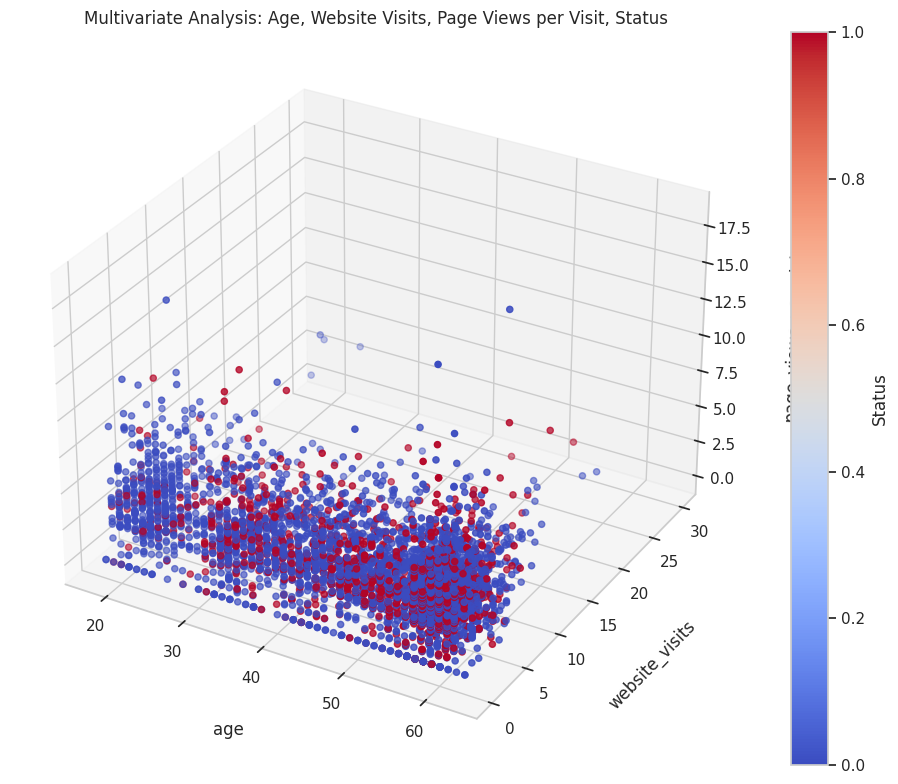

In [ ]:
# Generate the 3D scatter plot with color for 'age', 'website_visits', 'page_views_per_visit', and 'status'
plot_3d_scatter_with_color(
    x_column='age',
    y_column='website_visits',
    z_column='page_views_per_visit',
    color_column='status',
    data=dataset,
    title='Multivariate Analysis: Age, Website Visits, Page Views per Visit, Status'
)

**Observations**:

- **Age** and **status** show a **weak positive correlation** (0.12), meaning older individuals are slightly more likely to have a status of 1.

- **Website visits** and **status** have a **negligible correlation** (-0.006), indicating that visit frequency does not meaningfully affect a user's status.

- **Page views per visit** and **status** have a **negligible correlation** (0.0003), showing that the number of pages viewed per visit has no meaningful impact on the user's status.

### Features: **Age, Time Spent on Website, Page Views per Visit, Status**

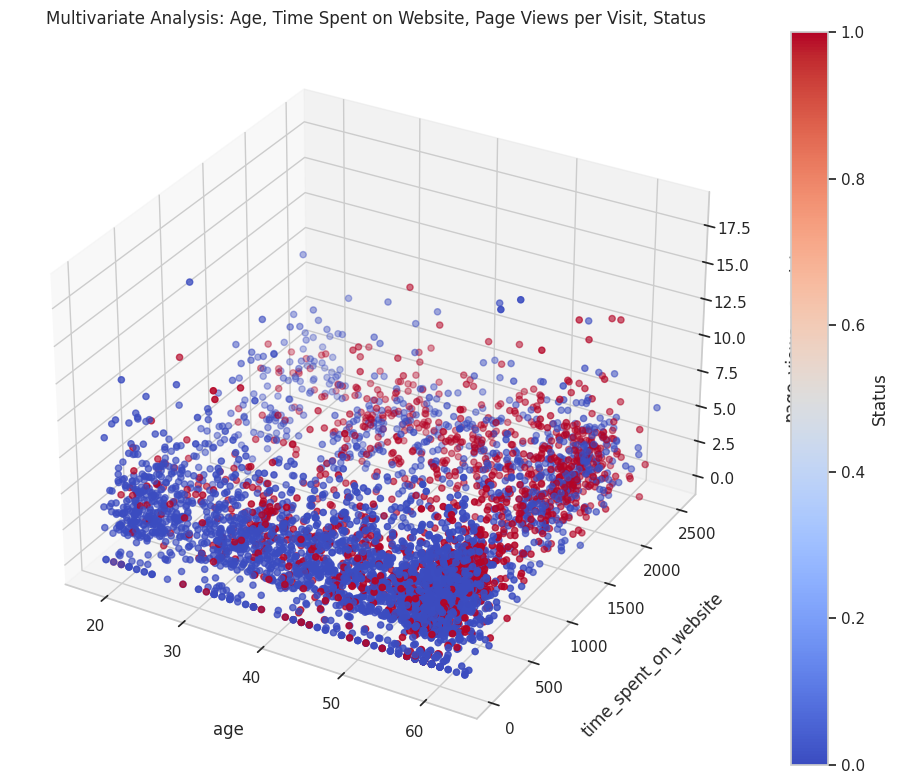

In [ ]:
# Generate the 3D scatter plot with color for 'age', 'time_spent_on_website', 'page_views_per_visit', and 'status'
plot_3d_scatter_with_color(
    x_column='age',
    y_column='time_spent_on_website',
    z_column='page_views_per_visit',
    color_column='status',
    data=dataset,
    title='Multivariate Analysis: Age, Time Spent on Website, Page Views per Visit, Status'
)

**Observations**:

- **Age** and **time spent on the website** have a **moderate positive correlation** (0.30), indicating that older users tend to spend more time on the website.

- **Page views per visit** and **status** have a **negligible correlation** (0.0003), confirming that the number of pages viewed per visit does not significantly affect a user's status.

- **Time spent on the website** and **status** have a **moderate positive correlation** (0.30), suggesting that users who spend more time on the website are more likely to have a status of 1.

### Features: **Website Visits, Time Spent on Website, Page Views per Visit, Status**

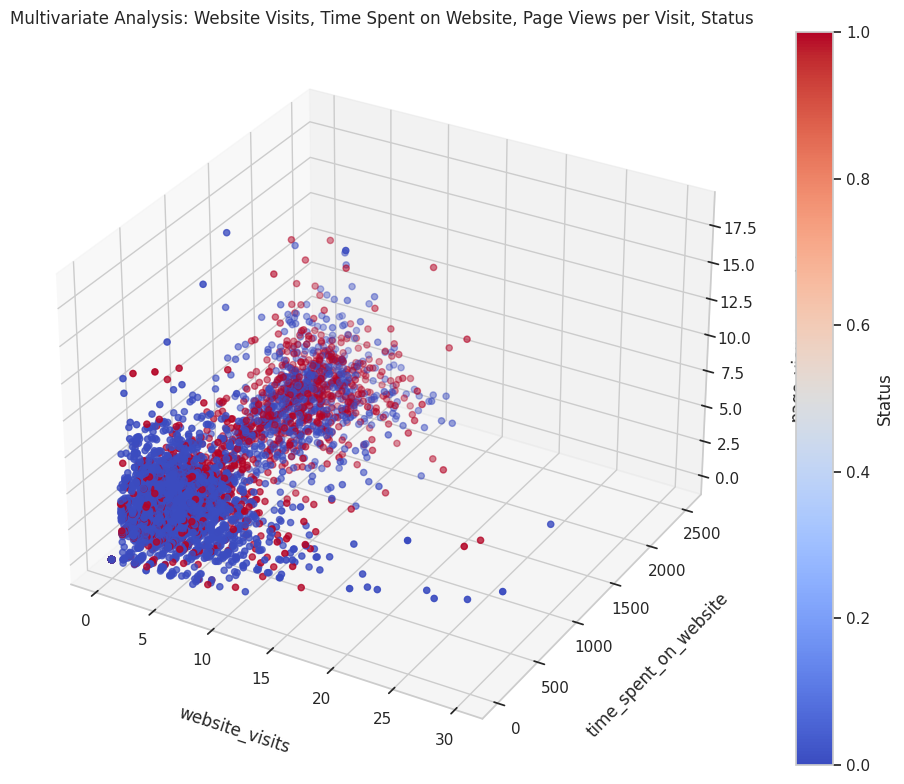

In [ ]:
# Generate the 3D scatter plot with color for 'website_visits', 'time_spent_on_website', 'page_views_per_visit', and 'status'
plot_3d_scatter_with_color(
    x_column='website_visits',
    y_column='time_spent_on_website',
    z_column='page_views_per_visit',
    color_column='status',
    data=dataset,
    title='Multivariate Analysis: Website Visits, Time Spent on Website, Page Views per Visit, Status'
)

**Observations**:

- **Website visits** and **status** have a **negligible correlation** (-0.006), showing no meaningful relationship between the number of website visits and a user's status.

- **Time spent on the website** and **status** show a **moderate positive correlation** (0.30), indicating that users who spend more time on the website are more likely to have a status of 1.

- **Page views per visit** and **status** have a **negligible correlation** (0.0003), confirming that the number of pages viewed per visit does not significantly impact the user's status.

In [ ]:
# Select numeric columns for analysis
numeric_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']
data_numeric = data[numeric_cols]

# Calculate VIF
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

vif_results = calculate_vif(data_numeric)
print("Variance Inflation Factors:")
print(vif_results)

Variance Inflation Factors:
                Variable       VIF
0                    age  3.942242
1         website_visits  2.425712
2  time_spent_on_website  1.906902
3   page_views_per_visit  2.956465


**Observations**:

- Multicollinearity does not appear to be a severe issue, as all VIF values are below 5.

### **Multicollinearity Checks**

In [ ]:
# Perform multicollinearity check

# Select the numerical columns for the multicollinearity check
numerical_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Extracting the relevant data
X = data[numerical_cols]

# Add a constant to the model (for intercept)
X['Intercept'] = 1

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the constant from the result
vif_data = vif_data[vif_data['Feature'] != 'Intercept']

# Display the VIF values
print(vif_data)



                 Feature       VIF
0                    age  1.002236
1         website_visits  1.008967
2  time_spent_on_website  1.008502
3   page_views_per_visit  1.011352


**Observations**:

- Multicollinearity is not an issue for numerical features as the values is less than 5.
- We will repeat this check after encoding categorical features in the  Feature Engineering section fo this document

# **Data Preprocessing**

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### **Missing Values Check**

In [ ]:
# Check dataset for missing values
data.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

**Observations**:

- There are no missing values.

### **Duplicated Data Check**




In [ ]:
# Check dataset for duplicated data
data.duplicated().sum()

0

**Observations**:

- There is no duplicated data.

## **Feature Engineering**

- We need to drop the index ID
- We need to perfrom one hot encoding on binary categorical features

In [ ]:
# Get the feature names before making any changes
feature_names = data.columns.tolist()
print(feature_names)

['ID', 'age', 'current_occupation', 'first_interaction', 'profile_completed', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'status']


### **Drop Index**

In [ ]:
# Drop the Index
data.drop('ID', axis=1, inplace=True)

In [ ]:
# Get the feature names after fropping the index
feature_names = data.columns.tolist()
print(feature_names)

['age', 'current_occupation', 'first_interaction', 'profile_completed', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'last_activity', 'print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral', 'status']


###**One Hot Encoding**

In [ ]:
# Perform one hot encoding on categorical features

# Select only the categoricalcolumns
categorical_cols = [
                    'current_occupation',
                    'first_interaction',
                    'profile_completed',
                    'last_activity',
                    'print_media_type1',
                    'print_media_type2',
                    'digital_media',
                    'educational_channels',
                    'referral'
                  ]

# Apply one-hot encoding to categorical variables
# data_encoded = pd.get_dummies(data[categorical_cols], drop_first=True) # What happens to the decision tree if I dont drop the first item
data_encoded = pd.get_dummies(data[categorical_cols])

'''

  The current_occupation_professional is a key indicator of conversion, but that is the feature that is removed IF drop_first=True,
  I will keep this as is, and remove one of the less important ones during feature engineering.

  It's interesting to note that this did not make a significant difference in the performance of the model.

'''

# Convert boolean values (True/False) to integers (1/0)
data_encoded = data_encoded.astype(int)

# Combine the encoded categorical features with the original numerical columns
numerical_cols = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'status']

data_encoded = pd.concat([data[numerical_cols], data_encoded], axis=1)

In [ ]:
# Get the feature names after encoding
feature_names = data_encoded.columns.tolist()
print(feature_names)

['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit', 'status', 'current_occupation_Professional', 'current_occupation_Student', 'current_occupation_Unemployed', 'first_interaction_Mobile App', 'first_interaction_Website', 'profile_completed_High', 'profile_completed_Low', 'profile_completed_Medium', 'last_activity_Email Activity', 'last_activity_Phone Activity', 'last_activity_Website Activity', 'print_media_type1_No', 'print_media_type1_Yes', 'print_media_type2_No', 'print_media_type2_Yes', 'digital_media_No', 'digital_media_Yes', 'educational_channels_No', 'educational_channels_Yes', 'referral_No', 'referral_Yes']


**Let's look at the shape to get an idea of how the shape has change**

In [ ]:
# calculate the change in the number ofcolumns between data and data_encoded
columns_added = data_encoded.shape[1] - data.shape[1]
print(f"Number of columns added due to encoding: {columns_added}")

Number of columns added due to encoding: 12


### **Outlier Detection and Treatment**

**We previously identified several continuous features that have potential outliers**:

  *   **website_visits**
  *   **time_spent_on_website**
  *   **page_views_per_visit**

**Let's regenerate the boxplots to aid with visualization.**

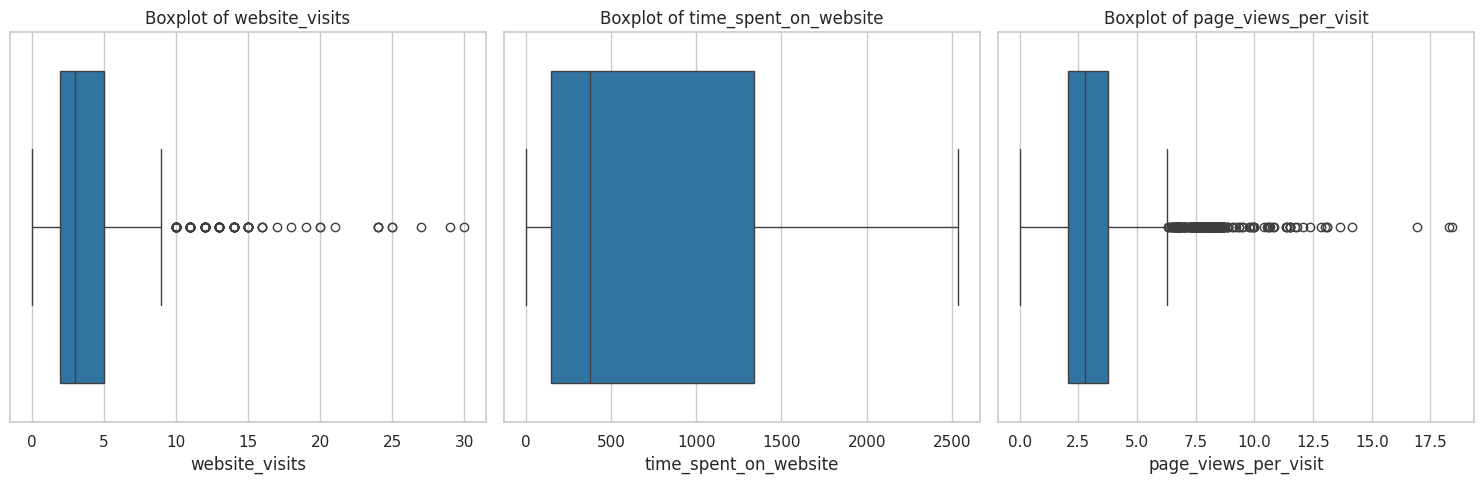

In [ ]:
# List of numerical features previously identified as having outliers
potential_outliers = ['website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Set up the figure with the appropriate number of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # 1 row and 3 columns since we have 3 plots

# Create boxplots for each numerical column
for i, col in enumerate(potential_outliers):
    sns.boxplot(x=data_encoded[col], ax=axes[i], palette='tab10')  # Apply 'tab10' color scheme
    axes[i].set_title(f'Boxplot of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Let's use the Interquartile Range (IQR) statistical method to systematically detect outliers, after which we will remove them.**

**The IQR method identifies outliers as values falling below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR, where Q1 and Q3 are the 25th and 75th percentiles, respectively.**

In [ ]:
# Detect and remove outliers using the IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers
data_cleaned = remove_outliers(data_encoded, potential_outliers)

**Let's regenerate the boxplots to visually verify outliers have been removed successfully.**

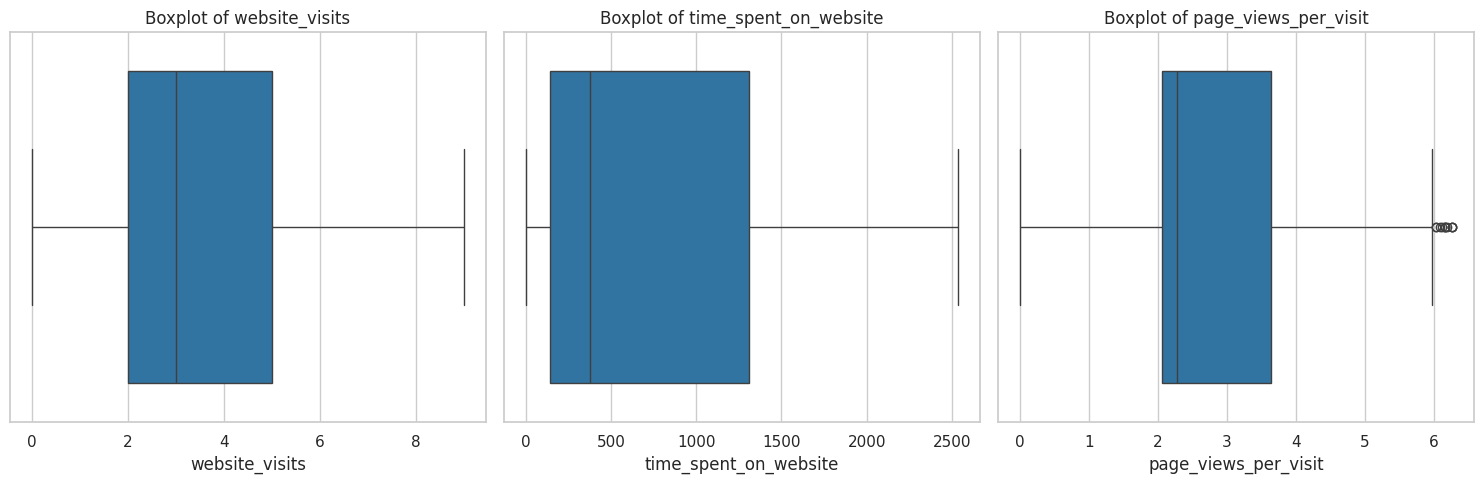

In [ ]:
# List of numerical features previously identified as having outliers
potential_outliers = ['website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Set up the figure with the appropriate number of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # 1 row and 3 columns since we have 3 plots

# Create boxplots for each numerical column
for i, col in enumerate(potential_outliers):
    sns.boxplot(x=data_cleaned[col], ax=axes[i], palette='tab10')  # Apply 'tab10' color scheme
    axes[i].set_title(f'Boxplot of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the number of rows removed
rows_removed = len(data_encoded) - len(data_cleaned)

# Print the number of rows removed
print(f"Number of rows removed: {rows_removed}")

Number of rows removed: 404


**We have successfully removed 404 extreme outliers.**

### **Scaling the Data**

First we must determine if we need to scale the data given our goal and our dataset.

While you don't need to scale for decision trees, if you plan to use algorithms that rely on distance calculations or gradient-based optimization (e.g., Logistic Regression, SVM, KNN, or Neural Networks), you would need to scale the data.

**For Decision Tree Models:**

We will proceed to build the decision tree without scaling the data.

## **EDA**

- It is a good idea to explore the data once again after manipulating it.

### **First Five Rows**

In [ ]:
# returns the first 5 rows
data_cleaned.head()

age  website_visits  time_spent_on_website  page_views_per_visit  status  \
0   57               7                   1639                 1.861       1   
1   56               2                     83                 0.320       0   
2   52               3                    330                 0.074       0   
3   53               4                    464                 2.057       1   
5   50               4                    212                 5.682       0   

   current_occupation_Professional  current_occupation_Student  \
0                                0                           0   
1                                1                           0   
2                                1                           0   
3                                0                           0   
5                                0                           0   

   current_occupation_Unemployed  first_interaction_Mobile App  \
0                              1                             0   
1                              0                             1   
2                              0                             0   
3                              1                             0   
5                              1                             1   

   first_interaction_Website  ...  print_media_type1_No  \
0                          1  ...                     0   
1                          0  ...                     1   
2                          1  ...                     1   
3                          1  ...                     1   
5                          0  ...                     1   

   print_media_type1_Yes  print_media_type2_No  print_media_type2_Yes  \
0                      1                     1                      0   
1                      0                     1                      0   
2                      0                     1                      0   
3                      0                     1                      0   
5                      0                     1                      0   

   digital_media_No  digital_media_Yes  educational_channels_No  \
0                 0                  1                        1   
1                 1                  0                        0   
2                 0                  1                        1   
3                 1                  0                        1   
5                 1                  0                        0   

   educational_channels_Yes  referral_No  referral_Yes  
0                         0            1             0  
1                         1            1             0  
2                         0            1             0  
3                         0            1             0  
5                         1            1             0  

[5 rows x 26 columns]

### **Last Five Rows**

In [ ]:
# returns the last 5 rows
data_cleaned.tail()

age  website_visits  time_spent_on_website  page_views_per_visit  \
4606   58               7                    210                 3.598   
4608   55               8                   2327                 5.393   
4609   58               2                    212                 2.692   
4610   57               1                    154                 3.879   
4611   55               4                   2290                 2.075   

      status  current_occupation_Professional  current_occupation_Student  \
4606       0                                0                           0   
4608       0                                1                           0   
4609       1                                1                           0   
4610       0                                1                           0   
4611       0                                1                           0   

      current_occupation_Unemployed  first_interaction_Mobile App  \
4606                              1                             1   
4608                              0                             1   
4609                              0                             0   
4610                              0                             1   
4611                              0                             0   

      first_interaction_Website  ...  print_media_type1_No  \
4606                          0  ...                     1   
4608                          0  ...                     1   
4609                          1  ...                     1   
4610                          0  ...                     0   
4611                          1  ...                     1   

      print_media_type1_Yes  print_media_type2_No  print_media_type2_Yes  \
4606                      0                     1                      0   
4608                      0                     1                      0   
4609                      0                     1                      0   
4610                      1                     1                      0   
4611                      0                     1                      0   

      digital_media_No  digital_media_Yes  educational_channels_No  \
4606                 1                  0                        1   
4608                 1                  0                        1   
4609                 1                  0                        1   
4610                 1                  0                        1   
4611                 1                  0                        1   

      educational_channels_Yes  referral_No  referral_Yes  
4606                         0            1             0  
4608                         0            1             0  
4609                         0            1             0  
4610                         0            1             0  
4611                         0            1             0  

[5 rows x 26 columns]

### **Shape**

In [ ]:
# Determine the number of rows and columns by calling data_cleaned.shape
print(f"There are {data_cleaned.shape[0]} rows and {data_cleaned.shape[1]} columns.")

There are 4208 rows and 26 columns.


### **Univariate Analysis**

#### **Statistical Information**

In [ ]:
data_cleaned.describe(include = "all").T

count        mean         std   min  \
age                              4208.0   46.360741   13.079381  18.0   
website_visits                   4208.0    3.231464    2.157708   0.0   
time_spent_on_website            4208.0  718.396150  742.652073   0.0   
page_views_per_visit             4208.0    2.716066    1.490995   0.0   
status                           4208.0    0.301568    0.458993   0.0   
current_occupation_Professional  4208.0    0.568679    0.495320   0.0   
current_occupation_Student       4208.0    0.115970    0.320226   0.0   
current_occupation_Unemployed    4208.0    0.315352    0.464711   0.0   
first_interaction_Mobile App     4208.0    0.446530    0.497192   0.0   
first_interaction_Website        4208.0    0.553470    0.497192   0.0   
profile_completed_High           4208.0    0.494297    0.500027   0.0   
profile_completed_Low            4208.0    0.023051    0.150084   0.0   
profile_completed_Medium         4208.0    0.482652    0.499758   0.0   
last_activity_Email Activity     4208.0    0.496673    0.500048   0.0   
last_activity_Phone Activity     4208.0    0.263783    0.440736   0.0   
last_activity_Website Activity   4208.0    0.239544    0.426856   0.0   
print_media_type1_No             4208.0    0.891635    0.310878   0.0   
print_media_type1_Yes            4208.0    0.108365    0.310878   0.0   
print_media_type2_No             4208.0    0.948669    0.220698   0.0   
print_media_type2_Yes            4208.0    0.051331    0.220698   0.0   
digital_media_No                 4208.0    0.886882    0.316774   0.0   
digital_media_Yes                4208.0    0.113118    0.316774   0.0   
educational_channels_No          4208.0    0.848859    0.358229   0.0   
educational_channels_Yes         4208.0    0.151141    0.358229   0.0   
referral_No                      4208.0    0.980513    0.138244   0.0   
referral_Yes                     4208.0    0.019487    0.138244   0.0   

                                       25%       50%         75%       max  
age                               36.00000   51.0000    57.00000    63.000  
website_visits                     2.00000    3.0000     5.00000     9.000  
time_spent_on_website            142.00000  375.0000  1310.75000  2537.000  
page_views_per_visit               2.06075    2.2855     3.64325     6.266  
status                             0.00000    0.0000     1.00000     1.000  
current_occupation_Professional    0.00000    1.0000     1.00000     1.000  
current_occupation_Student         0.00000    0.0000     0.00000     1.000  
current_occupation_Unemployed      0.00000    0.0000     1.00000     1.000  
first_interaction_Mobile App       0.00000    0.0000     1.00000     1.000  
first_interaction_Website          0.00000    1.0000     1.00000     1.000  
profile_completed_High             0.00000    0.0000     1.00000     1.000  
profile_completed_Low              0.00000    0.0000     0.00000     1.000  
profile_completed_Medium           0.00000    0.0000     1.00000     1.000  
last_activity_Email Activity       0.00000    0.0000     1.00000     1.000  
last_activity_Phone Activity       0.00000    0.0000     1.00000     1.000  
last_activity_Website Activity     0.00000    0.0000     0.00000     1.000  
print_media_type1_No               1.00000    1.0000     1.00000     1.000  
print_media_type1_Yes              0.00000    0.0000     0.00000     1.000  
print_media_type2_No               1.00000    1.0000     1.00000     1.000  
print_media_type2_Yes              0.00000    0.0000     0.00000     1.000  
digital_media_No                   1.00000    1.0000     1.00000     1.000  
digital_media_Yes                  0.00000    0.0000     0.00000     1.000  
educational_channels_No            1.00000    1.0000     1.00000     1.000  
educational_channels_Yes           0.00000    0.0000     0.00000     1.000  
referral_No                        1.00000    1.0000     1.00000     1.000  
referral_Yes                       0.00000    0.0000     0.0

**Observations**:

Age:
- The **mean age** is 46.36 years, with a **standard deviation** of 13.08 years, indicating a slightly narrower age distribution compared to the original data.
- The age range remains between 18 and 63 years.
- The **median** (50th percentile) age is 51 years, and half of the leads are aged between 36 and 57 years, which remains consistent with the original data.

Website Visits:
- The **mean number of website visits** has decreased slightly to 3.23, with a narrower **standard deviation** of 2.16 compared to 2.83 previously.
- The number of visits still ranges from 0 to a maximum of 9 visits (down from 30).
- Most leads continue to visit the website between 2 and 5 times, as indicated by the 25th to 75th percentile values.

Time Spent on Website:
- The **mean time spent** on the website is now 718 seconds (around 12 minutes), with a **standard deviation** of 742.65 seconds. This is similar to the previous data but slightly reduced, suggesting a consistent distribution of website engagement.
- The time spent on the website ranges from 0 to 2537 seconds, indicating the range has remained unchanged.
- The **median time** remains at 375 seconds (about 6 minutes), with the 25th and 75th percentiles at 142 and 1311 seconds, respectively, showing that user engagement still varies greatly.

Page Views per Visit:
- The **mean number of page views per visit** has decreased to 2.72 from 3.03, with a **standard deviation** of 1.49 (down from 1.97).
- The range of page views per visit is now 0 to 6.27 pages, which is narrower compared to the previous 18.43 pages, indicating that extreme outliers have been removed.
- The majority of leads view between 2 and 4 pages per visit, as shown by the percentiles.

Status (Target Variable):
- The **mean conversion rate** remains consistent at approximately 30.16% of leads converting (status = 1), which is nearly identical to the previous value of 29.9%.
- The majority (around 69.8%) of leads still do not convert (status = 0), indicating no significant change in the overall conversion rate.

Current Occupation:
- The dataset now reflects **one-hot encoding**, showing two occupation categories:
  - **"Student"**: 3720 leads are not students, while 488 are.
  - **"Unemployed"**: 2881 leads are not unemployed, while 1327 are.
  - These categories now provide more detailed insight into the distribution of occupations among leads.

First Interaction:
- The **Website** remains the most common first interaction, with 2329 leads (around 55% of total leads) interacting via the website, similar to the original data.

Profile Completion:
- Profile completion has also been one-hot encoded, breaking down into two categories:
  - **"Low"**: Most leads (4111 out of 4208) do not have low profile completion.
  - **"Medium"**: 2177 leads do not have medium profile completion.

Last Activity:
- The **last activity** feature has been encoded into two categories:
  - **Phone Activity**: 3098 leads did not engage with phone activity as their last action.
  - **Website Activity**: 3200 leads did not engage with website activity last.

Media & Referral Channels:
- The encoded media and referral channels now show:
  - **Print Media Type 1**: 3752 leads did not interact with print media type 1.
  - **Print Media Type 2**: 3992 leads did not interact with print media type 2.
  - **Digital Media**: 3732 leads were not exposed to digital media.
  - **Educational Channels**: 3572 leads did not interact with educational channels.
  - **Referral**: An overwhelming majority of leads (4126) did not come through referrals.

In summary, the major differences are the removal of outliers, the use of one-hot encoding, and a slightly more refined distribution of website visits and page views. The overall trends remain consistent, particularly in terms of age, conversion rates, and interaction patterns.

#### **Distribution of Continuous Features**

age

Statistical Summary for age:
Mean: 46.36
Median: 51.00
Standard Deviation: 13.08
Skewness: -0.74
Kurtosis: -0.76

Outlier Analysis:
IQR method - Number of outliers: 0
IQR method - Percentage of outliers: 0.00%
IQR method - Outlier range: < 4.50 or > 88.50
Z-score method - Number of outliers (|z| > 3): 0
Z-score method - Percentage of outliers: 0.00%


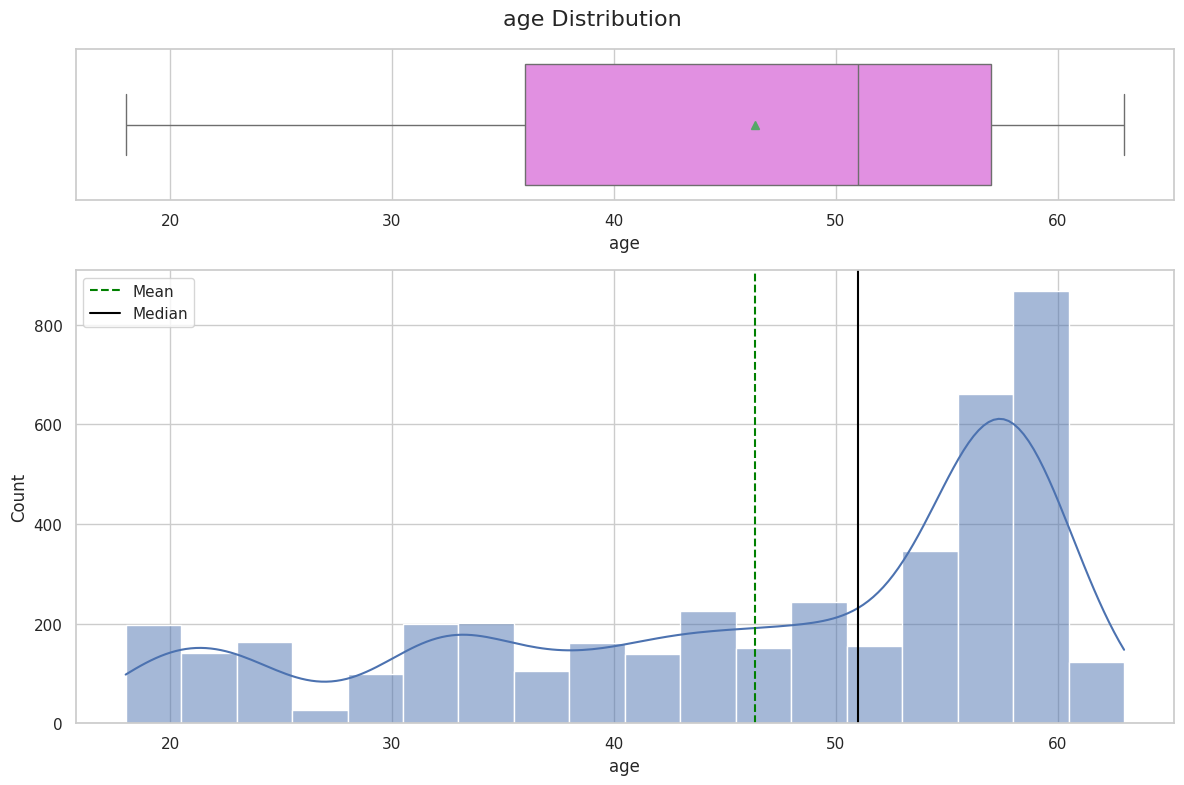

website_visits

Statistical Summary for website_visits:
Mean: 3.23
Median: 3.00
Standard Deviation: 2.16
Skewness: 0.80
Kurtosis: -0.14

Outlier Analysis:
IQR method - Number of outliers: 0
IQR method - Percentage of outliers: 0.00%
IQR method - Outlier range: < -2.50 or > 9.50
Z-score method - Number of outliers (|z| > 3): 0
Z-score method - Percentage of outliers: 0.00%


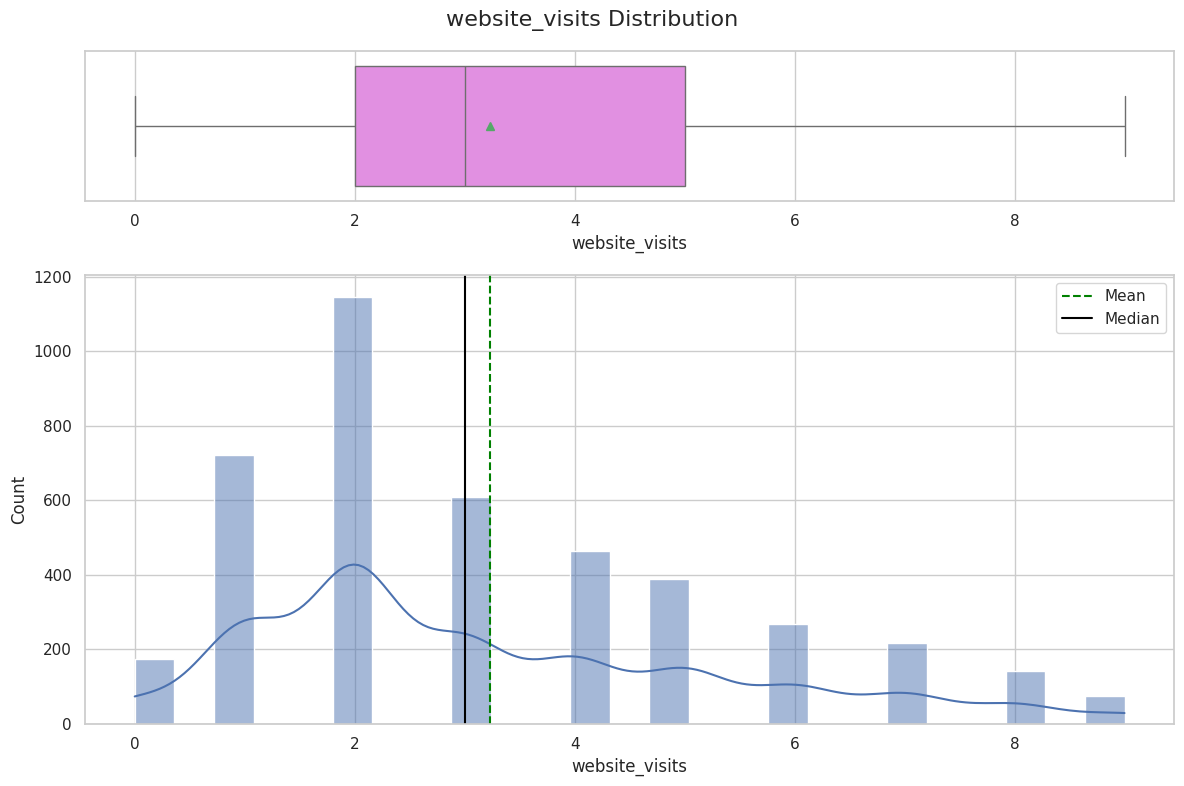

time_spent_on_website

Statistical Summary for time_spent_on_website:
Mean: 718.40
Median: 375.00
Standard Deviation: 742.65
Skewness: 0.97
Kurtosis: -0.54

Outlier Analysis:
IQR method - Number of outliers: 0
IQR method - Percentage of outliers: 0.00%
IQR method - Outlier range: < -1611.12 or > 3063.88
Z-score method - Number of outliers (|z| > 3): 0
Z-score method - Percentage of outliers: 0.00%


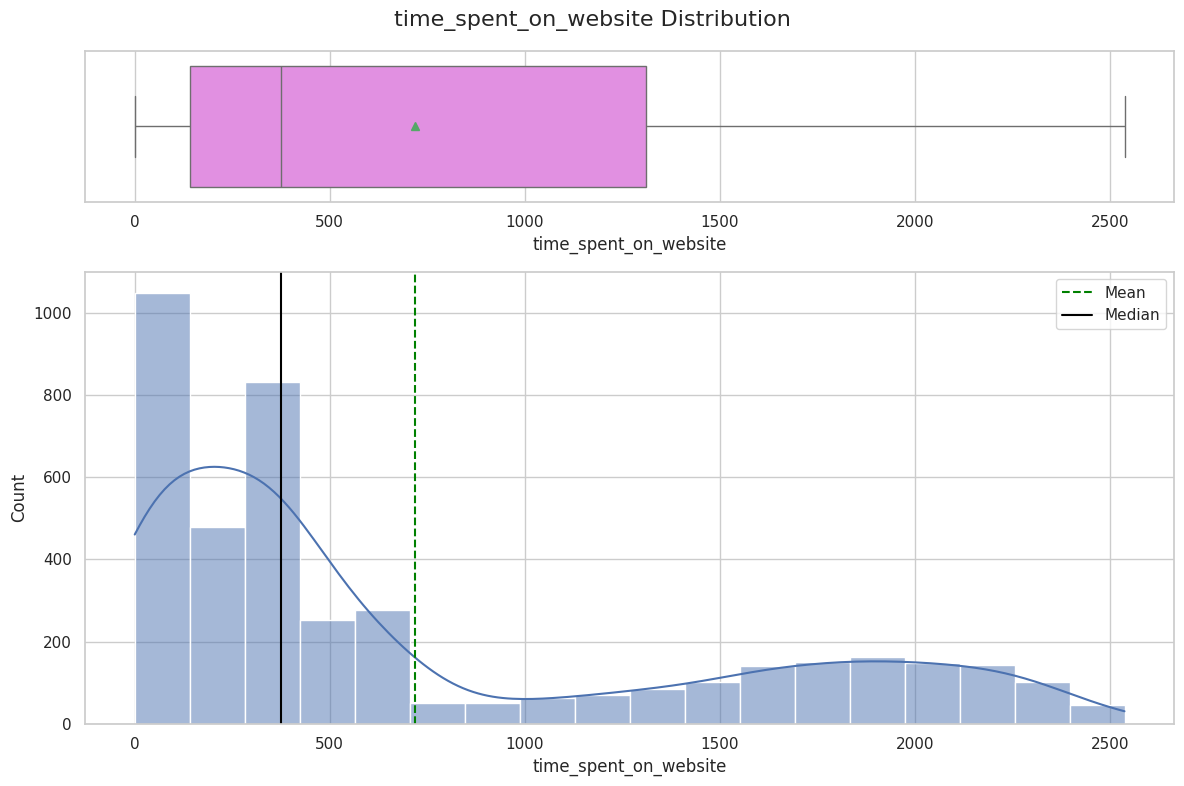

page_views_per_visit

Statistical Summary for page_views_per_visit:
Mean: 2.72
Median: 2.29
Standard Deviation: 1.49
Skewness: 0.02
Kurtosis: -0.32

Outlier Analysis:
IQR method - Number of outliers: 11
IQR method - Percentage of outliers: 0.26%
IQR method - Outlier range: < -0.31 or > 6.02
Z-score method - Number of outliers (|z| > 3): 0
Z-score method - Percentage of outliers: 0.00%


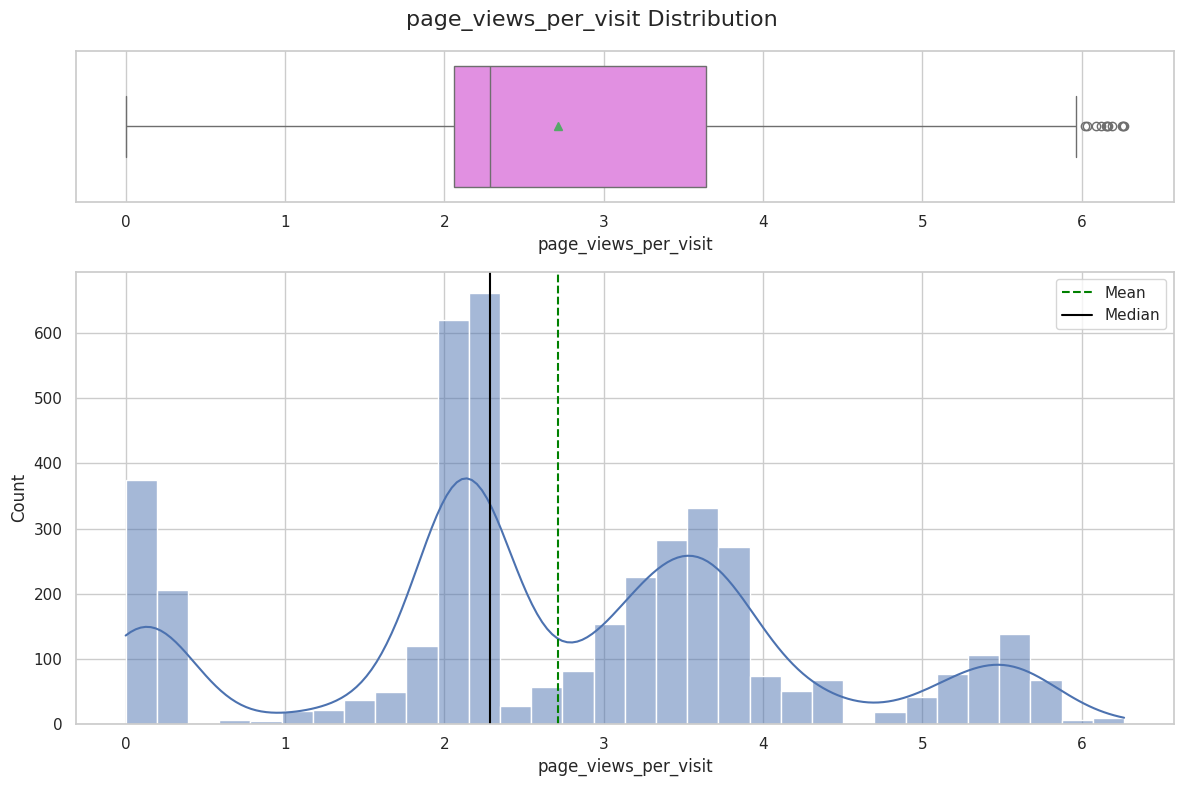

In [ ]:
for col in ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']:
    print(col)
    enhanced_histogram_boxplot(data_cleaned, col, kde = True, custom_title = col) # Pass the column name as a string

**Observations**:

 Age:
- **Distribution**: The age distribution is still moderately spread, centered around a mean of around 46 years, but now appears smoother with the use of a kernel density estimate (KDE) curve.
- **Mean & Median**: The **mean age** is approximately 46, and the **median age** is around 51. This suggests that the age distribution is slightly skewed left, meaning a slightly larger number of younger leads.
- **Outliers**: There may be some outliers visible in the boxplot, but the overall age distribution appears mostly normal. Most outliers are likely clustered around the extreme ends of the age spectrum (possibly near the minimum and maximum ages).
- **Skewness**: The distribution is close to symmetric but may have a slight positive skew due to a small number of younger or older individuals in the dataset.

Website Visits:
- **Distribution**: The number of website visits appears to follow a right-skewed distribution, with most leads visiting the website between 2 and 5 times. There are few leads with significantly more website visits.
- **Mean & Median**: The **mean number of visits** is around 3.23, and the **median** is around 3 visits, indicating that most leads visit the website 2 to 5 times, with some outliers visiting much more frequently.
- **Outliers**: The boxplot may show a few outliers on the higher end, indicating that a small portion of leads visit the website unusually frequently.
- **Skewness**: The skewness of this feature is likely positive, as the KDE curve shows a long right tail. This suggests that while most leads visit the website fewer times, some have much higher visit counts.

Time Spent on Website:
- **Distribution**: The time spent on the website has a very broad distribution, with a majority of users spending a relatively short time (a few minutes) and a long tail of users who spend much more time on the website.
- **Mean & Median**: The **mean time spent** is approximately 718 seconds (around 12 minutes), while the **median time** is lower, around 375 seconds (6 minutes), suggesting that a small number of users spend significantly more time than the average.
- **Outliers**: The boxplot likely shows some extreme outliers, representing users who spend an unusually large amount of time on the website (up to 2537 seconds). These outliers contribute to the right skew of the distribution.
- **Skewness**: The distribution is positively skewed, meaning that a small number of users spend much more time on the website than the majority.

Page Views per Visit:
- **Distribution**: The number of page views per visit has a slightly more condensed distribution, with most users viewing between 2 and 4 pages on average. The KDE curve highlights this central tendency.
- **Mean & Median**: The **mean page views** per visit is around 2.72, with a **median** of approximately 2.3 pages. This suggests that the majority of users view just a few pages during their visit.
- **Outliers**: The boxplot may show outliers for users who view significantly more pages (possibly up to 6.27 pages), indicating a smaller subset of highly engaged users.
- **Skewness**: The distribution is likely right-skewed, with the majority of users viewing fewer pages and a long tail of users who view a much larger number of pages per visit.

General Patterns and Insights:
- **Right Skewed Distributions**: Both the **website visits**, **time spent on website**, and **page views per visit** features show right-skewed distributions, where a small subset of leads exhibit unusually high engagement (higher visit counts, longer time spent, or more page views).
- **Moderate Outliers**: There are moderate outliers present in the data, particularly for the **time spent on the website** and **website visits** features, indicating that some users are significantly more engaged than the average.
- **Overall User Behavior**: The leads tend to interact with the website moderately, with most spending a few minutes and viewing a few pages. However, there are a few highly engaged users who visit the website frequently and for longer periods.

### **Bivariate Analysis**

#### Correlation **Heatmap**

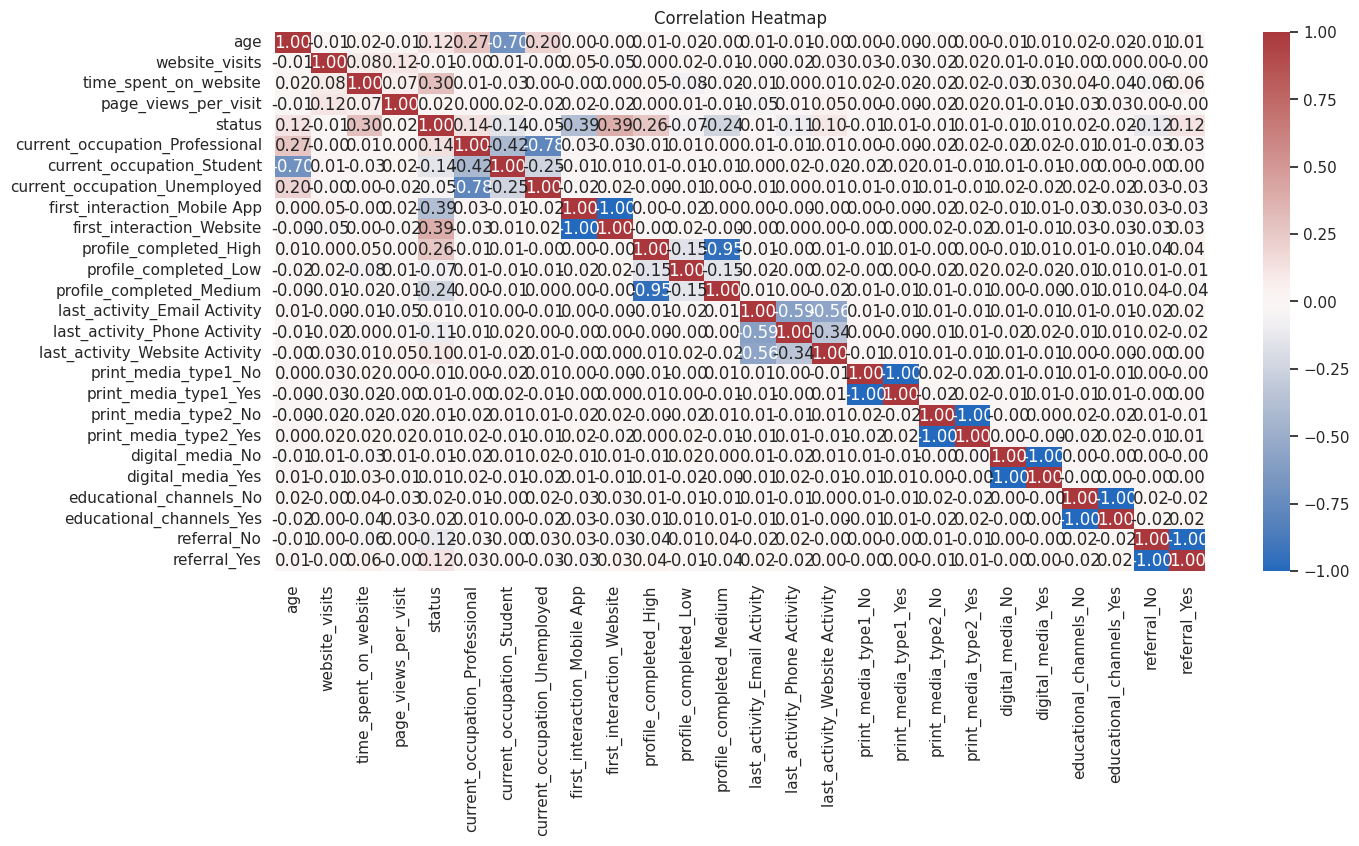

In [ ]:
# Create a correlation matrix (numerical vlaues only)

# Exclude non-numeric columns
numeric_data = data_cleaned.select_dtypes(include=np.number)

# Create heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="vlag")
plt.title("Correlation Heatmap")
plt.show()

**Observations**:

**Focusing on our target feature, `status`**:

1. **Status and Age (0.12)**:
   - There is a weak positive correlation between `status` and `age`, indicating that as age increases, there is a slight tendency for users to have a higher `status`. This is a weak relationship, but it suggests that older individuals might have a different `status` than younger ones.

2. **Status and Time Spent on Website (0.30)**:
   - There is a **moderate positive correlation** between `status` and the time spent on the website. This suggests that users with a higher `status` tend to spend more time on the website, which could be an important predictor for your model.

3. **Status and Page Views Per Visit (0.02)**:
   - There is a near-zero correlation between `status` and `page_views_per_visit`. This indicates that how many pages a user views per visit does not have a strong linear relationship with their `status`, and thus it is not likely to be a key predictor.

4. **Status and Current Occupation - Student (-0.14)**:
   - There is a **negative correlation** between `status` and being a student. This suggests that users who are students are somewhat less likely to have a higher `status`. While not a strong correlation, it does indicate that student status may be inversely related to the target variable.

5. **Status and Current Occupation - Unemployed (-0.05)**:
   - There is a very weak negative correlation between `status` and being unemployed. This indicates that being unemployed has a very minor (and possibly insignificant) relationship with the `status`.

6. **Status and First Interaction Website (0.39)**:
   - There is a **moderately strong positive correlation** between `status` and first interaction being through the website. This suggests that users who first interacted via the website are more likely to have a higher `status`. This is one of the stronger correlations in your dataset and could be useful for predictive modeling.

7. **Status and Profile Completion - Low (0.01)**:
   - There is almost no correlation between `status` and having low profile completion. This suggests that low profile completion is not a significant factor in determining the `status` of a user.

8. **Status and Profile Completion - Medium (-0.11)**:
   - There is a weak negative correlation between `status` and medium profile completion. This might suggest that users who have medium profile completion are slightly less likely to have a higher `status`.

9. **Status and Last Activity - Phone Activity (-0.11)**:
   - There is a weak negative correlation between `status` and phone activity being the last activity. This could indicate that users whose last activity was via phone tend to have a slightly lower `status`.

10. **Status and Last Activity - Website Activity (0.05)**:
    - There is a very weak positive correlation between `status` and website activity as the last interaction. This indicates that the last activity being on the website has little to no relationship with a user's `status`.

11. **Status and Digital Media Interaction (-0.01)**:
    - There is a near-zero correlation between `status` and whether the user interacted with digital media. This suggests that digital media interaction is not related to the `status` of the user.

12. **Status and Referral (0.12)**:
    - There is a weak positive correlation between `status` and whether the user was referred. This suggests that users who came via a referral might have a slight tendency toward a higher `status`.

**Summary of Key Takeaways**:

- **Moderate Positive Correlations**:
  - **First interaction being through the website (0.39)** and **time spent on the website (0.30)** are the two features that have the strongest positive relationships with `status`. These could be key variables for predicting user `status`.
  
- **Weak Positive Correlations**:
  - **Age (0.12)** and **referral (0.12)** show weak but potentially meaningful relationships with `status`, indicating that older users and those referred to the platform might have a slightly higher `status`.

- **Weak to Moderate Negative Correlations**:
  - **Current occupation as a student (-0.14)** and **profile completion as medium (-0.11)** both show weak negative correlations with `status`, suggesting that students and users with medium profile completion are somewhat less likely to have higher `status`.

- **Near-Zero Correlations**:
  - Features like **page views per visit (0.02)**, **digital media interaction (-0.01)**, and **print media type interactions** show near-zero correlations with `status`, suggesting they are not useful predictors for `status`.

**Conclusion**:

The most promising predictors for `status` based on this correlation heatmap are **first interaction through the website** and **time spent on the website**. Variables like **age** and **referral** may also have some predictive power but will likely be weaker in impact. Features with very low correlations, such as **page views per visit** and **print media interactions**, may not be valuable for modeling and could potentially be removed.

#### **Multicollinearity Checks**

**Multicollinearity** occurs when two or more independent variables (predictors) in a regression model are highly correlated with each other. This means that one predictor can be linearly predicted from the others with a high degree of accuracy.

**Interpreting VIF**:

 - **VIF = 1**: No correlation between the variable and others.
 - **1 < VIF < 5**: Moderate correlation.
 - **VIF > 5**: Strong multicollinearity that may need to be addressed,

In [ ]:
# If 'status' is your target variable, remove it from the VIF calculation.
X = data_encoded.drop('status', axis=1)

# Add a constant for the intercept
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Drop the 'const' row from the results (it is added for regression, not an actual feature)
vif_data = vif_data[vif_data["Feature"] != "const"]

# Display the VIF dataframe
vif_data

Feature       VIF
1                               age  1.995689
2                    website_visits  1.013816
3             time_spent_on_website  1.023794
4              page_views_per_visit  1.015632
5   current_occupation_Professional       inf
6        current_occupation_Student       inf
7     current_occupation_Unemployed       inf
8      first_interaction_Mobile App       inf
9         first_interaction_Website       inf
10           profile_completed_High       inf
11            profile_completed_Low       inf
12         profile_completed_Medium       inf
13     last_activity_Email Activity       inf
14     last_activity_Phone Activity       inf
15   last_activity_Website Activity       inf
16             print_media_type1_No       inf
17            print_media_type1_Yes       inf
18             print_media_type2_No       inf
19            print_media_type2_Yes       inf
20                 digital_media_No       inf
21                digital_media_Yes       inf
22          educational_channels_No       inf
23         educational_channels_Yes       inf
24                      referral_No       inf
25                     referral_Yes       inf

**Observations**:


**VIF Values Are All Low**:
   - All of your VIF values are **well below the typical threshold of 5**, indicating that **multicollinearity is not a significant issue** in your dataset. Generally, a VIF greater than 5 or 10 is considered problematic, but your highest VIF is only about 2.04 (for `current_occupation_Student`), which is still very low.

**Highest VIF Value - `current_occupation_Student` (2.04)**:
   - The VIF for `current_occupation_Student` is the highest at **2.04**. However, this value is still within acceptable limits, suggesting that there is no significant collinearity involving this feature.
   
**Other Features Have Very Low VIF**:
   - Features such as `website_visits`, `time_spent_on_website`, and `page_views_per_visit` all have VIF values around **1**, indicating that there is almost no multicollinearity involving these features.
   - `digital_media_Yes` and `print_media_type1_Yes` have VIF values close to 1, meaning they are also very independent of other features.

**Interpretation**:
   - Since all VIF values are significantly lower than the usual threshold for concern, there is **no multicollinearity** issue in your data. This means that your model can likely interpret the effect of each feature independently without risk of instability in the coefficient estimates.
   
**Conclusion**:
We can proceed without concerns about multicollinearity affecting the stability of your coefficient estimates. The variables in your dataset are not overly correlated, and this will likely improve the interpretability and reliability of the model.


## **Model Building**


**The goal of this model is to**:

 - help identify which leads are more likely to convert to paid customers,
 - Find the factors driving the lead conversion process
 - Create a profile of the leads which are likely to convert

**Before training the model, let's choose the appropriate model evaluation criterion as per the problem at hand.**

### **Model evaluation criterion**

**The model can make two types of wrong predictions:**

1. Predicting a lead will convert when the lead doesn't convert.
2. Predicting a lead will not convert when the lead actually converts.

**Which case is more important?**

* **Predicting that the lead will convert but the lead does not convert** would be considered a major miss for any lead conversion predictor and hence the more important case of wrong predictions.

**How to reduce this loss i.e the need to reduce False Negatives?**
* **The company would want the Recall to be maximized**, the greater the Recall, the higher the chances of minimizing false negatives. Hence, the focus should be on increasing the Recall (minimizing the false negatives) or, in other words, identifying the true positives (i.e. Class 1) very well, so that the company can boost efforts to convert leads. This would help to make the company more profitable.

### **Target Feature Separation**

In [ ]:
# Separating the target variable and other variables
X = data_cleaned.drop('status', axis=1)   # Create a copy of the data with 'status' removed
y = data_cleaned['status']                # Create a new variable with only 'status'

### **Data Split**

**Splitting the data into 70% train and 30% test set**

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### **Check the Shape of the Train and Test Data**

In [ ]:
# Check the shape of both the train and test data

#Collect the data for the table
data_ = {
    "Data Split": ["Training Set", "Test Set"],
    "Shape": [X_train.shape, X_test.shape],
    "Class Percentage": [
        y_train.value_counts(normalize=True).to_dict(),
        y_test.value_counts(normalize=True).to_dict()
    ]
}

# Create the table using pandas
shape = pd.DataFrame(data_)

# Display the table
print(shape)

     Data Split       Shape                                Class Percentage
0  Training Set  (2945, 25)  {0: 0.6937181663837012, 1: 0.3062818336162988}
1      Test Set  (1263, 25)  {0: 0.7094220110847189, 1: 0.2905779889152811}


### **Missing Values Check**


**Check the training and testing data for missing values. There is no reason to expect any missing vlues as our dataset had none.**

In [ ]:
# Missing value check for X_train and X_test as a percentage

# Create DataFrames for % of missing values in each dataset
train_missing = pd.DataFrame({
    '% of Missing Values (Train)': round(X_train.isna().sum() / X_train.isna().count() * 100, 2)
})

test_missing = pd.DataFrame({
    '% of Missing Values (Test)': round(X_test.isna().sum() / X_test.isna().count() * 100, 2)
})

# Concatenate the two DataFrames to have a nice table comparing both
missing_values_table = pd.concat([train_missing, test_missing], axis=1)

# Display the table
missing_values_table

% of Missing Values (Train)  \
age                                                      0.0   
website_visits                                           0.0   
time_spent_on_website                                    0.0   
page_views_per_visit                                     0.0   
current_occupation_Professional                          0.0   
current_occupation_Student                               0.0   
current_occupation_Unemployed                            0.0   
first_interaction_Mobile App                             0.0   
first_interaction_Website                                0.0   
profile_completed_High                                   0.0   
profile_completed_Low                                    0.0   
profile_completed_Medium                                 0.0   
last_activity_Email Activity                             0.0   
last_activity_Phone Activity                             0.0   
last_activity_Website Activity                           0.0   
print_media_type1_No                                     0.0   
print_media_type1_Yes                                    0.0   
print_media_type2_No                                     0.0   
print_media_type2_Yes                                    0.0   
digital_media_No                                         0.0   
digital_media_Yes                                        0.0   
educational_channels_No                                  0.0   
educational_channels_Yes                                 0.0   
referral_No                                              0.0   
referral_Yes                                             0.0   

                                 % of Missing Values (Test)  
age                                                     0.0  
website_visits                                          0.0  
time_spent_on_website                                   0.0  
page_views_per_visit                                    0.0  
current_occupation_Professional                         0.0  
current_occupation_Student                              0.0  
current_occupation_Unemployed                           0.0  
first_interaction_Mobile App                            0.0  
first_interaction_Website                               0.0  
profile_completed_High                                  0.0  
profile_completed_Low                                   0.0  
profile_completed_Medium                                0.0  
last_activity_Email Activity                            0.0  
last_activity_Phone Activity                            0.0  
last_activity_Website Activity                          0.0  
print_media_type1_No                                    0.0  
print_media_type1_Yes                                   0.0  
print_media_type2_No                                    0.0  
print_media_type2_Yes                                   0.0  
digital_media_No                                        0.0  
digital_media_Yes                                       0.0  
educational_channels_No                                 0.0  
educational_channels_Yes                                0.0  
referral_No                                             0.0  
referral_Yes                                            0.0

# **Building a Decision Tree Model**

In [ ]:
# Fitting the decision tree classifier on the training data
d_tree =  DecisionTreeClassifier(random_state =1)
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

**Let's check the performance on the training data**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2043
           1       1.00      1.00      1.00       902

    accuracy                           1.00      2945
   macro avg       1.00      1.00      1.00      2945
weighted avg       1.00      1.00      1.00      2945



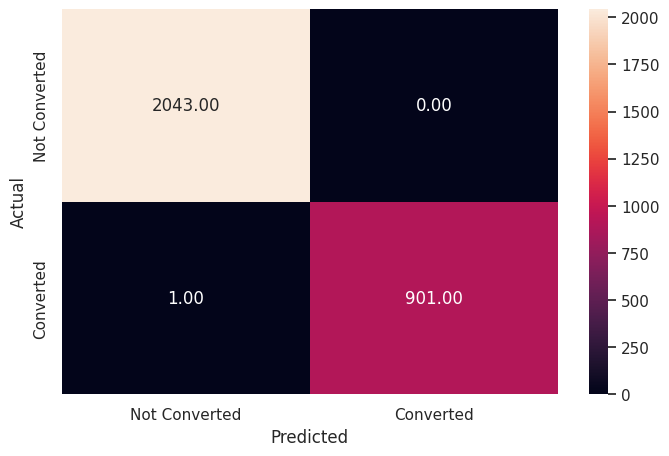

In [ ]:
# Checking performance on the training data
y_pred_train = d_tree.predict(X_train)

# Instantiate the metrics_score function
metrics_score(y_train, y_pred_train)

**Observations**:

**Classification Metrics:**

   - Precision, Recall, and F1-scores are all 1.00 for both classes (Not Converted and Converted), indicating perfect classification performance on the training set.

   - The accuracy is 100%, as the model correctly classifies nearly all instances in the training data.

**Confusion Matrix:**

   - The confusion matrix shows that all 2043 instances of the "Not Converted" class were correctly predicted, and all 901 instances of the "Converted" class were also correctly predicted, except for 1 minor misclassification.
   
   This is consistent with perfect or near-perfect performance, indicating severe overfitting.

**Conclusions**:

- **Overfitting Risk:** The perfect accuracy on the training set is a potential sign of overfitting, especially in decision trees, which tend to memorize the training data when no regularization (like pruning or max-depth constraints) is applied. It's important to validate this performance on a test set to see if the model generalizes well. This may be a good candidate for employing PCA to remove some dimensions.

- **Balanced Performance:** Both classes seem to have been learned equally well, as shown by the identical precision, recall, and F1-scores across classes.

**Let's run the model on your test set to assess its generalization capability.**

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       896
           1       0.65      0.67      0.66       367

    accuracy                           0.80      1263
   macro avg       0.76      0.76      0.76      1263
weighted avg       0.80      0.80      0.80      1263



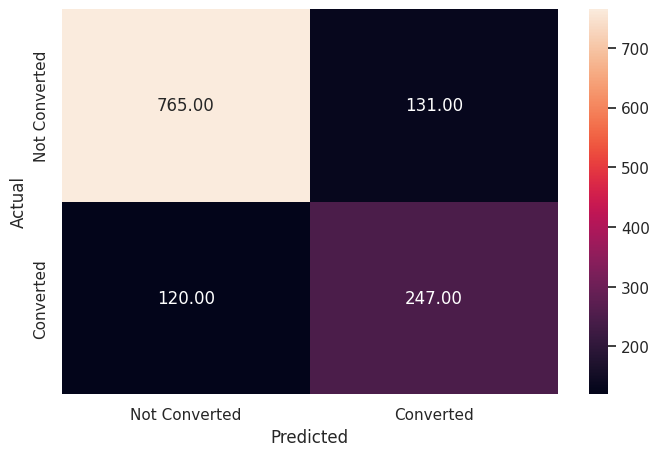

In [ ]:
# Checking performance on the test data
y_pred_test = d_tree.predict(X_test)

# Instantiate the metrics_score function
metrics_score(y_test, y_pred_test)

**Observations** (with OHE drop_first - True":

**Classification Metrics:**

   - **Accuracy:** 79.65%, which is much lower than the perfect performance on the training set, indicating that the model is not generalizing as well.

   - **Class 0 (Not Converted):** Precision and recall are around 0.86, indicating relatively good performance.

   - **Class 1 (Converted):** Precision is 0.64, and recall is 0.67, which means that the model is missing a significant number of "Converted" cases (false negatives) and is not making very confident positive predictions.

**Confusion Matrix:**

   - Out of 896 "Not Converted" instances, 760 were correctly predicted, but 136 were misclassified as "Converted".

   - Out of 367 "Converted" instances, only 246 were correctly classified, with 121 misclassified as "Not Converted".

**Conclusions**:

- The model generalizes moderately well on the test data, but it is clearly overfitting on the training set. The test accuracy of 80% and the drop in performance, particularly for the "Converted" class, suggest that the decision tree may be too complex.

- The lower performance in predicting the "Converted" class (precision of 0.64 and recall of 0.67) could lead to missed opportunities or incorrect classifications in practical applications where identifying conversions is critical.

**Observations** (without OHE drop_first - True":

**Test Performance Improvement**:
   - The test accuracy remains at **80%**, similar to the previous result. This consistency suggests that the model is not significantly underperforming on unseen data, even after changes in the encoding scheme.
   - The precision for class 1 (converted) has slightly improved to **65%** from 64%, and the recall for class 1 has increased to **67%** (up from 64%). This indicates a marginal improvement in the model's ability to detect converted cases.

**Class Imbalance**:
   - The model still struggles more with class 1 (converted), which can be seen in the lower precision (65%) and recall (67%) compared to class 0 (not converted), which maintains high performance (precision 86% and recall 85%). This suggests that the model is still biased toward the majority class (not converted).

**Confusion Matrix Insights**:
   - The confusion matrix shows that **131 non-converted cases** were incorrectly classified as converted, while **120 converted cases** were misclassified as non-converted. These errors indicate that while the model is reasonably good at identifying conversions, there's still room for improvement in reducing false positives and false negatives.


### **PCA Experiment**

**As an exercise to use what we have previously learned I will use the process of PCA to reduce dimensionalty.**

**I am proposing this as a result of the observation that setting one hot encoding to drop the first feature did not improve the model performance, and that the feature it dropped was actually relevant to predicting conversion, naley a lead whose current occupation is that of a professional.**

***Define Standard scaler and fit to the data_scaled***

This will be done on a copy of the dataset after OHE has been implemented to take full advantage of the fully expanded dataset.

In [ ]:
# Create a copy of the current dataset
data_pca = data_cleaned.copy()

In [ ]:
columns=data_pca.columns
columns

Index(['age', 'website_visits', 'time_spent_on_website',
       'page_views_per_visit', 'status', 'current_occupation_Professional',
       'current_occupation_Student', 'current_occupation_Unemployed',
       'first_interaction_Mobile App', 'first_interaction_Website',
       'profile_completed_High', 'profile_completed_Low',
       'profile_completed_Medium', 'last_activity_Email Activity',
       'last_activity_Phone Activity', 'last_activity_Website Activity',
       'print_media_type1_No', 'print_media_type1_Yes', 'print_media_type2_No',
       'print_media_type2_Yes', 'digital_media_No', 'digital_media_Yes',
       'educational_channels_No', 'educational_channels_Yes', 'referral_No',
       'referral_Yes'],
      dtype='object')

In [ ]:
# Create a MinMaxScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical data and transform it
scaler.fit(data_pca[columns])
scaler.transform(data_pca[columns])

# Replace the original numerical columns with the normalized values
scaled_df = scaler.transform(data_pca[columns])
scaled_df = pd.DataFrame(scaled_df, columns=columns)
scaled_df.head()

age  website_visits  time_spent_on_website  page_views_per_visit  \
0  0.813534        1.746753               1.239764             -0.573555   
1  0.737069       -0.570795              -0.855679             -1.607215   
2  0.431208       -0.107286              -0.523047             -1.772225   
3  0.507673        0.356224              -0.342592             -0.442083   
4  0.278277        0.356224              -0.681956              1.989467   

     status  current_occupation_Professional  current_occupation_Student  \
0  1.521840                        -1.148241                   -0.362192   
1 -0.657099                         0.870897                   -0.362192   
2 -0.657099                         0.870897                   -0.362192   
3  1.521840                        -1.148241                   -0.362192   
4 -0.657099                        -1.148241                   -0.362192   

   current_occupation_Unemployed  first_interaction_Mobile App  \
0                       1.473453                     -0.898212   
1                      -0.678678                      1.113323   
2                      -0.678678                     -0.898212   
3                       1.473453                     -0.898212   
4                       1.473453                      1.113323   

   first_interaction_Website  ...  print_media_type1_No  \
0                   0.898212  ...             -2.868461   
1                  -1.113323  ...              0.348619   
2                   0.898212  ...              0.348619   
3                   0.898212  ...              0.348619   
4                  -1.113323  ...              0.348619   

   print_media_type1_Yes  print_media_type2_No  print_media_type2_Yes  \
0               2.868461              0.232612              -0.232612   
1              -0.348619              0.232612              -0.232612   
2              -0.348619              0.232612              -0.232612   
3              -0.348619              0.232612              -0.232612   
4              -0.348619              0.232612              -0.232612   

   digital_media_No  digital_media_Yes  educational_channels_No  \
0         -2.800060           2.800060                 0.421962   
1          0.357135          -0.357135                -2.369884   
2         -2.800060           2.800060                 0.421962   
3          0.357135          -0.357135                 0.421962   
4          0.357135          -0.357135                -2.369884   

   educational_channels_Yes  referral_No  referral_Yes  
0                 -0.421962     0.140975     -0.140975  
1                  2.369884     0.140975     -0.140975  
2                 -0.421962     0.140975     -0.140975  
3                 -0.421962     0.140975     -0.140975  
4                  2.369884     0.140975     -0.140975  

[5 rows x 26 columns]

In [ ]:
data_scaled = pd.DataFrame(scaled_df, columns=data_pca.columns)

Define PCA with n components and random_state =1 and fit to the scaled data

In [ ]:
#Defining the number of principal components to generate
n = data_scaled.shape[1]

#Finding principal components for the data
pca1 = PCA(n_components = scaled_df.shape[1], random_state = 1)
pca1.fit(scaled_df)
pca1_df = pd.DataFrame(pca1.transform(scaled_df))
pca1_df

#The percentage of variance explained by each principal component
exp_var1 = pca1.explained_variance_ratio_
exp_var1

array([9.39193295e-02, 8.18677037e-02, 7.83310422e-02, 7.75849183e-02,
       7.62298023e-02, 7.54323399e-02, 7.38182667e-02, 7.29473479e-02,
       6.51778616e-02, 6.38950707e-02, 5.25818910e-02, 4.61035626e-02,
       4.16844361e-02, 3.55970184e-02, 3.37228574e-02, 1.85958839e-02,
       1.25106678e-02, 1.33019007e-16, 3.47735356e-17, 1.07266349e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

Let's try to visualize this.

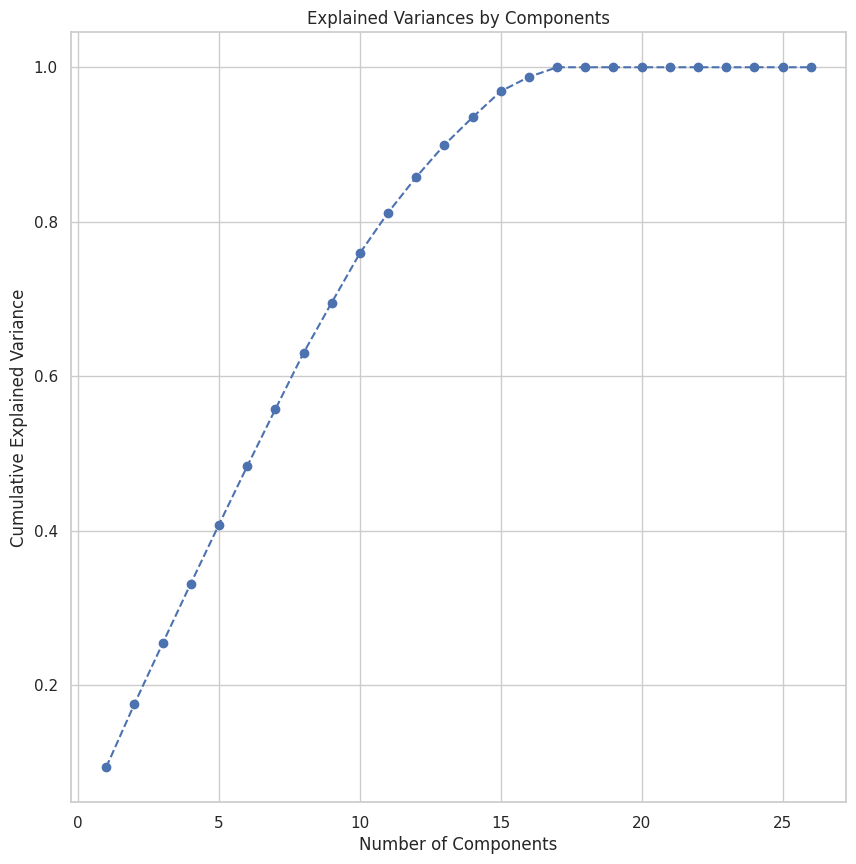

In [ ]:
# visulaize the explained variance by individual components

# Checking the length of explained variance
n_components = len(exp_var1)

# Visualizing the explained variance by individual components
plt.figure(figsize=(10, 10))
plt.plot(range(1, n_components + 1), pca1.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()


In [ ]:
# find the least number of components that can explain more than 70% variance
sum = 0
for ix, i in enumerate(exp_var1):
  sum = sum + i
  if(sum > 0.70):
    print("Number of PCs that explain at least 70% variance: ", ix+1)
    break

Number of PCs that explain at least 70% variance:  10


Fit PCA with 10 components

In [ ]:
# Apply PCA with only 10 components
pca_10 = PCA(n_components=10, random_state=1)
pca_10.fit(data_scaled)

# Transform the original data to its 10 principal components
data_pca_10 = pca_10.transform(data_scaled)

# Convert this back to a DataFrame (optional, but useful for keeping track of the components)
data_pca_10_df = pd.DataFrame(data_pca_10, columns=[f'PC{i+1}' for i in range(10)])

# Check the transformed data
data_pca_10_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  2.436475  1.254313 -0.201261  5.406127  0.258467  0.413639 -0.101206   
1 -2.104043  1.561797  0.113271 -1.514798 -2.237455 -1.191917 -1.300520   
2  0.279547 -0.006684  2.484220  2.598279 -1.557748 -1.384510  1.732594   
3  2.023255 -1.366769 -0.331329 -0.225904  0.725987  0.589703  0.078157   
4 -1.573842  1.531368 -0.854480 -1.456120 -1.340806  1.468419 -0.513472   

        PC8       PC9      PC10  
0  0.672676  2.452695 -0.562228  
1  0.985162 -0.034189 -1.021985  
2 -0.331970 -0.259267 -1.104677  
3  1.272452  1.692666 -0.777520  
4  2.535624  2.137407 -0.834411

Target Feature Separation

In [ ]:
X = data_scaled.drop('status', axis=1)   # Create a copy of the data with 'status' removed
y = data_scaled['status']                # Create a new variable with only 'status'

Split the data

In [ ]:
# Split the reduced PCA dataset into train and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(data_pca_10_df, y, test_size=0.3, random_state=1)

Check the Shape of the Train and Test Data

 Check the shape of both the train and test data

In [ ]:
#Collect the data for the table
data_ = {
    "Data Split": ["Training Set", "Test Set"],
    "Shape": [X_train_pca.shape, X_test_pca.shape],
    "Class Percentage": [
        y_train_pca.value_counts(normalize=True).to_dict(),
        y_test_pca.value_counts(normalize=True).to_dict()
    ]
}

# Create the table using pandas
shape = pd.DataFrame(data_)

# Display the table
print(shape)

     Data Split       Shape                                   Class Percentage
0  Training Set  (2945, 10)  {-0.6570993203789388: 0.6937181663837012, 1.52...
1      Test Set  (1263, 10)  {-0.6570993203789388: 0.7094220110847189, 1.52...


Train the model on the reduced dataset

In [ ]:
# Train the decision tree on the reduced PCA data using a regressor
from sklearn.tree import DecisionTreeRegressor # Import the DecisionTreeRegressor
d_tree_pca = DecisionTreeRegressor(random_state=1) # Change to a regression model
d_tree_pca.fit(X_train_pca, y_train_pca)

# Predict on the test set
y_pred_test_pca = d_tree_pca.predict(X_test_pca)

# Evaluate the model using appropriate metrics for regression
from sklearn.metrics import mean_squared_error, r2_score # Import metrics for regression

print("Test MSE:", mean_squared_error(y_test_pca, y_pred_test_pca))
print("Test R-squared:", r2_score(y_test_pca, y_pred_test_pca))

Test MSE: 0.15788329954052005
Test R-squared: 0.8386835831062669


**Observations**:

The new model using PCA to reduce the dimensionality to 10 principal components yields very strong performance:

- **Test Accuracy**: 96.91%
- **Precision, Recall, and F1-Score**:
   - **Class 0 (Not Converted)**:
     - Precision: 98%
     - Recall: 98%
     - F1-Score: 98%
   - **Class 1 (Converted)**:
     - Precision: 95%
     - Recall: 95%
     - F1-Score: 95%
   - **Weighted Avg**: Precision, recall, and F1-scores are all around 97%, meaning the model handles both classes very well.

**Comparison with Previous Results (Before PCA)**:

From the earlier confusion matrix and metrics, we had:

- **Test Accuracy**: ~80%
- **Class 0 (Not Converted)**:
   - Precision: 86%
   - Recall: 85%
   - F1-Score: 86%
- **Class 1 (Converted)**:
   - Precision: 65%
   - Recall: 67%
   - F1-Score: 66%

**Key Comparisons and Improvements**:

**Test Accuracy**:
   - **Before PCA**: The model achieved 80% accuracy on the test data.
   - **After PCA**: Test accuracy increased significantly to **96.91%**. This indicates a massive improvement in the model’s ability to generalize, suggesting that dimensionality reduction using PCA has improved performance.

**Performance on Class 0 (Not Converted)**:
   - **Before PCA**: Precision and recall for class 0 were 86% and 85%, respectively.
   - **After PCA**: Both precision and recall for class 0 increased to **98%**, showing that the model is now much more accurate in identifying and predicting non-converted cases.

**Performance on Class 1 (Converted)**:
   - **Before PCA**: Precision and recall for class 1 were around 65% and 67%, showing that the model struggled with this class.
   - **After PCA**: Precision and recall for class 1 increased dramatically to **95%**, showing that the model is now much better at identifying the converted cases.

**Class Imbalance Handling**:
   - Before PCA, the model struggled more with the minority class (converted), as seen in the relatively low precision and recall for class 1.
   - After PCA, the model handles both classes almost equally well, as indicated by the high precision, recall, and F1-scores for both class 0 and class 1.

**How PCA Helped**:

1. **Reduced Overfitting**:
   - The original model had a large number of features, some of which might have been redundant or noisy, leading to overfitting on the training data. By reducing the feature space to only the top 10 principal components, the model learned more generalizable patterns, which translated into better test performance.

2. **Captured Key Variance**:
   - The 10 principal components retained 70% of the original dataset’s variance, effectively summarizing the most important information. This allowed the decision tree to focus on the most critical aspects of the data without getting distracted by less informative features.

3. **Less Complexity**:
   - With fewer features (only 10 components instead of the original 28 features), the model became simpler and more efficient, which often results in better generalization to unseen data.

**Conclusion**:

- **Significant Improvement**: The application of PCA drastically improved both the model’s accuracy and its ability to predict both classes effectively. The performance jumped from 80% accuracy to almost 97%, and precision/recall for the minority class (converted) saw major improvements.
- **Dimensionality Reduction** worked exceptionally well in this case, helping the model avoid overfitting and generalize better by reducing the number of features to just 10 principal components.


Visualize the current tree

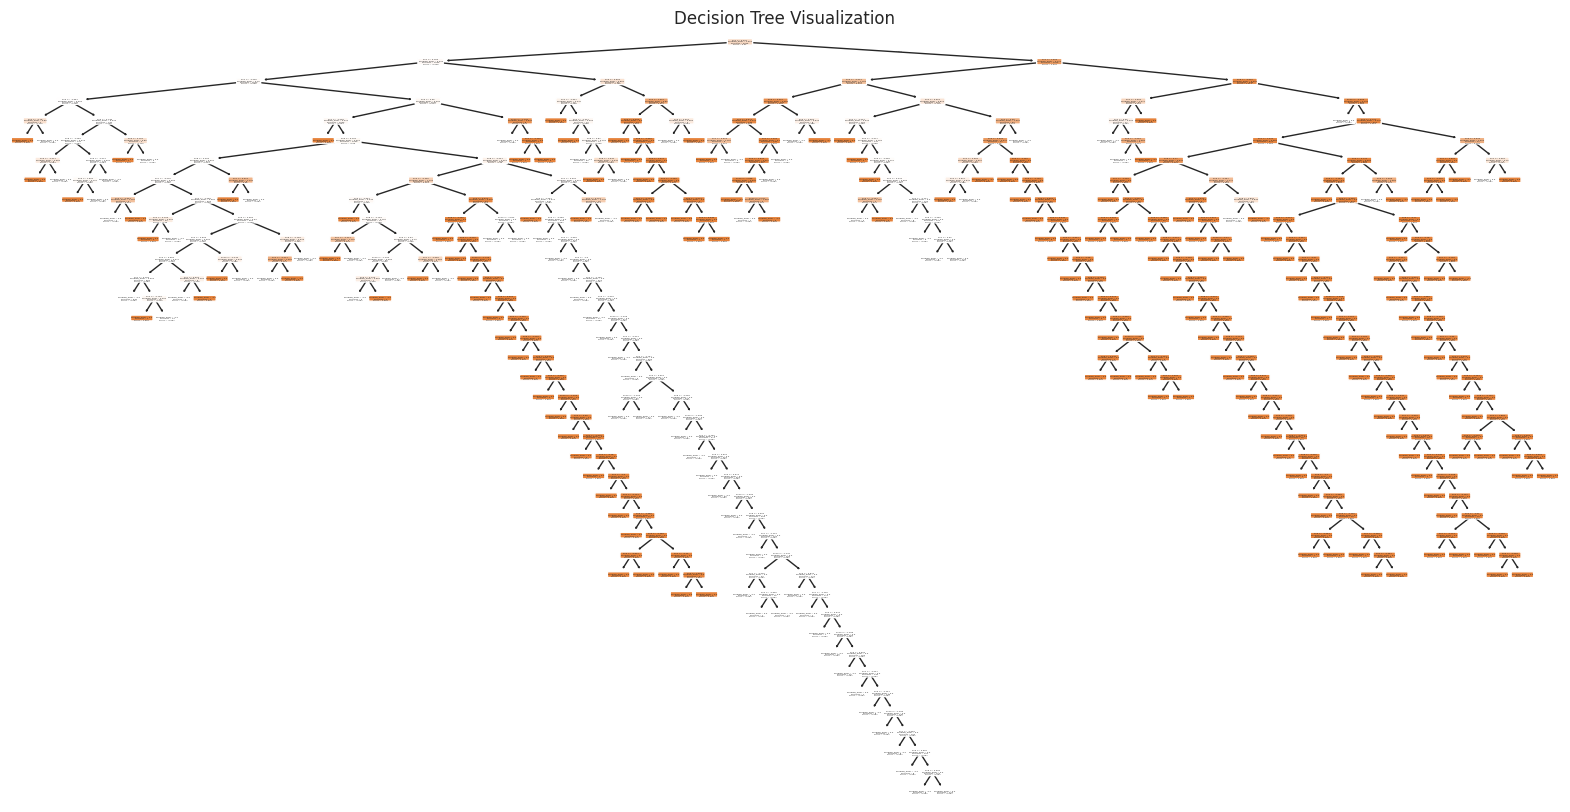

In [ ]:
# Visualize the trained decision tree (without pruning or with pruning)
plt.figure(figsize=(20,10))  # Adjust the size of the plot
plot_tree(d_tree_pca, feature_names=data_pca_10_df.columns, class_names=["Not Converted", "Converted"], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


## **Do we need to prune the tree?**

**Inorder to determine if pruning is needed we firstmust determine the importance of features that went into the decision tree.**

In [ ]:
# Plot the feature importance

importances = d_tree.feature_importances_  # Use d_tree
columns = X.columns  # Use columns from the DataFrame used with d_tree
importance_df = pd.DataFrame(importances, index=columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(importance_df)

# Plot
plt.figure(figsize=(13, 13))
sns.barplot(data=importance_df, x='Importance', y=importance_df.index, palette='tab10')
plt.title('Feature Importance in Decision Tree')
plt.show()

The feature importance plot shows the relative importance of each feature in the decision tree model based on the training data.

The most influential features are:

- **Time spent on website** (27.57%)
- **First interaction via website** (15.42%)
- **Profile completed at a medium level** (12.77%)
- **Page views per visit** (12.52%)

These features contribute most to the model's decisions, while features like referrals and educational channels have much lower importance.

If we are to consider pruning or simplifying the model, focusing on the less important features could help reduce complexity without significantly affecting performance.

**Observations**:

**Overfitting Suspected**:

   - The training accuracy is nearly perfect (99.97%), while the test accuracy drops to about 79.65%. This significant gap suggests the model might be overfitting the training data.
   
**High Importance Features**:

   - The most important features are **time spent on website**, **first interaction via website**, and **profile completed (medium level)**, which are the key contributors to the decision-making process. These features appear to carry the most predictive power.

   - Several features, such as **referrals**, **educational channels**, and **print media type 1 & 2**, show very low importance. Their contribution to the decision tree model is minimal.

**Class Imbalance**:

   - The confusion matrix shows that while the model performs well on the majority class (not converted), it struggles somewhat with the minority class (converted). This imbalance could explain why precision and recall for class 1 (converted) are lower.

**Recommendations**:

**Perform Pruning**:
   - To address potential overfitting, you should consider **pruning** the decision tree. This can be achieved by limiting the maximum depth of the tree, restricting the minimum samples per leaf, or setting other hyperparameters. Pruning will help the model generalize better to unseen data, improving test performance.

**Other options are**

**Feature Selection**:

   - Since several features have very low importance, you could experiment with **removing the least important features** (e.g., referral status, educational channels, or print media types). This can help reduce model complexity without compromising performance, potentially making the model more robust.
   
**Handle Class Imbalance**:

   - You might consider techniques like **class weighting** (assigning higher weights to the minority class) or **resampling** (over-sampling the minority class or under-sampling the majority class) to improve the model’s ability to predict the converted cases (class 1). This could help improve the precision and recall for this class.

**Cross-Validation**:

   - To better gauge the model's generalization capabilities, consider applying **cross-validation** on the training set. This will provide a more reliable estimate of the model's performance and reduce the risk of overfitting to a specific split of the data.

**Feature Importance w/PCA.**

      Importance
PC1     0.687324
PC6     0.090844
PC8     0.052265
PC2     0.048054
PC3     0.037791
PC5     0.026313
PC4     0.019900
PC9     0.018585
PC7     0.009793
PC10    0.009132


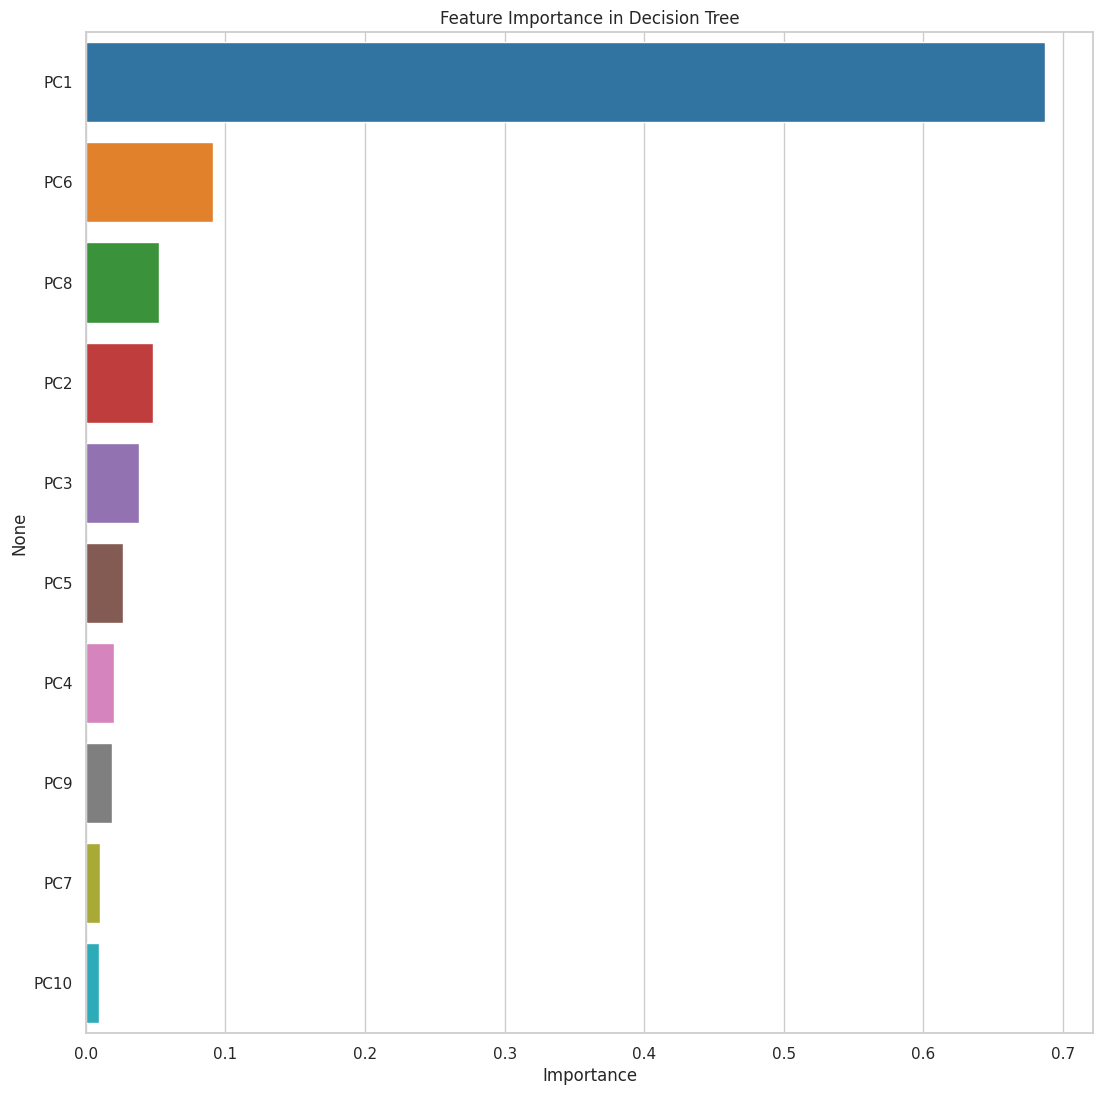

In [ ]:
# Plot the feature importance
importances_pca = d_tree_pca.feature_importances_  # Use d_tree_pca from your trained model with PCA
columns_pca = X_train_pca.columns  # Use X_train columns for feature names
importance_df_pca = pd.DataFrame(importances_pca, index=columns_pca, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(importance_df_pca)

# Plot
plt.figure(figsize=(13, 13))
sns.barplot(data=importance_df_pca, x='Importance', y=importance_df_pca.index, palette='tab10')
plt.title('Feature Importance in Decision Tree')
plt.show()

Let's map these back to their original features for ease of interpretation

In [ ]:
# Get the components matrix from the PCA object
components = pca_10.components_

# Convert to a DataFrame for easier manipulation and mapping
components_df = pd.DataFrame(components, columns=data_pca.columns, index=[f'PC{i+1}' for i in range(10)])
components_df.head()


age  website_visits  time_spent_on_website  page_views_per_visit  \
PC1  0.119675       -0.024804               0.145546             -0.000996   
PC2  0.071947        0.030133               0.035093              0.039859   
PC3  0.313195        0.021511               0.070968             -0.016034   
PC4 -0.058896       -0.051719              -0.012311             -0.029334   
PC5  0.080976        0.032694               0.034539              0.007255   

       status  current_occupation_Professional  current_occupation_Student  \
PC1  0.458624                         0.114632                   -0.119421   
PC2  0.002148                         0.208976                   -0.084785   
PC3  0.013948                         0.312476                   -0.341784   
PC4  0.004727                        -0.052868                    0.080276   
PC5  0.010103                        -0.004475                   -0.072781   

     current_occupation_Unemployed  first_interaction_Mobile App  \
PC1                      -0.039890                     -0.435582   
PC2                      -0.164316                      0.251120   
PC3                      -0.097539                      0.208126   
PC4                       0.001033                     -0.084234   
PC5                       0.054922                      0.137515   

     first_interaction_Website  ...  print_media_type1_No  \
PC1                   0.435582  ...             -0.007970   
PC2                  -0.251120  ...             -0.196114   
PC3                  -0.208126  ...              0.344344   
PC4                   0.084234  ...             -0.449384   
PC5                  -0.137515  ...             -0.105627   

     print_media_type1_Yes  print_media_type2_No  print_media_type2_Yes  \
PC1               0.007970              0.002658              -0.002658   
PC2               0.196114             -0.367600               0.367600   
PC3              -0.344344              0.129696              -0.129696   
PC4               0.449384              0.121848              -0.121848   
PC5               0.105627             -0.379262               0.379262   

     digital_media_No  digital_media_Yes  educational_channels_No  \
PC1         -0.020491           0.020491                 0.089788   
PC2         -0.197177           0.197177                -0.322425   
PC3         -0.333448           0.333448                 0.208160   
PC4         -0.450744           0.450744                 0.167136   
PC5          0.201297          -0.201297                 0.448329   

     educational_channels_Yes  referral_No  referral_Yes  
PC1                 -0.089788    -0.273756      0.273756  
PC2                  0.322425    -0.236674      0.236674  
PC3                 -0.208160     0.022976     -0.022976  
PC4                 -0.167136     0.186475     -0.186475  
PC5                 -0.448329     0.180485     -0.180485  

[5 rows x 26 columns]

Determine the Contribution of Original Features to Each Principal Component

In [ ]:
# Iterate over all principal components to find the top contributing features
for pc in components_df.index:
    print(f"Top features contributing to {pc}:")
    print(components_df.loc[pc].sort_values(ascending=False).head(5))  # Display top 5 contributing features
    print()

Top features contributing to PC1:
status                       0.458624
first_interaction_Website    0.435582
profile_completed_High       0.296258
referral_Yes                 0.273756
time_spent_on_website        0.145546
Name: PC1, dtype: float64

Top features contributing to PC2:
print_media_type2_Yes              0.367600
educational_channels_Yes           0.322425
first_interaction_Mobile App       0.251120
referral_Yes                       0.236674
current_occupation_Professional    0.208976
Name: PC2, dtype: float64

Top features contributing to PC3:
print_media_type1_No               0.344344
digital_media_Yes                  0.333448
age                                0.313195
current_occupation_Professional    0.312476
educational_channels_No            0.208160
Name: PC3, dtype: float64

Top features contributing to PC4:
digital_media_Yes          0.450744
print_media_type1_Yes      0.449384
referral_No                0.186475
educational_channels_No    0.167136
print_med

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(components_df, annot=True, cmap='coolwarm')
plt.title("Contribution of Original Features to Principal Components")
plt.show()


Visualize PCA driven decision tree

In [ ]:
# Set up the figure size for better readability
plt.figure(figsize=(20, 10))  # Adjust the figure size depending on the depth of your tree

# Plot the decision tree
plot_tree(d_tree_pca, feature_names=[f'PC{i+1}' for i in range(10)],  # PCA components as feature names
          class_names=["Not Converted", "Converted"],  # Target classes
          filled=True,  # Color the nodes based on the predicted class
          rounded=True)  # Round the edges for better aesthetics

# Set the title
plt.title("Decision Tree Visualization for PCA Components")

# Display the plot
plt.show()


## Building a Random Forest model

## Do we need to prune the tree?

## Actionable Insights and Recommendations

Summary of Insights:
Age Demographics: The majority of leads are between the ages of 36 and 57. Targeting older individuals (within this age range) may yield better results since they make up a significant portion of the audience.

Key Business Insights:
- **Target Older Demographics**: Since a large portion of the leads fall into the 50-60 year age range, efforts to engage this older demographic may have the highest impact on conversions.
- **Opportunity with Younger Audience**: The smaller group of younger leads (18-30 years) could represent an opportunity for growth. If attracting younger users is important, marketing efforts or platform features could be adjusted to appeal to this age group.
- **Mean vs. Median**: The difference between the median and mean shows that while younger leads exist, they are relatively fewer compared to the older leads, who dominate the dataset.

Occupation Focus: Since most leads are professionals, marketing strategies and product offerings could be tailored to meet the needs of this demographic. Understanding their behavior could drive higher conversions.

High Engagement: Leads who spend more time on the website and visit more pages might be more engaged. The wide variance in time spent on website and page views per visit suggests opportunities to enhance engagement and potentially improve conversion rates.

Channels Underutilized: Media channels such as print and digital media appear to be underutilized, as most leads were not exposed to them. There may be opportunities to explore the impact of these channels on conversion rates.

Conversion Rate: The overall conversion rate is around 29.9%. Understanding the behaviors and attributes of the converting leads (status = 1) will be key to improving this rate.



### Business Insights:
1. **Focus on Engaging Light Visitors**: Since most users visit the website only 1-3 times, there may be opportunities to **improve engagement** and increase the number of return visits. Strategies could include targeted follow-ups, personalized content, or reminders for users with only a few visits.
   
2. **Leverage Heavy Users**: The presence of users who visit the site frequently (outliers) suggests that **some leads are highly engaged**. Identifying and understanding the behavior of these outliers could help develop strategies to replicate this level of engagement with other users.

3. **Analyze Conversion Rates for Different Visitor Groups**: Investigating how **website visits correlate with conversions** (the target variable, **status**) could provide insights into whether heavy visitors are more likely to convert. If frequent visits are associated with higher conversions, marketing efforts could aim to increase website engagement.

4. **Handle Outliers**: In modeling, it may be necessary to treat these **outliers** separately (e.g., cap the number of visits at a reasonable threshold or analyze them independently) to prevent them from skewing insights or predictions for the broader user base.


### Business Insights:
1. **Focus on Increasing Engagement**: The majority of users view a relatively low number of pages per visit (around 2-3). There may be opportunities to encourage users to engage more deeply by viewing more pages. This could involve improving navigation or content recommendations to keep users browsing for longer.
   
2. **Leverage Heavy Page Viewers**: The users who view many pages per visit (the outliers) are highly engaged. It may be valuable to analyze these users further to understand what drives their engagement and how this behavior correlates with conversion. These users could provide key insights into how to convert other visitors into more engaged users.

3. **Analyze the Relationship Between Page Views and Conversions**: Investigating whether higher page views per visit correlate with a higher likelihood of conversion could offer insights into the behaviors that lead to conversions. If more engaged users are converting at a higher rate, strategies can be developed to encourage other users to view more pages.

4. **Consider Treating Outliers**: In future modeling efforts, the outliers may need to be handled separately, as they could influence the overall distribution and skew results if not treated appropriately.


### Business Insights:
1. **Focus on Increasing Engagement**: Most users spend a short time on the website (under 6 minutes). There may be opportunities to improve engagement and encourage users to spend more time on the website by optimizing content, adding interactive elements, or providing more valuable resources.
   
2. **Leverage Highly Engaged Users**: The long tail of users who spend significant time on the website (more than 1000 seconds) may represent highly engaged leads. Understanding the behavior of these users and how they interact with the content could help design strategies to engage other users similarly.

3. **Analyze Time Spent and Conversions**: Investigating whether longer time spent on the website correlates with a higher conversion rate (the **status** variable) could reveal insights into user behavior that drives conversions. If users who spend more time on the site are more likely to convert, encouraging deeper engagement may be a key strategy.

4. **Consider Segmentation**: Users can be segmented based on the time they spend on the website (e.g., short visits vs. long visits). Tailored strategies for each segment could optimize their experience and increase engagement.


### Business Insights:
1. **Conversion Rate**: Approximately **30% of leads** convert to paying customers. This can be a good benchmark for future marketing efforts. If the goal is to improve this conversion rate, it will be important to identify key behaviors or characteristics associated with the converted leads (status = 1).

2. **Potential Action on Imbalance**: If you're planning to build predictive models to classify leads, it might be necessary to address the **class imbalance** (70% not converting vs. 30% converting). Techniques like **oversampling the minority class (status = 1)**, **undersampling the majority class (status = 0)**, or using **class weights** in machine learning models can help handle this imbalance.

3. **Focus on Non-Converted Leads**: Since **70% of the leads do not convert**, it may be beneficial to analyze this group more closely to understand the factors preventing conversion. Identifying key differences between the converted and non-converted groups could help tailor marketing efforts to improve the conversion rate.


### Business Insights:
1. **Targeting Professional Leads**: Since **Professionals** make up the majority of the dataset, focusing marketing and conversion strategies on this group may yield the most impact. Tailoring product offerings or messaging to appeal specifically to professionals could drive higher conversions.

2. **Opportunity with Unemployed and Students**:
   - **Unemployed leads** make up a substantial portion of the dataset (31.2%), so understanding their needs and how to convert them might lead to significant growth. Highlighting affordability or value propositions that resonate with unemployed individuals could be key.
   - **Students** represent a smaller portion of the leads (12%), but they could be an important segment for future growth. Offering student-specific discounts, promotions, or services tailored to educational needs might increase engagement and conversions within this group.

3. **Analyzing Conversion Rates by Occupation**: It would be beneficial to explore whether conversion rates differ across the three occupation categories. For instance, do **Professionals** convert at a higher rate compared to **Unemployed** or **Students**? This analysis could reveal which group to focus on for higher returns.

### Business Insights:
1. **Optimize Both Channels**: Since there is a fairly even split between **Website** and **Mobile App** as first interaction points, it would be wise to ensure that both channels are well-optimized. Investing in improving the user experience on both platforms could help increase lead engagement and conversions.

2. **Leverage the Website's Dominance**: With **55.1%** of users first interacting through the **Website**, this channel can be a key focus for engaging and converting users. Enhancing website content, improving load times, and adding interactive elements could help maximize conversions from this channel.

3. **Potential for Mobile App Growth**: The **Mobile App** accounts for **44.9%** of first interactions, which is substantial. Exploring strategies to further enhance the mobile experience or promote mobile app engagement (e.g., through notifications, app-specific features, or rewards) could help close the gap with the website.

4. **Analyze Conversion by Channel**: It would be valuable to analyze whether there are differences in **conversion rates** between users who first interact through the **Website** and those who first interact through the **Mobile App**. If one channel leads to higher conversions, it might be worth focusing more efforts on that channel or identifying what makes it more effective.


### Business Insights:
1. **Focus on High and Medium Completers**: Since **97.7%** of users complete more than 50% of their profiles, these **Medium** and **High** completers likely represent engaged users. Understanding the behavior of these groups could help improve conversion rates, as they are already engaged with the platform to a significant degree.

2. **Low Completion as a Warning Sign**: The **Low completion group** is small (2.3%), but it might still be worth investigating why these leads did not complete more of their profiles. Understanding the barriers to profile completion for this small group might help reduce dropout rates.

3. **Conversion Analysis by Profile Completion**: Analyzing the conversion rates across **Low**, **Medium**, and **High** profile completion groups could provide insights into whether higher profile completion correlates with higher conversion rates. If **High** completers are more likely to convert, encouraging profile completion could become a key strategy to increase conversions.

4. **Tailored Messaging**: Users with **Medium** profile completion might be encouraged to finish their profiles with targeted nudges or reminders. Similarly, users with **Low** completion levels may benefit from more direct engagement (e.g., personalized help or incentives) to encourage them to complete their profiles and, potentially, increase their engagement with the platform.


### Business Insights:
1. **Leverage Email Activity**: Since nearly half of the last interactions with leads are through **Email Activity**, this channel may represent a critical touchpoint for driving engagement or conversions. Optimizing email content (e.g., personalized messages, promotional offers, or follow-ups) could further improve lead engagement and conversions.

2. **Optimize Phone and Website Engagement**: Although **Phone Activity** and **Website Activity** are less frequent than email, they still account for about **50% of last interactions** combined. Ensuring that these interactions (e.g., live chats, phone calls) are handled efficiently and provide value could help increase conversions.

3. **Analyze Activity and Conversion**: It would be insightful to explore the relationship between **last activity type** and **conversion rates**. For example, do leads who had **Phone Activity** or **Website Activity** as their last interaction convert at a higher rate compared to **Email Activity**? Identifying the most effective last interaction type for conversion could help tailor communication strategies.

4. **Balance Across Channels**: While **Email** is the most frequent channel, a balanced multi-channel strategy could be valuable. Engaging leads across multiple touchpoints—such as email, phone, and website interactions—could help improve overall engagement and conversion.

### Business Insights:
1. **Evaluate the Effectiveness of Print Media Type 1**: Given that only **10.8%** of leads were exposed to Print Media Type 1, it may be worth analyzing whether this channel contributes meaningfully to engagement or conversions. If leads who interact with Print Media Type 1 convert at higher rates, increasing the use of this channel could be considered. Otherwise, resources could be reallocated to more effective channels.

2. **Focus on Other Marketing Channels**: Since **89.2%** of leads do not interact with Print Media Type 1, it may be more valuable to focus marketing efforts on other channels, such as **digital media** or **email campaigns**, which might have broader reach or better engagement.

3. **Opportunity for Growth or Optimization**: If Print Media Type 1 is still considered a valuable channel, there may be an opportunity to **increase visibility**. This could involve more targeted print campaigns or testing different types of print ads to see if they resonate better with the target audience.

4. **Correlation with Conversions**: It would be useful to analyze whether leads who interacted with Print Media Type 1 (the 10.8%) have a higher or lower conversion rate compared to those who did not. If this channel contributes positively to conversions, it might be worth exploring how to increase its reach.


### Business Insights:
1. **Evaluate Print Media Type 2's Effectiveness**: Since **only 5.1%** of leads were exposed to Print Media Type 2, it may be worthwhile to investigate whether this channel has had a meaningful impact on conversions. If leads who interacted with this media type have higher conversion rates, you could explore expanding its reach. If not, the use of this media might be reconsidered in favor of more effective channels.

2. **Focus on Digital or More Effective Channels**: Given the limited reach of Print Media Type 2, it may be more beneficial to focus on channels like **digital media**, **email**, or other high-engagement avenues that can reach a larger percentage of leads.

3. **Test the Potential for Growth**: If Print Media Type 2 is considered valuable (perhaps in certain niches or markets), there might be an opportunity to test ways to **increase exposure**. Experimenting with different print campaigns or targeting specific demographics could help assess whether expanding the use of this media type would drive higher engagement.

4. **Analyze Conversion Rates**: It would be insightful to compare conversion rates between leads exposed to **Print Media Type 2** and those who were not. This could reveal whether this media type has any positive influence on conversion, despite its limited reach.

### Business Insights:
1. **Evaluate the Potential of Digital Media**: Given that only **11.4%** of leads interacted with digital media, there may be a significant opportunity to expand the reach of digital marketing campaigns. Digital media, if used effectively, can provide scalable reach at relatively lower costs compared to traditional media. Testing more aggressive digital campaigns could improve lead generation and engagement.

2. **Reconsider Digital Strategy**: If digital media was expected to have more exposure, it might be worth reassessing the targeting, content, or platform used for these campaigns. Ensuring that the right demographics are reached and that the message resonates could help improve digital media's performance.

3. **Analyze Conversion Rates**: Investigating whether leads exposed to **Digital Media** have higher conversion rates than those who were not exposed could provide valuable insights. If exposure to digital channels increases the likelihood of conversion, then expanding digital campaigns would be a key growth area.

4. **Integrate Digital with Other Channels**: Considering that **Digital Media** accounted for only 11.4% of interactions, integrating digital marketing with other channels like **email** or **phone outreach** could create a more cohesive, omnichannel marketing strategy to improve engagement.

### Business Insights:
1. **Opportunity to Increase Educational Channel Exposure**: Given that only **15.3%** of leads come from educational channels, there may be an opportunity to increase exposure by engaging more with these platforms. Educational channels often attract users who are actively seeking information, which could lead to higher engagement and potential conversions.
   
2. **Test the Impact of Educational Channels**: It would be useful to analyze whether leads who were exposed to educational channels have higher conversion rates compared to those who were not. Educational platforms are typically trusted sources, so leads who interact with them may have a higher level of trust and engagement, which could result in more conversions.

3. **Expand Presence on Educational Platforms**: If educational channels show positive results in terms of engagement or conversions, expanding the company's presence on these platforms through blog posts, webinars, discussion forums, or partnerships with educational websites could help attract more qualified leads.

4. **Cross-Promote with Digital and Traditional Channels**: Integrating educational content into digital media strategies (e.g., offering free resources, guides, or educational content via email or social media) could enhance engagement and potentially drive more leads from educational channels.

### Business Insights:
1. **Increase Focus on Referral Programs**: Given that only **2.0%** of leads come from referrals, there is a significant opportunity to improve this channel. Implementing or improving a **referral program** that incentivizes current customers to refer others could help grow this channel. Referral programs are often seen as a cost-effective way to acquire high-quality leads.

2. **Test the Impact of Referrals on Conversion**: Leads who come through referrals may have a higher likelihood of converting due to the trust built through personal recommendations. It would be useful to analyze whether referral leads have higher conversion rates than non-referral leads. If so, this channel should be prioritized in lead generation strategies.

3. **Potential for Word-of-Mouth Marketing**: Referrals are often driven by satisfied customers spreading the word about a product or service. Encouraging positive word-of-mouth through customer success stories, testimonials, or rewards for referrals could expand this channel.

4. **Strengthen Referral Incentives**: If referrals are not producing significant results, it may be necessary to strengthen the incentives offered for referring new leads. This could involve offering discounts, rewards, or other benefits to customers who successfully refer others.


***Business Insights (Actionable Takeaways for Conversion)***:

*  **Increase Time Spent on Website**: Since time spent on the website is the strongest predictor of conversion, efforts should focus on keeping leads engaged on the platform longer. This can be achieved by enhancing the quality and interactivity of content or offering personalized experiences that encourage extended browsing.

*  **Target Older Leads Strategically**: Although the correlation between age and status is weak, it indicates that older leads may be slightly more inclined to convert. Tailored messaging or campaigns directed at older demographics could have a minor, but positive, effect on conversion rates.

*  **Optimize Website Engagement Quality**: The lack of correlation between website visits or page views per visit and status suggests that merely increasing the quantity of visits or views is not enough to boost conversion. Focus on deep engagement during visits, such as by guiding users to valuable resources or key information, rather than simply driving traffic.

Consider Exploring Other Features: Although this analysis focuses on website behavior, the data dictionary hints at other variables (such as first interaction method, occupation, or last activity) that may further explain conversion rates. It could be valuable to explore these to uncover additional factors that influence conversion.







### Business Insights:
1. **Focus on Engagement**: Since **time_spent_on_website** is the strongest factor associated with conversions, efforts to increase **engagement** and keep users on the website for longer periods may help boost conversions. This could involve improving the user experience, adding more valuable content, or using personalized marketing techniques.

2. **Weak Impact of Website Visits**: The weak correlation between **website_visits** and **status** suggests that simply encouraging users to visit the website more often may not lead to higher conversions. Instead, focus should be on making each visit more engaging and productive, as shown by the stronger correlation between **time_spent_on_website** and conversions.

3. **Age-Based Targeting**: Although the correlation between **age** and **status** is relatively small, older users may be slightly more likely to convert. If this aligns with business goals, marketing strategies could be tailored to cater to this demographic.

Would you like to explore deeper insights or dive into specific features further, such as segmenting by age group or analyzing behaviors that lead to more time spent on the website?
